*This code is part of the taskt 2.8 of the Sentinel Project.*


Terms of use: This code is licensed under a Creative Commons Attribution 4.0 (https://creativecommons.org/licenses/by/4.0/). It is attributed to Alexander de Tomás and Cristina Madrid.

Reach contact:Alexander.DeTomas@uab.cat




Exploration results enbios 09/09/21

In [1]:
import pandas as pd
import numpy as np

#import the data
df=pd.read_csv(r'D:\icta\ENBIOS\run_september_2\output\indicators.csv',delimiter=',')
df.head() #take a look

Scenario    System  Period     Scope  \
0   __2013  PRT_14_1    2013  Internal   
1   __2013  PRT_14_1    2013  Internal   
2   __2013  PRT_14_1    2013  Internal   
3   __2013  PRT_14_1    2013  Internal   
4   __2013  PRT_14_1    2013  Internal   

                                           Processor         Indicator  \
0                                       energysystem  FreshWaterEcotox   
1                            energysystem.generation  FreshWaterEcotox   
2     energysystem.generation.electricity_generation  FreshWaterEcotox   
3  energysystem.generation.electricity_generation...  FreshWaterEcotox   
4  energysystem.generation.electricity_generation...  FreshWaterEcotox   

           Value  Unit  
0  168305.122984   NaN  
1  168305.122984   NaN  
2  168305.122984   NaN  
3   25063.822681   NaN  
4  143241.300303   NaN

First, create a function to rename the columns based on a list

In [2]:
def rename_columns(dataframe):
    dd=dataframe.columns
    ddd=dd.tolist()
    namecolumns=('Scenario','System','Period','Scope','Processor','Indicator','Value','Unit')
    counter=0
    for i in ddd:
        dataframe.rename(columns={i:namecolumns[counter]},inplace=True)
        counter=counter+1        
rename_columns(df)
df.head()

Scenario    System  Period     Scope  \
0   __2013  PRT_14_1    2013  Internal   
1   __2013  PRT_14_1    2013  Internal   
2   __2013  PRT_14_1    2013  Internal   
3   __2013  PRT_14_1    2013  Internal   
4   __2013  PRT_14_1    2013  Internal   

                                           Processor         Indicator  \
0                                       energysystem  FreshWaterEcotox   
1                            energysystem.generation  FreshWaterEcotox   
2     energysystem.generation.electricity_generation  FreshWaterEcotox   
3  energysystem.generation.electricity_generation...  FreshWaterEcotox   
4  energysystem.generation.electricity_generation...  FreshWaterEcotox   

           Value  Unit  
0  168305.122984   NaN  
1  168305.122984   NaN  
2  168305.122984   NaN  
3   25063.822681   NaN  
4  143241.300303   NaN

Let's begin to work with the System = PRT_1 (the biggest region of Portugal)
We'll focus on the energy sytem level, the base of the dendrogram

In [4]:
region1=df[df['System']=='PRT_1'][df['Processor']=='energysystem']
region1
#drop the Internal scope
region1.drop(region1[region1['Scope']=='Internal'].index, inplace=True)
region1
        

C:\Users\altz7\AppData\Local\Temp\ipykernel_13480\1498438236.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  region1=df[df['System']=='PRT_1'][df['Processor']=='energysystem']


Scenario System  Period  Scope     Processor          Indicator  \
5260    __2015  PRT_1    2015  Total  energysystem   FreshWaterEcotox   
5304    __2015  PRT_1    2015  Total  energysystem             GWP100   
5348    __2015  PRT_1    2015  Total  energysystem         LandUseAgr   
5392    __2015  PRT_1    2015  Total  energysystem         LandUseUrb   
5436    __2015  PRT_1    2015  Total  energysystem     MetalDepletion   
5480    __2015  PRT_1    2015  Total  energysystem  TerrestrialEcotox   
5523    __2015  PRT_1    2015  Total  energysystem              Test2   
5566    __2015  PRT_1    2015  Total  energysystem           WaterUse   
5610    __2015  PRT_1    2015  Total  energysystem            LandUse   
6284    __2012  PRT_1    2012  Total  energysystem   FreshWaterEcotox   
6328    __2012  PRT_1    2012  Total  energysystem             GWP100   
6372    __2012  PRT_1    2012  Total  energysystem         LandUseAgr   
6416    __2012  PRT_1    2012  Total  energysystem         LandUseUrb   
6460    __2012  PRT_1    2012  Total  energysystem     MetalDepletion   
6504    __2012  PRT_1    2012  Total  energysystem  TerrestrialEcotox   
6547    __2012  PRT_1    2012  Total  energysystem              Test2   
6590    __2012  PRT_1    2012  Total  energysystem           WaterUse   
6634    __2012  PRT_1    2012  Total  energysystem            LandUse   
7578    __2016  PRT_1    2016  Total  energysystem   FreshWaterEcotox   
7622    __2016  PRT_1    2016  Total  energysystem             GWP100   
7666    __2016  PRT_1    2016  Total  energysystem         LandUseAgr   
7710    __2016  PRT_1    2016  Total  energysystem         LandUseUrb   
7754    __2016  PRT_1    2016  Total  energysystem     MetalDepletion   
7798    __2016  PRT_1    2016  Total  energysystem  TerrestrialEcotox   
7841    __2016  PRT_1    2016  Total  energysystem              Test2   
7884    __2016  PRT_1    2016  Total  energysystem           WaterUse   
7928    __2016  PRT_1    2016  Total  energysystem            LandUse   
8062    __2013  PRT_1    2013  Total  energysystem   FreshWaterEcotox   
8106    __2013  PRT_1    2013  Total  energysystem             GWP100   
8150    __2013  PRT_1    2013  Total  energysystem         LandUseAgr   
8194    __2013  PRT_1    2013  Total  energysystem         LandUseUrb   
8238    __2013  PRT_1    2013  Total  energysystem     MetalDepletion   
8282    __2013  PRT_1    2013  Total  energysystem  TerrestrialEcotox   
8325    __2013  PRT_1    2013  Total  energysystem              Test2   
8368    __2013  PRT_1    2013  Total  energysystem           WaterUse   
8412    __2013  PRT_1    2013  Total  energysystem            LandUse   
10882   __2014  PRT_1    2014  Total  energysystem   FreshWaterEcotox   
10926   __2014  PRT_1    2014  Total  energysystem             GWP100   
10970   __2014  PRT_1    2014  Total  energysystem         LandUseAgr   
11014   __2014  PRT_1    2014  Total  energysystem         LandUseUrb   
11058   __2014  PRT_1    2014  Total  energysystem     MetalDepletion   
11102   __2014  PRT_1    2014  Total  energysystem  TerrestrialEcotox   
11145   __2014  PRT_1    2014  Total  energysystem              Test2   
11188   __2014  PRT_1    2014  Total  energysystem           WaterUse   
11232   __2014  PRT_1    2014  Total  energysystem            LandUse   

              Value  Unit  
5260   2.144929e+10   NaN  
5304   5.055782e+11   NaN  
5348   9.789777e+10   NaN  
5392   2.404608e+09   NaN  
5436   5.509196e+10   NaN  
5480   1.373701e+09   NaN  
5523   4.167331e+02   NaN  
5566   5.424097e+12   NaN  
5610   1.003024e+11   NaN  
6284   1.578013e+10   NaN  
6328   3.767256e+11   NaN  
6372   7.306369e+10   NaN  
6416   1.775420e+09   NaN  
6460   4.042455e+10   NaN  
6504   1.019802e+09   NaN  
6547   3.058821e+02   NaN  
6590   4.083388e+12   NaN  
6634   7.483911e+10   NaN  
7578   1.680919e+10   NaN  
7622   4.008301e+11   NaN  
7666   8.947067e+10   NaN  
7710   2.012850e+09   NaN  
775

Describe the Indicator column


In [5]:
region1['Indicator'].unique()
listindicators=region1['Indicator'].unique()
listindicator=listindicators.tolist()
listindicator
# 

['FreshWaterEcotox',
 'GWP100',
 'LandUseAgr',
 'LandUseUrb',
 'MetalDepletion',
 'TerrestrialEcotox',
 'Test2',
 'WaterUse',
 'LandUse']

Let's create a bunch of code that creates a single dataframe for each indicator
df_(nameindicator)
i.e: df_GWP100, df_MarineEcotox

In [6]:

label=region1['Unit'].unique().tolist()
for i in region1.columns:
    print(region1[i].unique())
    nom_dataframes=[]
    listindicators=region1['Indicator'].unique()
    listindicator=listindicators.tolist()
    zipped=zip(listindicators,label)
for i,g in region1.groupby('Indicator'):
    globals()['df_'+str(i)]=g
    nom_dataframes.append(i)

['__2015' '__2012' '__2016' '__2013' '__2014']
['PRT_1']
[2015 2012 2016 2013 2014]
['Total']
['energysystem']
['FreshWaterEcotox' 'GWP100' 'LandUseAgr' 'LandUseUrb' 'MetalDepletion'
 'TerrestrialEcotox' 'Test2' 'WaterUse' 'LandUse']
[2.14492855e+10 5.05578198e+11 9.78977704e+10 2.40460768e+09
 5.50919619e+10 1.37370103e+09 4.16733102e+02 5.42409669e+12
 1.00302378e+11 1.57801291e+10 3.76725584e+11 7.30636899e+10
 1.77542048e+09 4.04245535e+10 1.01980249e+09 3.05882108e+02
 4.08338813e+12 7.48391104e+10 1.68091903e+10 4.00830096e+11
 8.94706736e+10 2.01284968e+09 4.29661051e+10 1.08708502e+09
 3.25130628e+02 5.24582532e+12 9.14835232e+10 1.77399983e+10
 4.20871554e+11 7.26916600e+10 1.89994567e+09 4.56093091e+10
 1.14167014e+09 3.45042569e+02 5.06587346e+12 7.45916057e+10
 1.98776619e+10 4.66661070e+11 9.28423378e+10 2.25005869e+09
 5.11175363e+10 1.27359851e+09 3.86734167e+02 5.69337826e+12
 9.50923965e+10]
[nan]


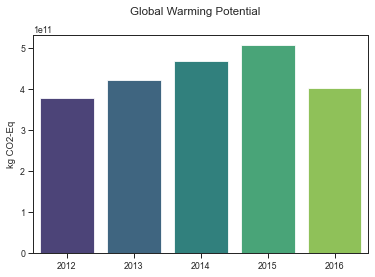

In [7]:
#Visualització 1
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
sns.set_style("ticks")
sns.set_context("paper")
fig=plt.figure()
fig.suptitle('Global Warming Potential')
y1=sns.barplot(data=df_GWP100,x='Period',y='Value',palette='viridis',saturation=0.7,).set(xlabel='',ylabel='kg CO2-Eq')
sns.set(rc={"figure.dpi":300, 'savefig.dpi':300})




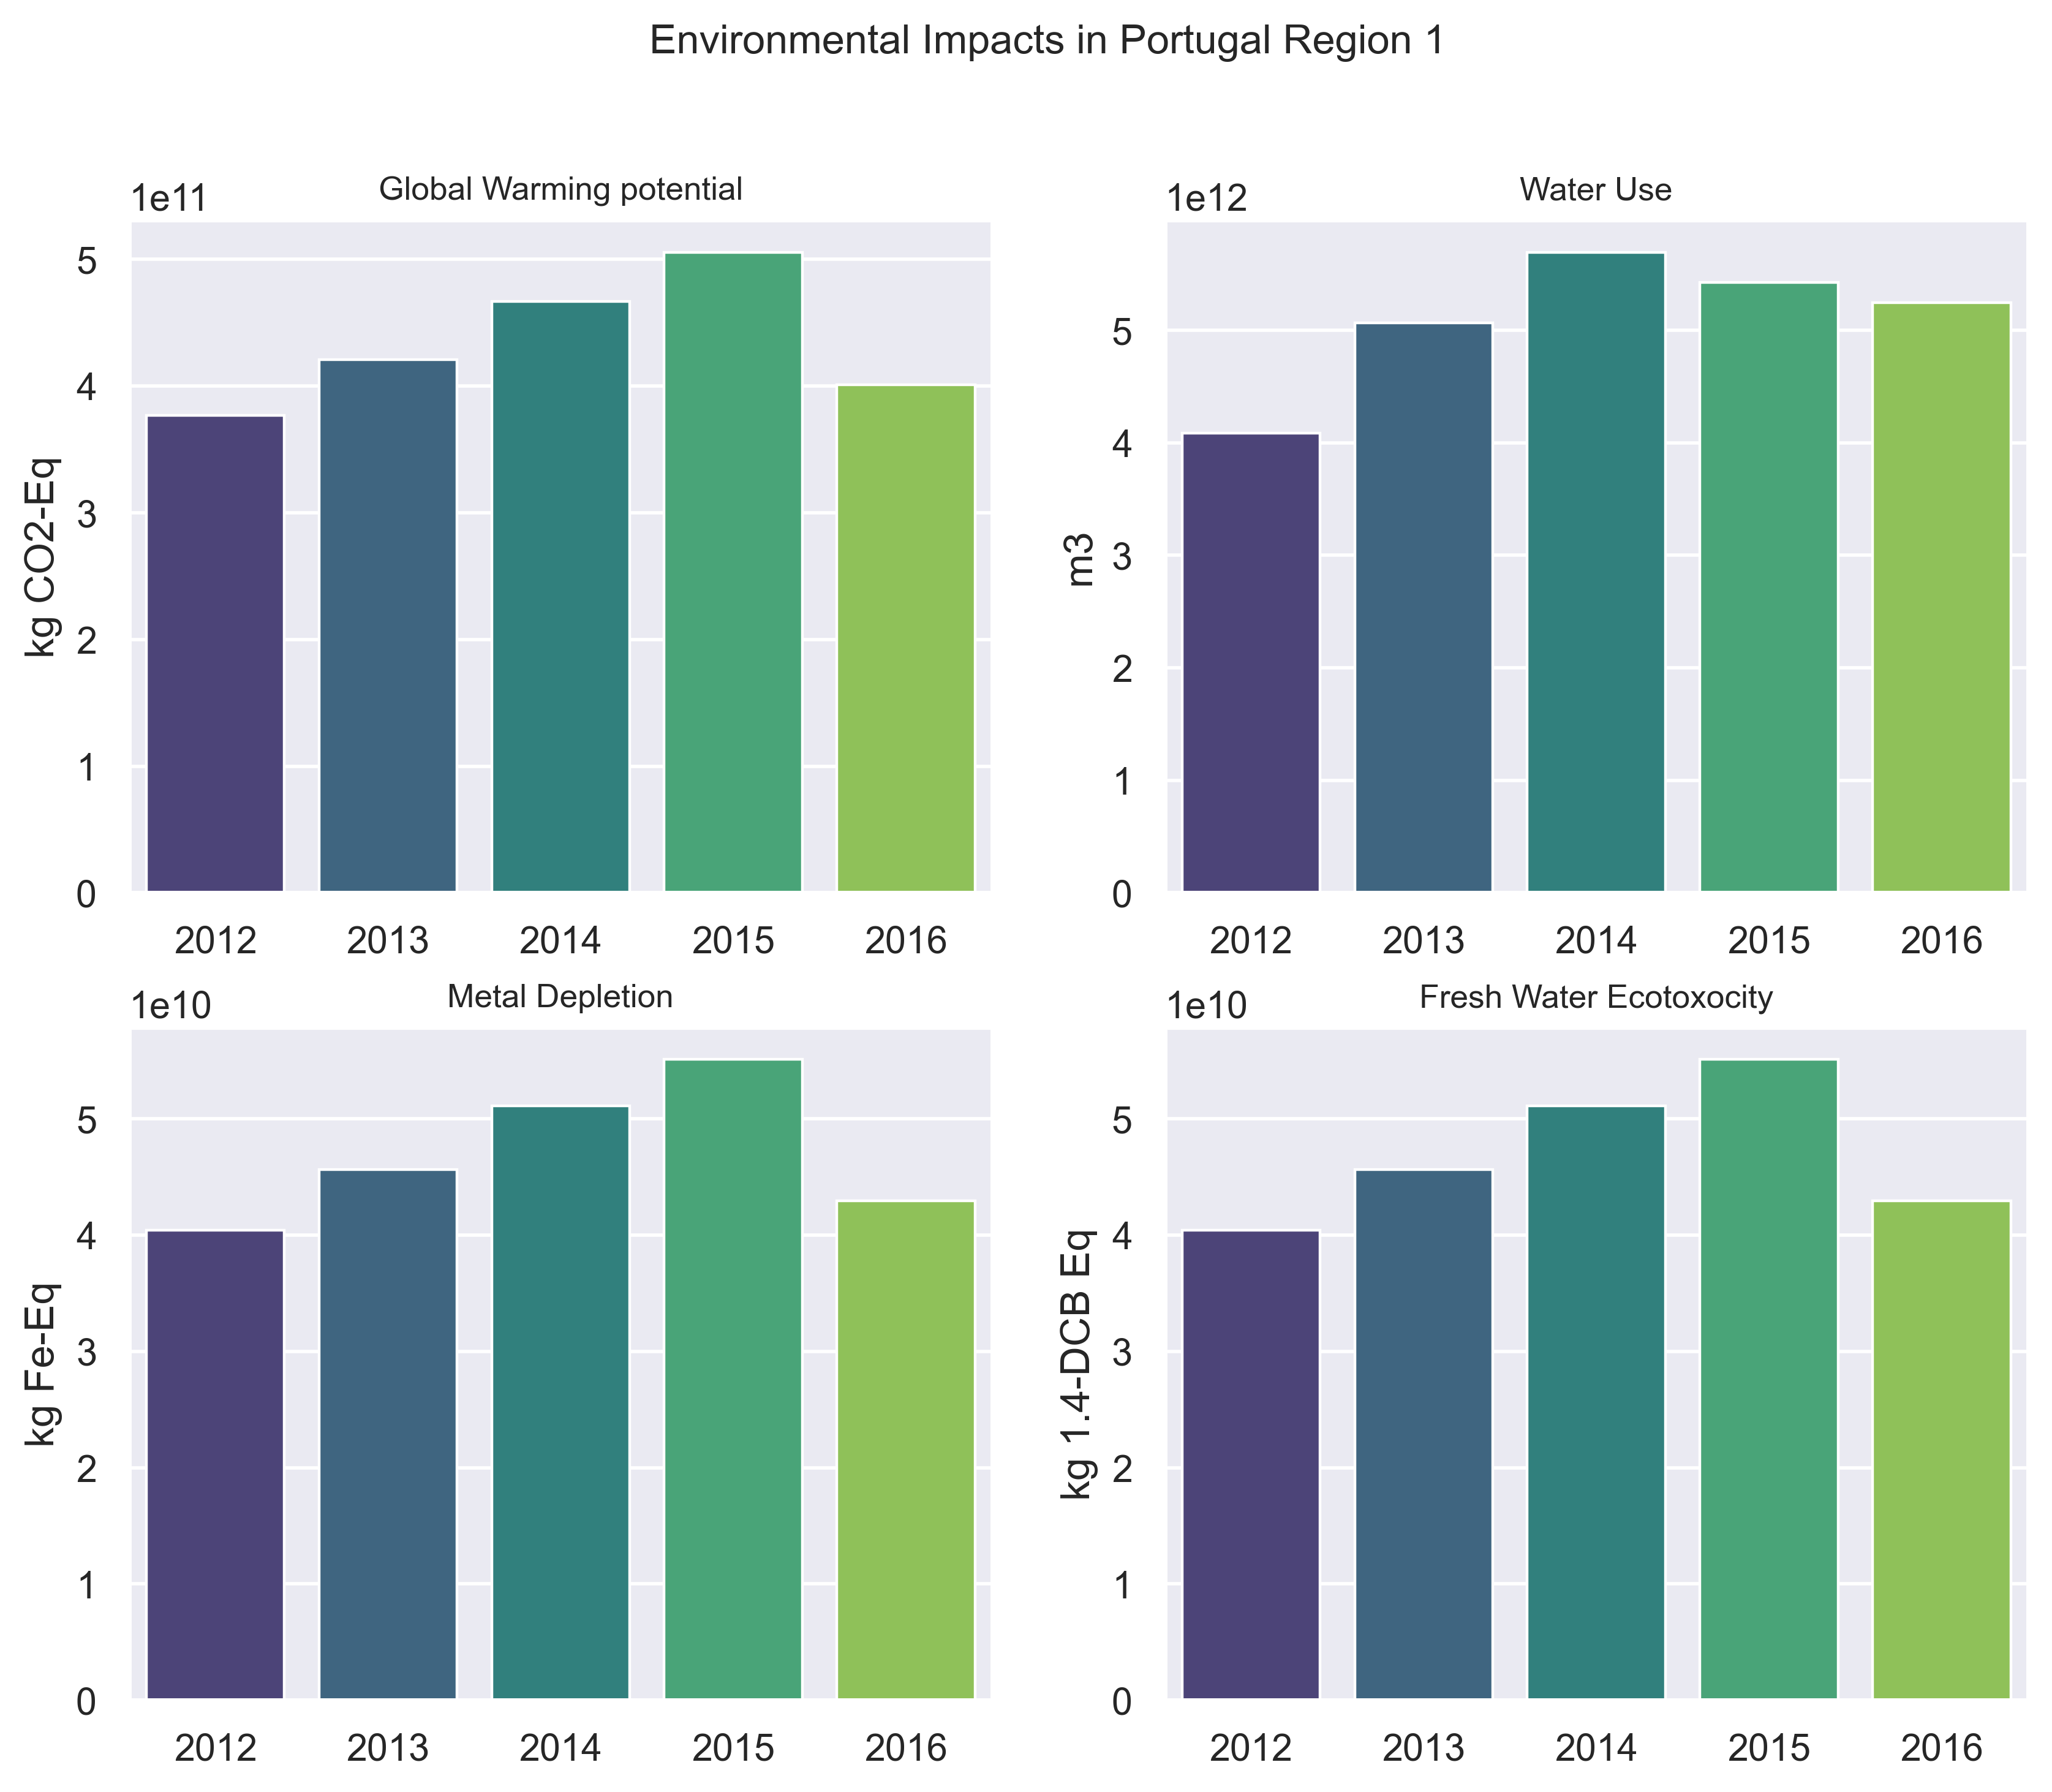

In [8]:
#versio amb 4
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
fig, axes = plt.subplots(2,2,figsize=(10,8),dpi=400)
fig.suptitle('Environmental Impacts in Portugal Region 1')

sns.set_style("white")
sns.set_context("paper")

#GWP100
xx=df_GWP100['Period']
yy=df_GWP100['Value']
axes[0,0].plot(xx,yy)
sns.barplot(ax=axes[0,0],x='Period',y='Value',data=df_GWP100,palette='viridis',saturation=0.7).set(
    xlabel='',ylabel='kg CO2-Eq')
axes[0,0].set_title('Global Warming potential')

#axes[0,0].plot(x=df_GWP100.Period,y=df_GWP100.Value)

# Water use
sns.barplot(ax=axes[0,1],x='Period',y='Value',data=df_WaterUse,palette='viridis',saturation=0.7).set(
    xlabel='',ylabel='m3')
axes[0,1].set_title('Water Use')
sns.set_style("ticks")


#Metal Depletion
sns.barplot(ax=axes[1,0],x='Period',y='Value',data=df_MetalDepletion,palette='viridis',saturation=0.7).set(
    xlabel='',ylabel='kg Fe-Eq')
axes[1,0].set_title('Metal Depletion')
sns.set_style("white")

#Fresh Water Ecotoxicity
sns.barplot(ax=axes[1,1],x='Period',y='Value',data=df_MetalDepletion,palette='viridis',saturation=0.7).set(
    xlabel='',ylabel='kg 1.4-DCB Eq')
axes[1,1].set_title('Fresh Water Ecotoxocity')
sns.set_style("white")


sns.set(rc={"figure.dpi":300, 'savefig.dpi':300})
plt.savefig(r'C:\Users\altz7\Downloads\plot__.png', facecolor='w')  
                                                                            

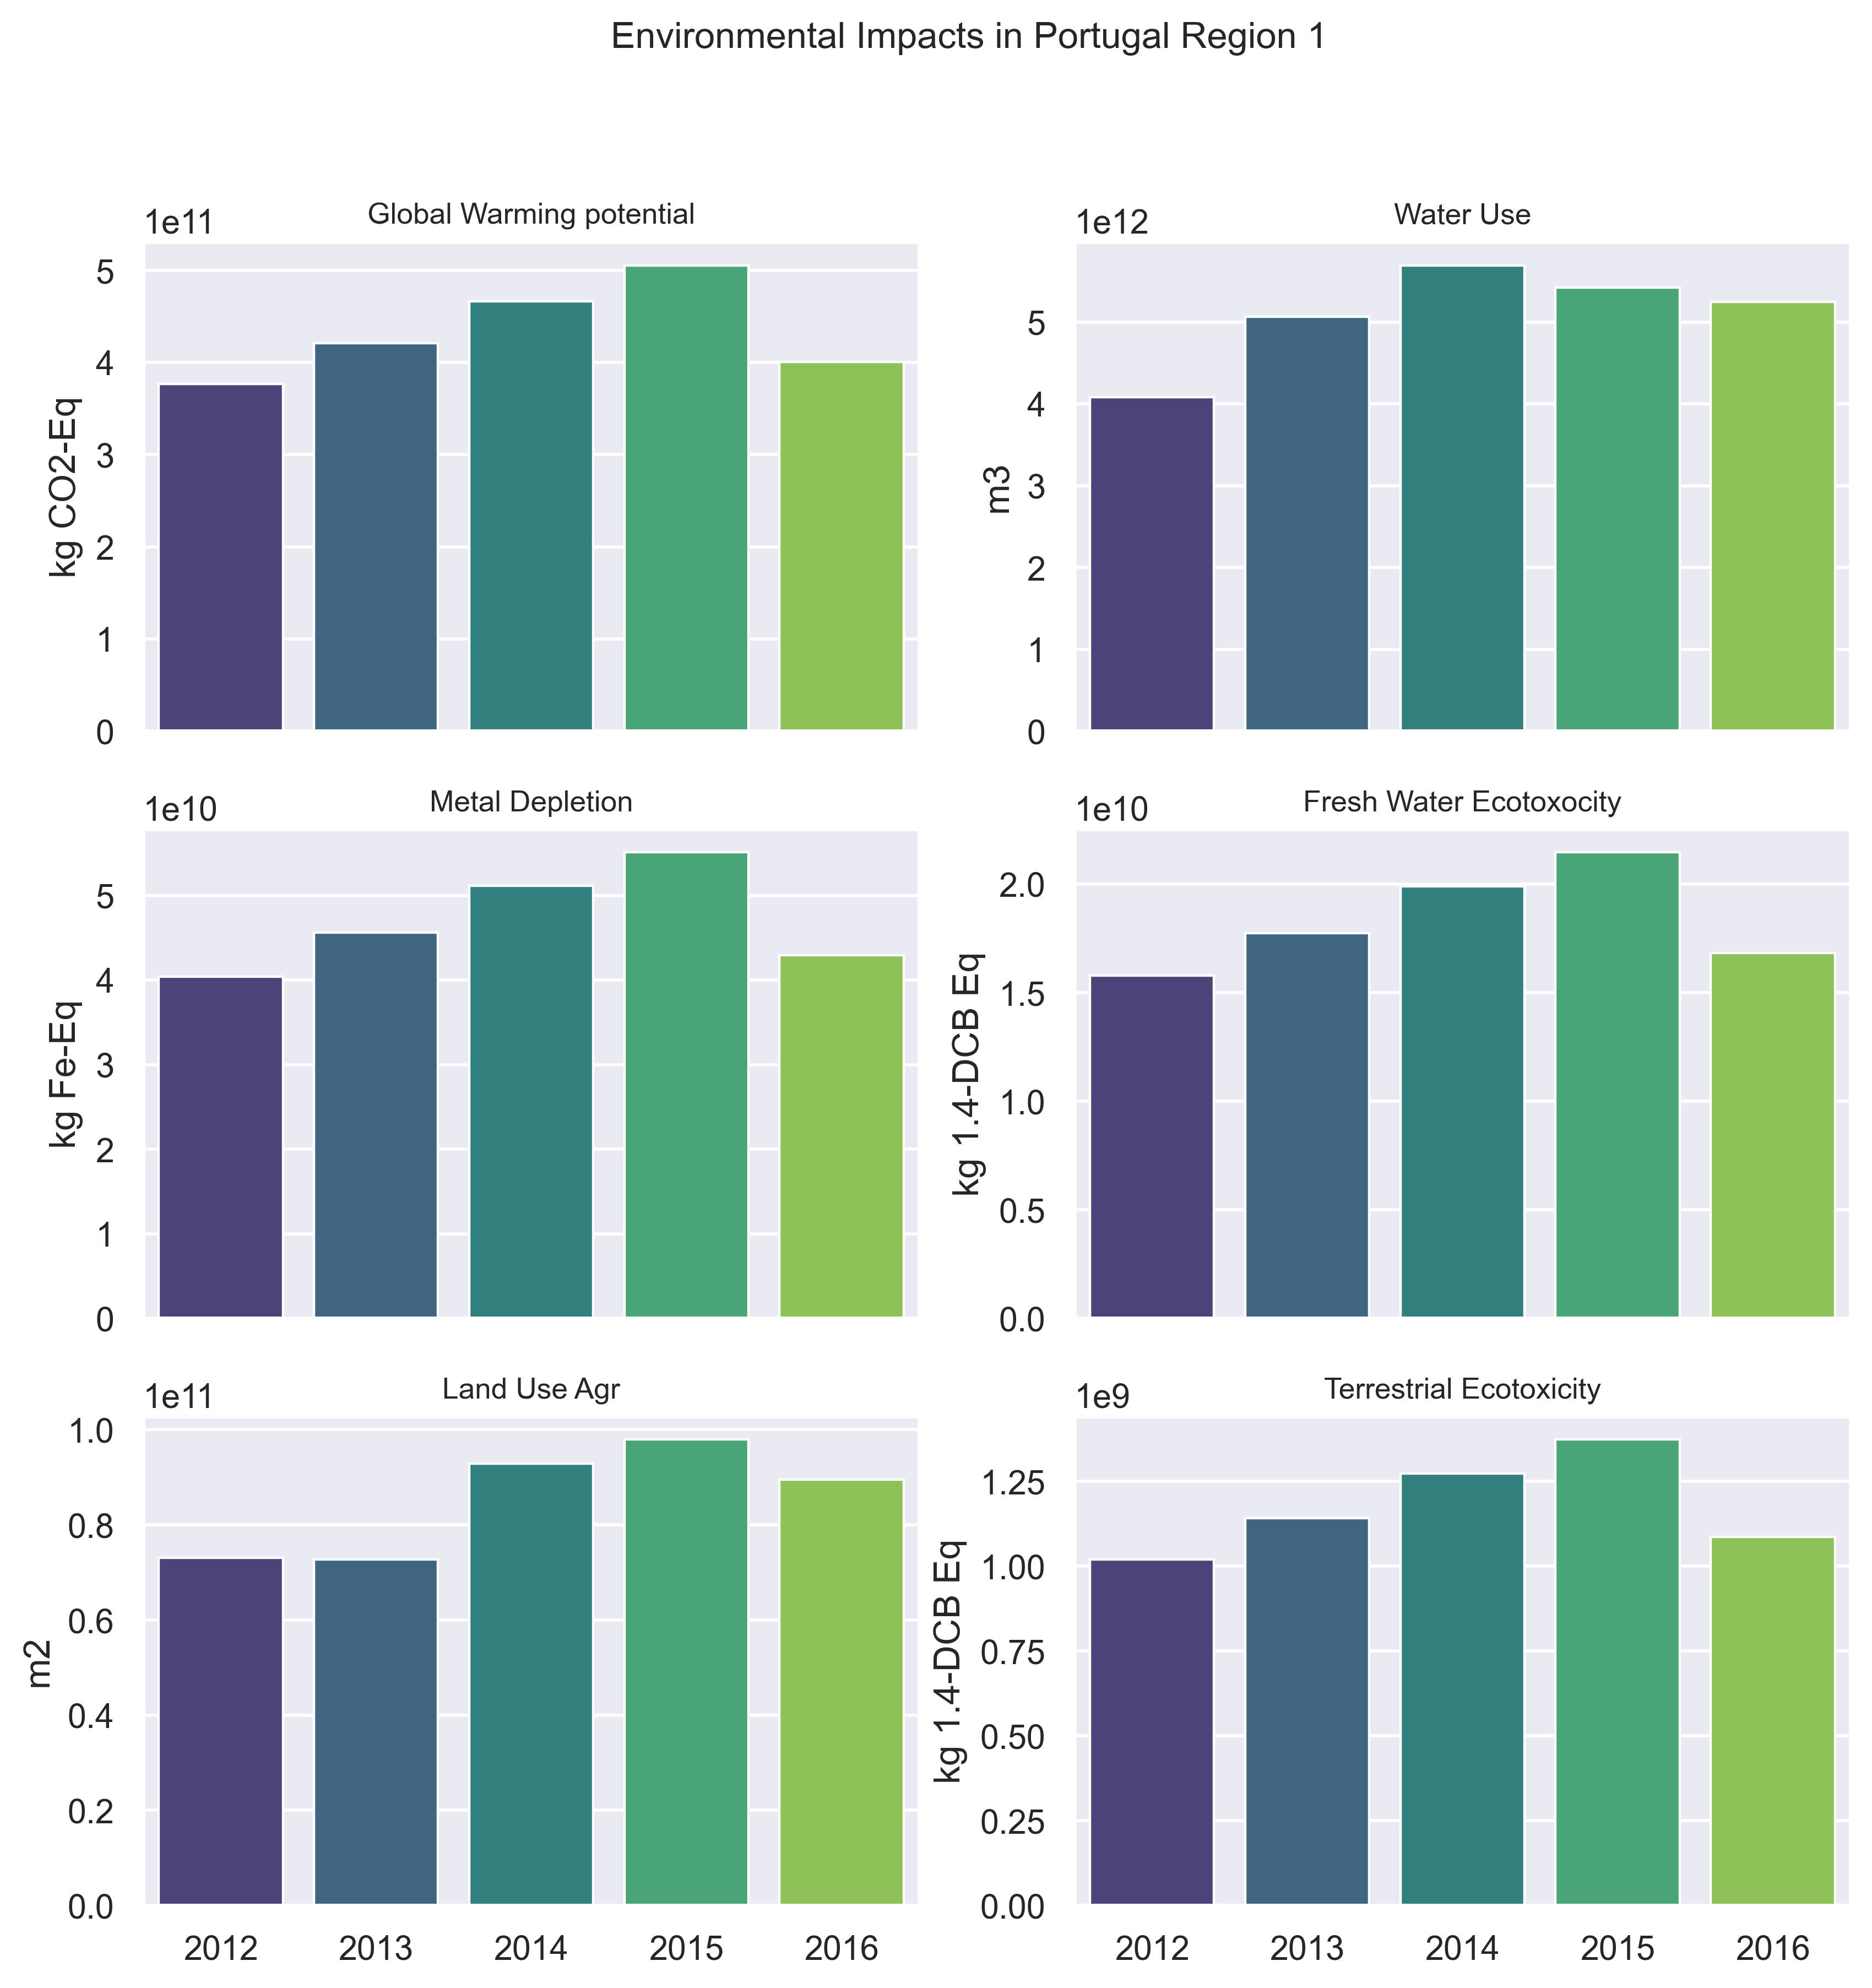

In [9]:
#versio amb 6
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
fig, axes = plt.subplots(3,2,figsize=(10,10),dpi=400, sharex=True)
fig.suptitle('Environmental Impacts in Portugal Region 1')
sns.set_style("ticks")
sns.set_context("paper")
#plt.tight_layout()
#GWP100

sns.barplot(ax=axes[0,0],x='Period',y='Value',data=df_GWP100,palette='viridis',saturation=0.7).set(
    xlabel='',ylabel='kg CO2-Eq')
axes[0,0].set_title('Global Warming potential')

#axes[0,0].plot(x=df_GWP100.Period,y=df_GWP100.Value)

# Water use
sns.barplot(ax=axes[0,1],x='Period',y='Value',data=df_WaterUse,palette='viridis',saturation=0.7).set(
    xlabel='',ylabel='m3')
axes[0,1].set_title('Water Use')
sns.set_style("ticks")

#Metal Depletion
sns.barplot(ax=axes[1,0],x='Period',y='Value',data=df_MetalDepletion,palette='viridis',saturation=0.7).set(
    xlabel='',ylabel='kg Fe-Eq')
axes[1,0].set_title('Metal Depletion')
sns.set_style('ticks')

#Fresh Water Ecotoxicity
sns.barplot(ax=axes[1,1],x='Period',y='Value',data=df_FreshWaterEcotox,palette='viridis',saturation=0.7).set(
    xlabel='',ylabel='kg 1.4-DCB Eq')
axes[1,1].set_title('Fresh Water Ecotoxocity')
sns.set_style("ticks")

#Land Use Agr
sns.barplot(ax=axes[2,0],x='Period',y='Value',data=df_LandUseAgr,palette='viridis',saturation=0.7).set(
    xlabel='',ylabel='m2')
axes[2,0].set_title('Land Use Agr')
sns.set_style("ticks")

#Terrestrial Ecotox
sns.barplot(ax=axes[2,1],x='Period',y='Value',data=df_TerrestrialEcotox,palette='viridis',saturation=0.7).set(
    xlabel='',ylabel='kg 1.4-DCB Eq')
axes[2,1].set_title('Terrestrial Ecotoxicity')

sns.set(rc={"figure.dpi":400, 'savefig.dpi':400})
plt.savefig(r'C:\Users\altz7\Downloads\plot__6.png', facecolor='w')  


Make the same data representation using lines instead of bars. 
It is relevant to first sort the x values for each dataframe

In [10]:
df_GWP100.sort_values(by='Period',inplace=True)
df_WaterUse.sort_values(by='Period',inplace=True)
df_MetalDepletion.sort_values(by='Period',inplace=True)
df_FreshWaterEcotox.sort_values(by='Period',inplace=True)
df_LandUseAgr.sort_values(by='Period',inplace=True)
df_TerrestrialEcotox.sort_values(by='Period',inplace=True)

C:\Users\altz7\AppData\Local\Temp\ipykernel_13480\1447068875.py:60: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "dpli" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig(r'C:\Users\altz7\Downloads\plot_lines_region1.png', dpli=400)


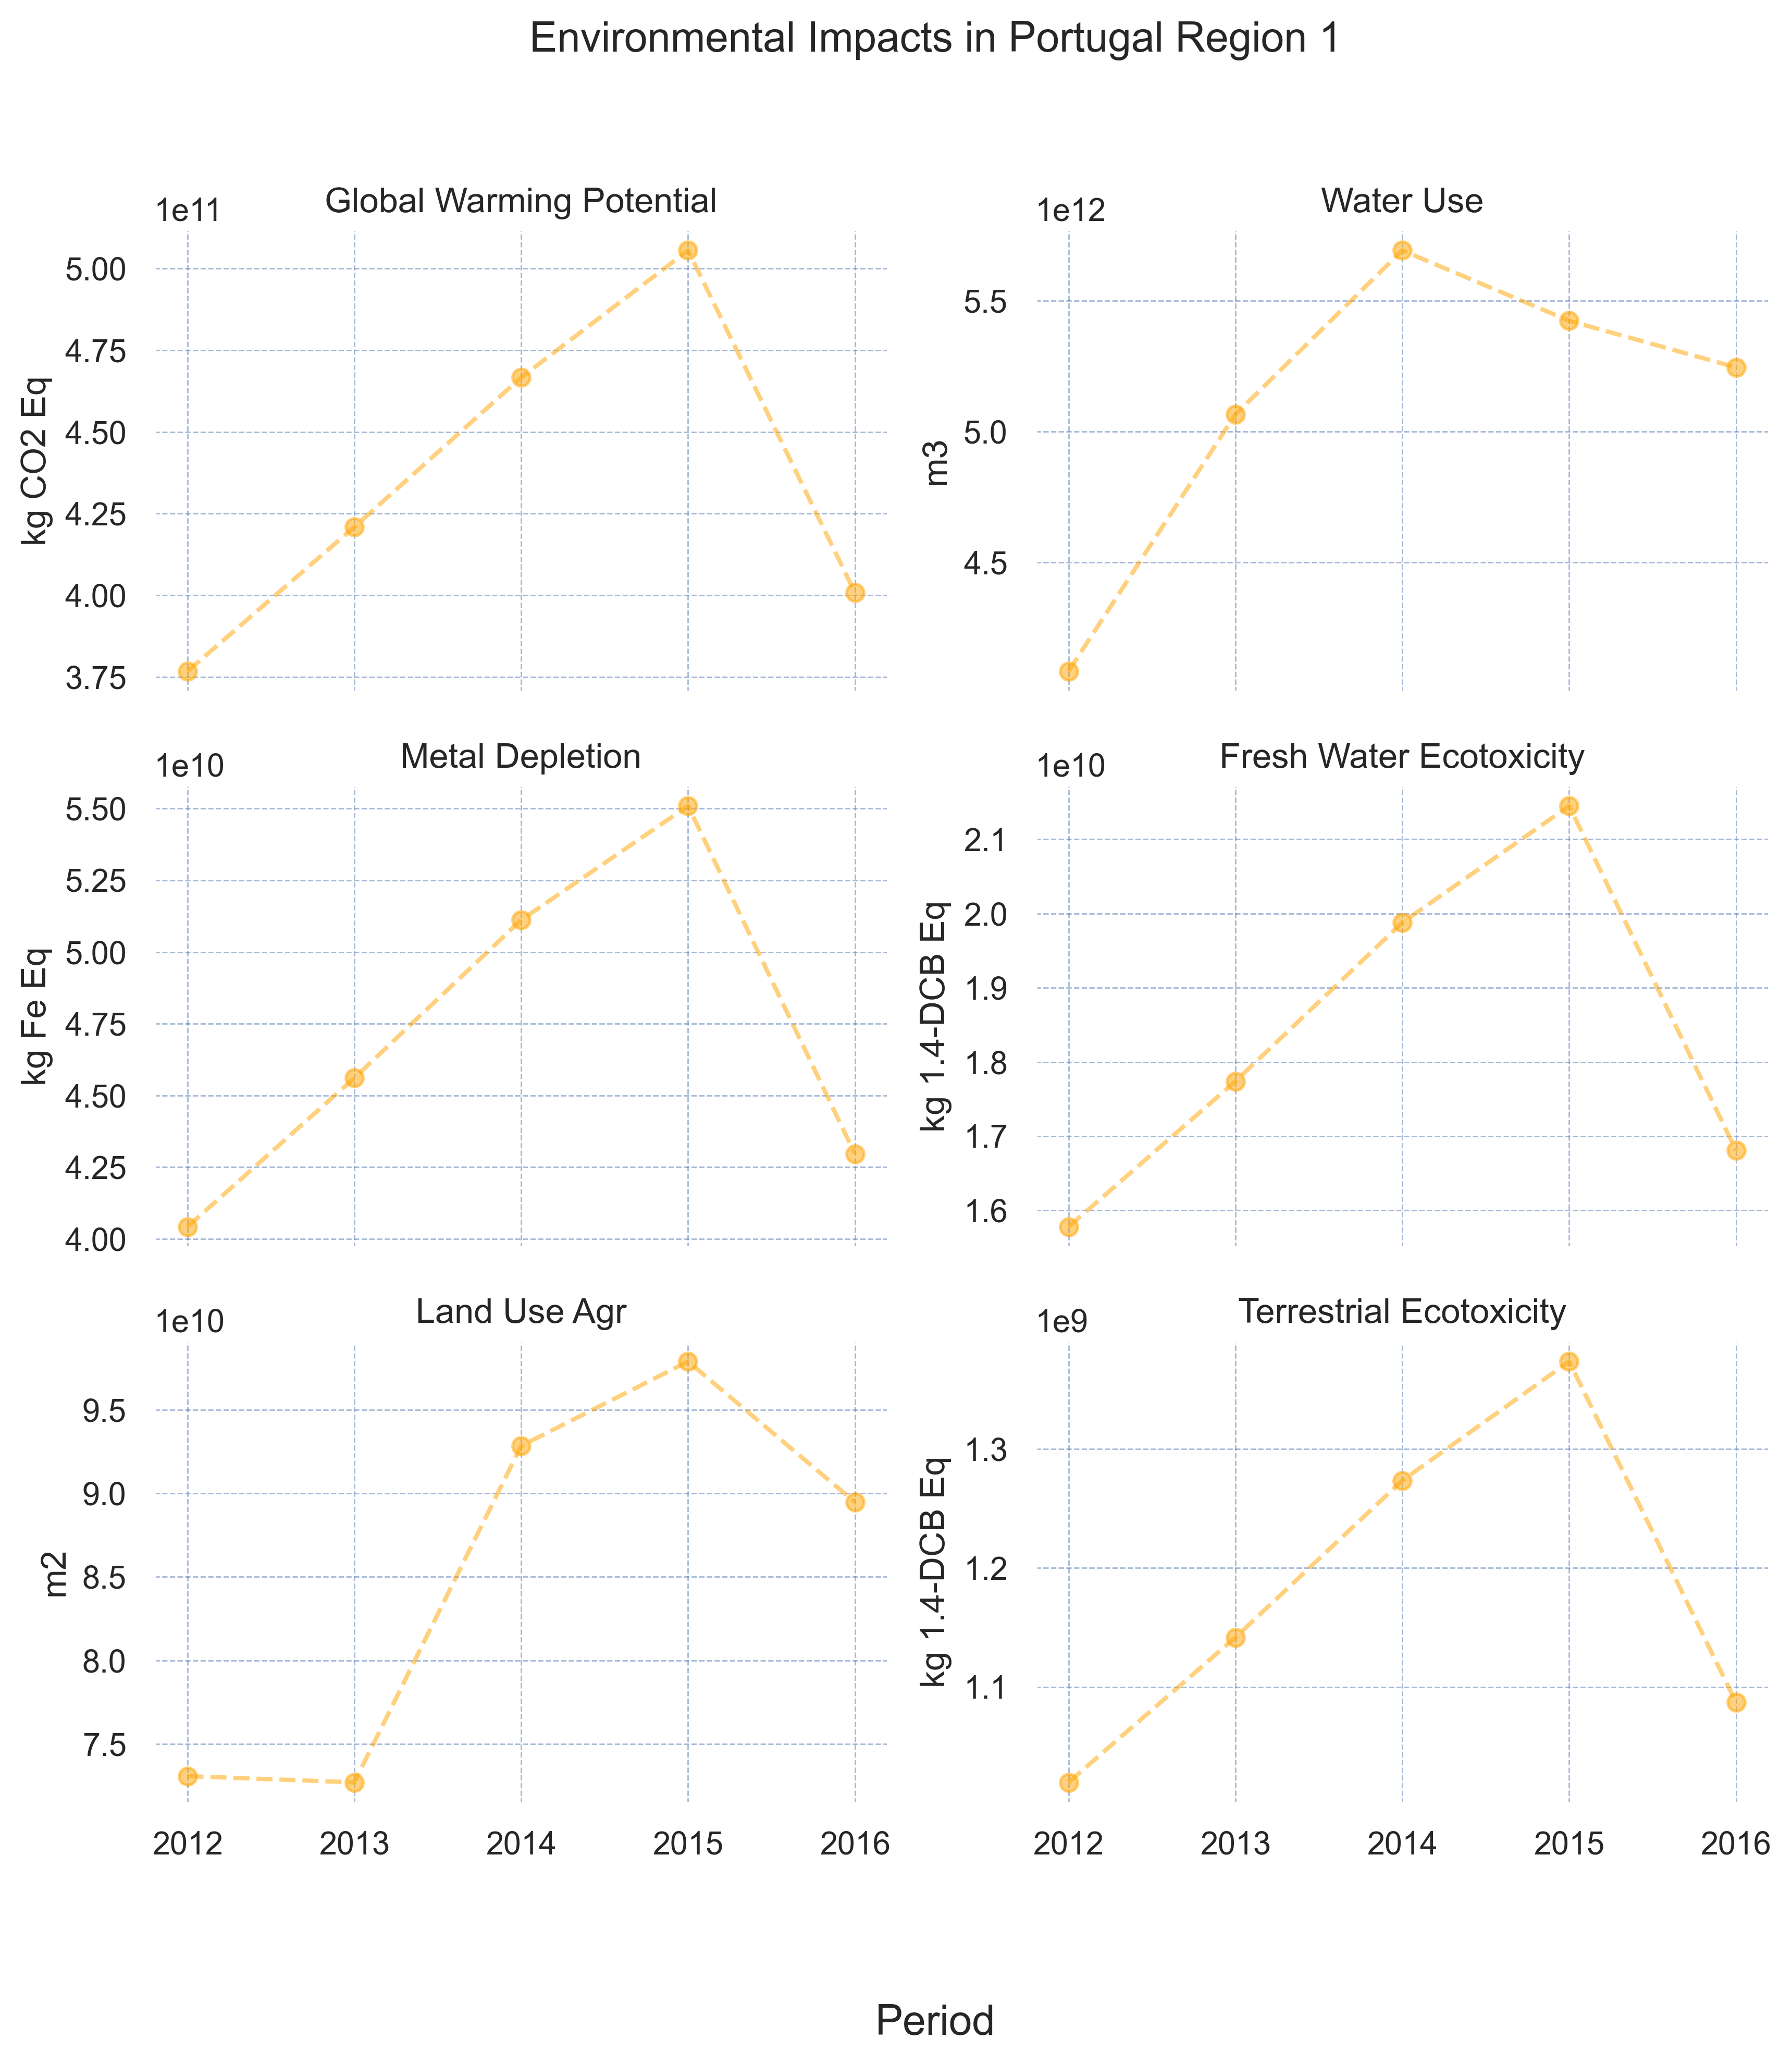

In [11]:
fig, axes=plt.subplots(3,2,figsize=(10,10),dpi=400, sharex=True)
fig.suptitle('Environmental Impacts in Portugal Region 1')

#x="2012 2013 2014 2015 2016".split()
#GWP
y1=df_GWP100.Value
x1=df_GWP100.Period
axes[0,0].plot(x1,y1,marker='o', color='orange',alpha=0.5,linestyle='--')
axes[0,0].set_title('Global Warming Potential')
axes[0,0].set_facecolor('white')
axes[0,0].grid(color='b', alpha=0.5, linestyle='dashed', linewidth=0.5)
axes[0,0].set_ylabel('kg CO2 Eq')
#Water Use
y2=df_WaterUse.Value
x2=df_WaterUse.Period
axes[0,1].plot(x2,y2,marker='o', color='orange',alpha=0.5,linestyle='--')
axes[0,1].set_title('Water Use')
axes[0,1].set_facecolor('white')
axes[0,1].grid(color='b', alpha=0.5, linestyle='dashed', linewidth=0.5)
axes[0,1].set_ylabel('m3')
#Metal Depletion
y3=df_MetalDepletion.Value
x3=df_MetalDepletion.Period
axes[1,0].plot(x3,y3,marker='o', color='orange',alpha=0.5,linestyle='--')
axes[1,0].set_title('Metal Depletion')
axes[1,0].set_facecolor('white')
axes[1,0].grid(color='b', alpha=0.5, linestyle='dashed', linewidth=0.5)
axes[1,0].set_ylabel('kg Fe Eq')
#Fresh Water Ecotoxicity
y4=df_FreshWaterEcotox.Value
x4=df_FreshWaterEcotox.Period
axes[1,1].plot(x4,y4,marker='o', color='orange',alpha=0.5,linestyle='--')
axes[1,1].set_title('Fresh Water Ecotoxicity')
axes[1,1].set_facecolor('white')
axes[1,1].grid(color='b', alpha=0.5, linestyle='dashed', linewidth=0.5)
axes[1,1].set_ylabel('kg 1.4-DCB Eq')

#Land Use Agr
y5=df_LandUseAgr.Value
x5=df_LandUseAgr.Period
axes[2,0].plot(x5,y5,marker='o', color='orange',alpha=0.5,linestyle='--')
axes[2,0].set_title('Land Use Agr')
axes[2,0].set_facecolor('white')
axes[2,0].grid(color='b', alpha=0.5, linestyle='dashed', linewidth=0.5)
axes[2,0].set_ylabel('m2')

#Terrestrial Ecotox
y6=df_TerrestrialEcotox.Value
x6=df_TerrestrialEcotox.Period
axes[2,1].plot(x6,y6,marker='o', color='orange',alpha=0.5,linestyle='--')
axes[2,1].set_title('Terrestrial Ecotoxicity')
axes[2,1].set_facecolor('white')
axes[2,1].grid(color='b', alpha=0.5, linestyle='dashed', linewidth=0.5)
axes[2,1].set_ylabel('kg 1.4-DCB Eq')



fig.supxlabel('Period')

plt.savefig(r'C:\Users\altz7\Downloads\plot_lines_region1.png', dpli=400) 


# Let's make the same process for the region 2

In [12]:
region2=df[df['System']=='PRT_2'][df['Processor']=='energysystem']
region2
#drop the Internal scope
region2.drop(region2[region2['Scope']=='Internal'].index, inplace=True)
region2
region2['Indicator'].unique()
listindicators=region2['Indicator'].unique()
listindicator=listindicators.tolist()
#listindicator
label=region2['Unit'].unique().tolist()
for i in region2.columns:
    print(region2[i].unique())
    nom_dataframes=[]
    listindicators=region2['Indicator'].unique()
    listindicator=listindicators.tolist()
    zipped=zip(listindicators,label)
for i,g in region2.groupby('Indicator'):
    globals()['df_'+str(i)]=g
    nom_dataframes.append(i)

['__2012' '__2016' '__2013' '__2014' '__2015']
['PRT_2']
[2012 2016 2013 2014 2015]
['Total']
['energysystem']
['FreshWaterEcotox' 'GWP100' 'LandUseAgr' 'LandUseUrb' 'MetalDepletion'
 'TerrestrialEcotox' 'Test2' 'WaterUse' 'LandUse']
[9.82181346e+10 2.10137183e+12 9.61201903e+10 7.82933983e+09
 2.38259327e+11 6.33776913e+09 1.76003674e+03 1.91656796e+13
 1.03949530e+11 1.18146654e+11 2.52195389e+12 1.14982983e+11
 9.42356087e+09 2.85679952e+11 7.62726335e+09 2.10829365e+03
 2.31459151e+13 1.24406543e+11 1.22823314e+11 2.61559339e+12
 9.61252246e+10 9.58777078e+09 2.96011136e+11 7.93981451e+09
 2.18173039e+03 2.41109718e+13 1.05712995e+11 9.70135946e+10
 2.07586947e+12 1.00239913e+11 7.77291077e+09 2.35288950e+11
 6.24332067e+09 1.73879424e+03 1.90152964e+13 1.08012824e+11
 1.19213777e+11 2.54130330e+12 1.04546666e+11 9.39508261e+09
 2.87726602e+11 7.68373777e+09 2.12254396e+03 2.32962668e+13
 1.13941749e+11]
[nan]


C:\Users\altz7\AppData\Local\Temp\ipykernel_13480\1930123373.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  region2=df[df['System']=='PRT_2'][df['Processor']=='energysystem']
C:\Users\altz7\AppData\Local\Temp\ipykernel_13480\1930123373.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  region2.drop(region2[region2['Scope']=='Internal'].index, inplace=True)


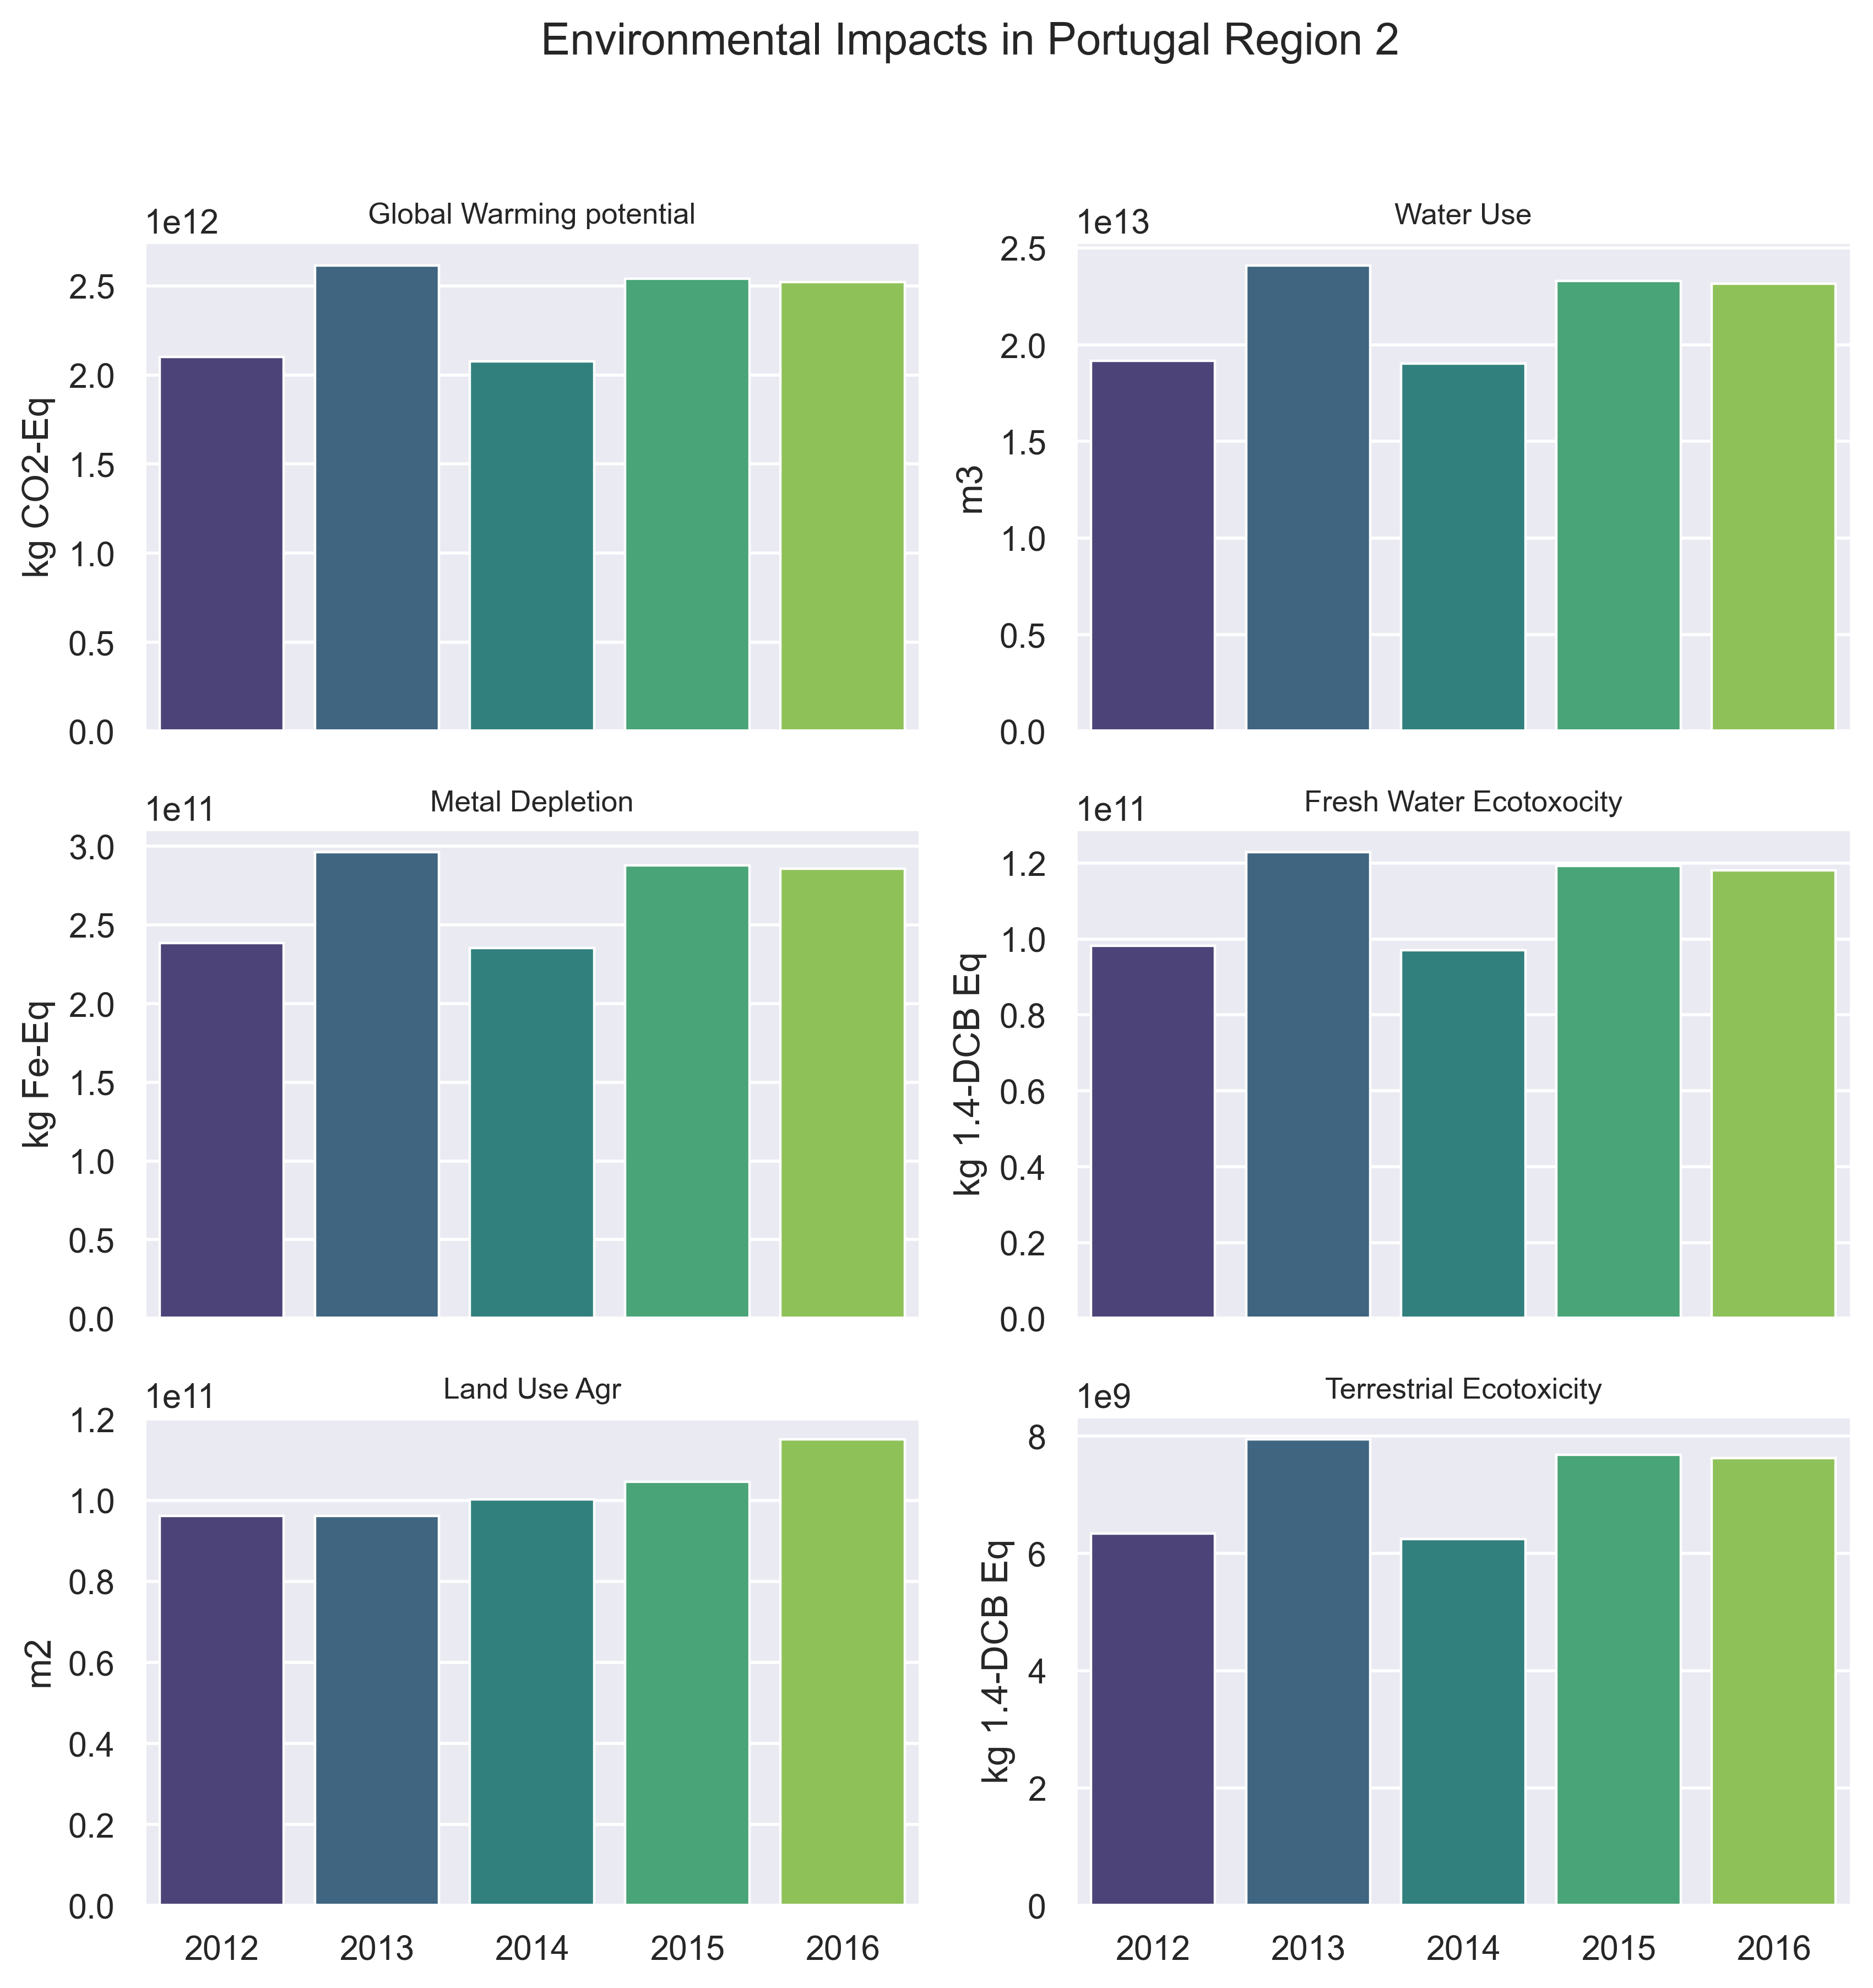

In [13]:
fig, axes = plt.subplots(3,2,figsize=(10,10),dpi=400, sharex=True)
fig.suptitle('Environmental Impacts in Portugal Region 2')
sns.set_style("white")
sns.set_context("paper")
#plt.tight_layout()
#GWP100

sns.barplot(ax=axes[0,0],x='Period',y='Value',data=df_GWP100,palette='viridis',saturation=0.7).set(
    xlabel='',ylabel='kg CO2-Eq')
axes[0,0].set_title('Global Warming potential')

#axes[0,0].plot(x=df_GWP100.Period,y=df_GWP100.Value)

# Water use
sns.barplot(ax=axes[0,1],x='Period',y='Value',data=df_WaterUse,palette='viridis',saturation=0.7).set(
    xlabel='',ylabel='m3')
axes[0,1].set_title('Water Use')


#Metal Depletion
sns.barplot(ax=axes[1,0],x='Period',y='Value',data=df_MetalDepletion,palette='viridis',saturation=0.7).set(
    xlabel='',ylabel='kg Fe-Eq')
axes[1,0].set_title('Metal Depletion')

#Fresh Water Ecotoxicity
sns.barplot(ax=axes[1,1],x='Period',y='Value',data=df_FreshWaterEcotox,palette='viridis',saturation=0.7).set(
    xlabel='',ylabel='kg 1.4-DCB Eq')
axes[1,1].set_title('Fresh Water Ecotoxocity')

#Land Use Agr
sns.barplot(ax=axes[2,0],x='Period',y='Value',data=df_LandUseAgr,palette='viridis',saturation=0.7).set(
    xlabel='',ylabel='m2')
axes[2,0].set_title('Land Use Agr')

#Terrestrial Ecotox
sns.barplot(ax=axes[2,1],x='Period',y='Value',data=df_TerrestrialEcotox,palette='viridis',saturation=0.7).set(
    xlabel='',ylabel='kg 1.4-DCB Eq')
axes[2,1].set_title('Terrestrial Ecotoxicity')

sns.set(rc={"figure.dpi":400, 'savefig.dpi':400})
plt.savefig(r'C:\Users\altz7\Downloads\BAR_region2.png', facecolor='w')  


In [14]:
df_GWP100.sort_values(by='Period',inplace=True)
df_WaterUse.sort_values(by='Period',inplace=True)
df_MetalDepletion.sort_values(by='Period',inplace=True)
df_FreshWaterEcotox.sort_values(by='Period',inplace=True)
df_LandUseAgr.sort_values(by='Period',inplace=True)
df_TerrestrialEcotox.sort_values(by='Period',inplace=True)

C:\Users\altz7\AppData\Local\Temp\ipykernel_13480\3035179522.py:63: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "dpli" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig(r'C:\Users\altz7\Downloads\plot_lines_region2.png', dpli=400)


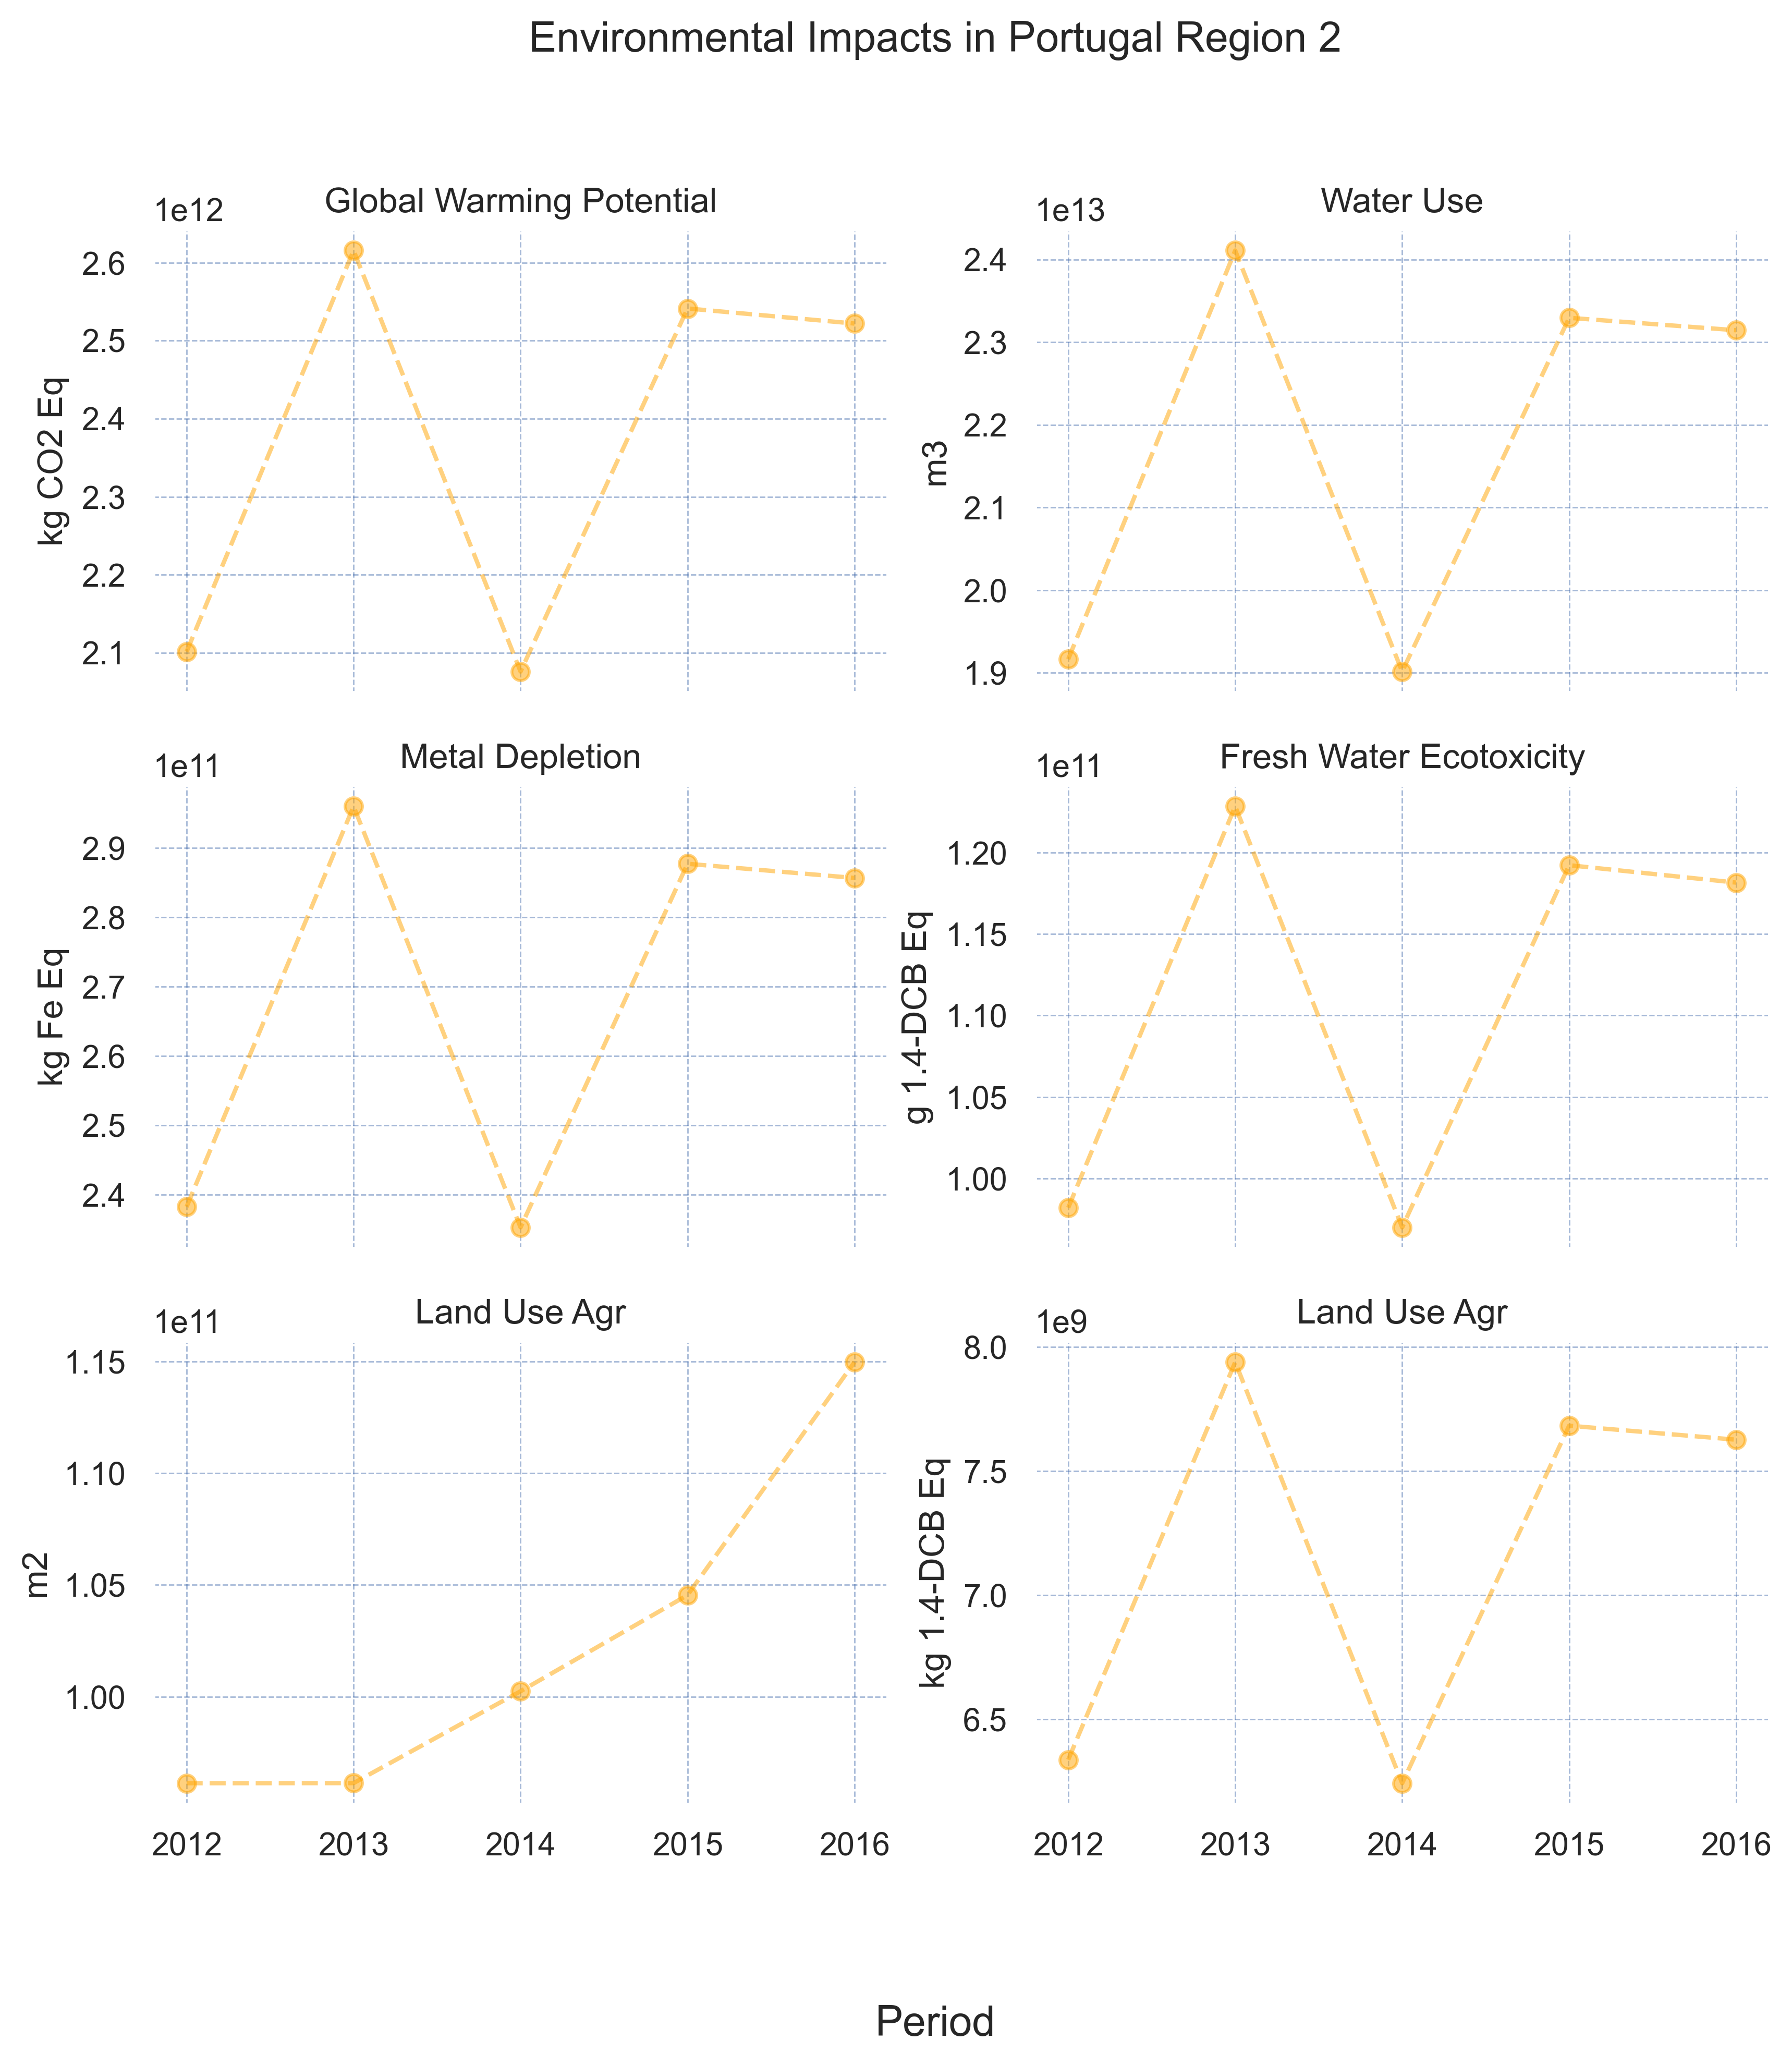

In [15]:
fig, axes=plt.subplots(3,2,figsize=(10,10),dpi=400, sharex=True)
fig.suptitle('Environmental Impacts in Portugal Region 2')


#x="2012 2013 2014 2015 2016".split()
#GWP
y1=df_GWP100.Value
x1=df_GWP100.Period
axes[0,0].plot(x1,y1,marker='o', color='orange',alpha=0.5,linestyle='--')
axes[0,0].set_title('Global Warming Potential')
axes[0,0].set_facecolor('white')
axes[0,0].grid(color='b', alpha=0.5, linestyle='dashed', linewidth=0.5)
axes[0,0].set_ylabel('kg CO2 Eq')
#Water Use
y2=df_WaterUse.Value
x2=df_WaterUse.Period
axes[0,1].plot(x2,y2,marker='o', color='orange',alpha=0.5,linestyle='--')
axes[0,1].set_title('Water Use')
axes[0,1].set_facecolor('white')
axes[0,1].grid(color='b', alpha=0.5, linestyle='dashed', linewidth=0.5)
axes[0,1].set_ylabel('m3')
#Metal Depletion
y3=df_MetalDepletion.Value
x3=df_MetalDepletion.Period
axes[1,0].plot(x3,y3,marker='o', color='orange',alpha=0.5,linestyle='--')
axes[1,0].set_title('Metal Depletion')
axes[1,0].set_facecolor('white')
axes[1,0].grid(color='b', alpha=0.5, linestyle='dashed', linewidth=0.5)
axes[1,0].set_ylabel('kg Fe Eq')
#Fresh Water Ecotoxicity
y4=df_FreshWaterEcotox.Value
x4=df_FreshWaterEcotox.Period
axes[1,1].plot(x4,y4,marker='o', color='orange',alpha=0.5,linestyle='--')
axes[1,1].set_title('Fresh Water Ecotoxicity')
axes[1,1].set_facecolor('white')
axes[1,1].grid(color='b', alpha=0.5, linestyle='dashed', linewidth=0.5)
axes[1,1].set_ylabel('g 1.4-DCB Eq')

#Land Use Agr
y5=df_LandUseAgr.Value
x5=df_LandUseAgr.Period
axes[2,0].plot(x5,y5,marker='o', color='orange',alpha=0.5,linestyle='--')
axes[2,0].set_title('Land Use Agr')
axes[2,0].set_facecolor('white')
axes[2,0].grid(color='b', alpha=0.5, linestyle='dashed', linewidth=0.5)
axes[2,0].set_ylabel('m2')

#Terrestrial Ecotox
y6=df_TerrestrialEcotox.Value
x6=df_TerrestrialEcotox.Period
axes[2,1].plot(x6,y6,marker='o', color='orange',alpha=0.5,linestyle='--')
axes[2,1].set_title('Land Use Agr')
axes[2,1].set_facecolor('white')
axes[2,1].grid(color='b', alpha=0.5, linestyle='dashed', linewidth=0.5)
axes[2,1].set_ylabel('kg 1.4-DCB Eq')



fig.supxlabel('Period')



plt.savefig(r'C:\Users\altz7\Downloads\plot_lines_region2.png', dpli=400) 

#  Explore other levels of the dendrogram

In [9]:
df

Scenario System  Period  Scope  \
5260    __2015  PRT_1    2015  Total   
5261    __2015  PRT_1    2015  Total   
5262    __2015  PRT_1    2015  Total   
5263    __2015  PRT_1    2015  Total   
5264    __2015  PRT_1    2015  Total   
...        ...    ...     ...    ...   
11248   __2014  PRT_1    2014  Total   
11249   __2014  PRT_1    2014  Total   
11250   __2014  PRT_1    2014  Total   
11251   __2014  PRT_1    2014  Total   
11252   __2014  PRT_1    2014  Total   

                                               Processor         Indicator  \
5260                                        energysystem  FreshWaterEcotox   
5261                             energysystem.generation  FreshWaterEcotox   
5262      energysystem.generation.electricity_generation  FreshWaterEcotox   
5263   energysystem.generation.electricity_generation...  FreshWaterEcotox   
5264   energysystem.generation.electricity_generation...  FreshWaterEcotox   
...                                                  ...               ...   
11248  energysystem.storage.electricity_storage.pumpe...           LandUse   
11249               energysystem.storage.thermal_storage           LandUse   
11250  energysystem.storage.thermal_storage.heat_stor...           LandUse   
11251  energysystem.storage.thermal_storage.heat_stor...           LandUse   
11252  energysystem.storage.thermal_storage.methane_s...           LandUse   

              Value  Unit  Dendrogram level  
5260   2.144929e+10   NaN                 0  
5261   5.210299e+08   NaN                 1  
5262   6.372347e+07   NaN                 2  
5263   1.205700e+02   NaN                 3  
5264   6.066416e+07   NaN                 3  
...             ...   ...               ...  
11248  3.693277e+08   NaN                 3  
11249  2.185243e+10   NaN                 2  
11250  2.177795e+10   NaN                 3  
11251  7.447625e+07   NaN                 3  
11252  0.000000e+00   NaN                 3  

[940 rows x 9 columns]

In [10]:
df['Processor'].unique()


region1_gen=df[df['System']=='PRT_1'][df['Processor']=='energysystem.generation']

region1_gen.drop(region1_gen[region1_gen['Scope']=='Internal'].index, inplace=True)
region1_gen.sort_values(by=
                        'Period',inplace=True)
region1_gen

Scenario System  Period  Scope                Processor  \
6461    __2012  PRT_1    2012  Total  energysystem.generation   
6635    __2012  PRT_1    2012  Total  energysystem.generation   
6591    __2012  PRT_1    2012  Total  energysystem.generation   
6285    __2012  PRT_1    2012  Total  energysystem.generation   
6329    __2012  PRT_1    2012  Total  energysystem.generation   
6373    __2012  PRT_1    2012  Total  energysystem.generation   
6417    __2012  PRT_1    2012  Total  energysystem.generation   
6548    __2012  PRT_1    2012  Total  energysystem.generation   
6505    __2012  PRT_1    2012  Total  energysystem.generation   
8151    __2013  PRT_1    2013  Total  energysystem.generation   
8195    __2013  PRT_1    2013  Total  energysystem.generation   
8239    __2013  PRT_1    2013  Total  energysystem.generation   
8283    __2013  PRT_1    2013  Total  energysystem.generation   
8326    __2013  PRT_1    2013  Total  energysystem.generation   
8369    __2013  PRT_1    2013  Total  energysystem.generation   
8063    __2013  PRT_1    2013  Total  energysystem.generation   
8413    __2013  PRT_1    2013  Total  energysystem.generation   
8107    __2013  PRT_1    2013  Total  energysystem.generation   
10883   __2014  PRT_1    2014  Total  energysystem.generation   
10927   __2014  PRT_1    2014  Total  energysystem.generation   
10971   __2014  PRT_1    2014  Total  energysystem.generation   
11015   __2014  PRT_1    2014  Total  energysystem.generation   
11059   __2014  PRT_1    2014  Total  energysystem.generation   
11189   __2014  PRT_1    2014  Total  energysystem.generation   
11103   __2014  PRT_1    2014  Total  energysystem.generation   
11146   __2014  PRT_1    2014  Total  energysystem.generation   
11233   __2014  PRT_1    2014  Total  energysystem.generation   
5261    __2015  PRT_1    2015  Total  energysystem.generation   
5567    __2015  PRT_1    2015  Total  energysystem.generation   
5305    __2015  PRT_1    2015  Total  energysystem.generation   
5349    __2015  PRT_1    2015  Total  energysystem.generation   
5393    __2015  PRT_1    2015  Total  energysystem.generation   
5437    __2015  PRT_1    2015  Total  energysystem.generation   
5481    __2015  PRT_1    2015  Total  energysystem.generation   
5524    __2015  PRT_1    2015  Total  energysystem.generation   
5611    __2015  PRT_1    2015  Total  energysystem.generation   
7885    __2016  PRT_1    2016  Total  energysystem.generation   
7579    __2016  PRT_1    2016  Total  energysystem.generation   
7623    __2016  PRT_1    2016  Total  energysystem.generation   
7667    __2016  PRT_1    2016  Total  energysystem.generation   
7711    __2016  PRT_1    2016  Total  energysystem.generation   
7799    __2016  PRT_1    2016  Total  energysystem.generation   
7842    __2016  PRT_1    2016  Total  energysystem.generation   
7929    __2016  PRT_1    2016  Total  energysystem.generation   
7755    __2016  PRT_1    2016  Total  energysystem.generation   

               Indicator         Value  Unit  Dendrogram level  
6461      MetalDepletion  2.004596e+08   NaN                 1  
6635             LandUse  5.713981e+10   NaN                 1  
6591            WaterUse  6.999937e+11   NaN                 1  
6285    FreshWaterEcotox  4.080771e+08   NaN                 1  
6329              GWP100  2.146127e+10   NaN                 1  
6373          LandUseAgr  5.653357e+10   NaN                 1  
6417          LandUseUrb  6.062407e+08   NaN                 1  
6548               Test2  1.869054e+00   NaN                 1  
6505   TerrestrialEcotox  6.382311e+07   NaN                 1  
8151          LandUseAgr  5.408252e+10   NaN                 1  
8195          LandUseUrb  5.811606e+08   NaN                 1  
8239      MetalDepletion  1.961634e+08   NaN                 1  
8283   TerrestrialEcotox  6.293244e+07   NaN                 1  
8326               Test2  1.828149e+00   NaN                 1  
8369            WaterUse  1.300751e+12  

As we can see above, the dataframe presents all the impact acategories for each year.


In [11]:
region1_gen['Indicator'].unique()
listindicators=region1_gen['Indicator'].unique()
listindicator=listindicators.tolist()
listindicator
label=region1_gen['Unit'].unique().tolist()
for i in region1_gen.columns:
    print(region1_gen[i].unique())
    nom_dataframes=[]
    listindicators=region1_gen['Indicator'].unique()
    listindicator=listindicators.tolist()
    zipped=zip(listindicators,label)
for i,g in region1_gen.groupby('Indicator'):
    globals()['df_'+str(i)]=g
    nom_dataframes.append(i)

['__2012' '__2013' '__2014' '__2015' '__2016']
['PRT_1']
[2012 2013 2014 2015 2016]
['Total']
['energysystem.generation']
['MetalDepletion' 'LandUse' 'WaterUse' 'FreshWaterEcotox' 'GWP100'
 'LandUseAgr' 'LandUseUrb' 'Test2' 'TerrestrialEcotox']
[2.00459621e+08 5.71398117e+10 6.99993652e+11 4.08077074e+08
 2.14612749e+10 5.65335710e+10 6.06240702e+08 1.86905427e+00
 6.38231126e+07 5.40825159e+10 5.81160640e+08 1.96163384e+08
 6.29324432e+07 1.82814883e+00 1.30075127e+12 3.93080582e+08
 5.46636765e+10 2.13593997e+10 4.96522003e+08 2.51198515e+10
 7.20917750e+10 7.78863531e+08 2.46705541e+08 1.68144938e+12
 6.91926585e+07 2.22166345e+00 7.28706386e+10 5.21029851e+08
 9.72933908e+11 2.59289867e+10 7.54998226e+10 8.14596011e+08
 2.55850363e+08 7.24727892e+07 2.31144336e+00 7.63144186e+10
 1.74283030e+12 5.03754224e+08 2.61699164e+10 7.19753354e+10
 7.73660158e+08 7.33227200e+07 2.28127114e+00 7.27489956e+10
 2.50219070e+08]
[nan]
[1]


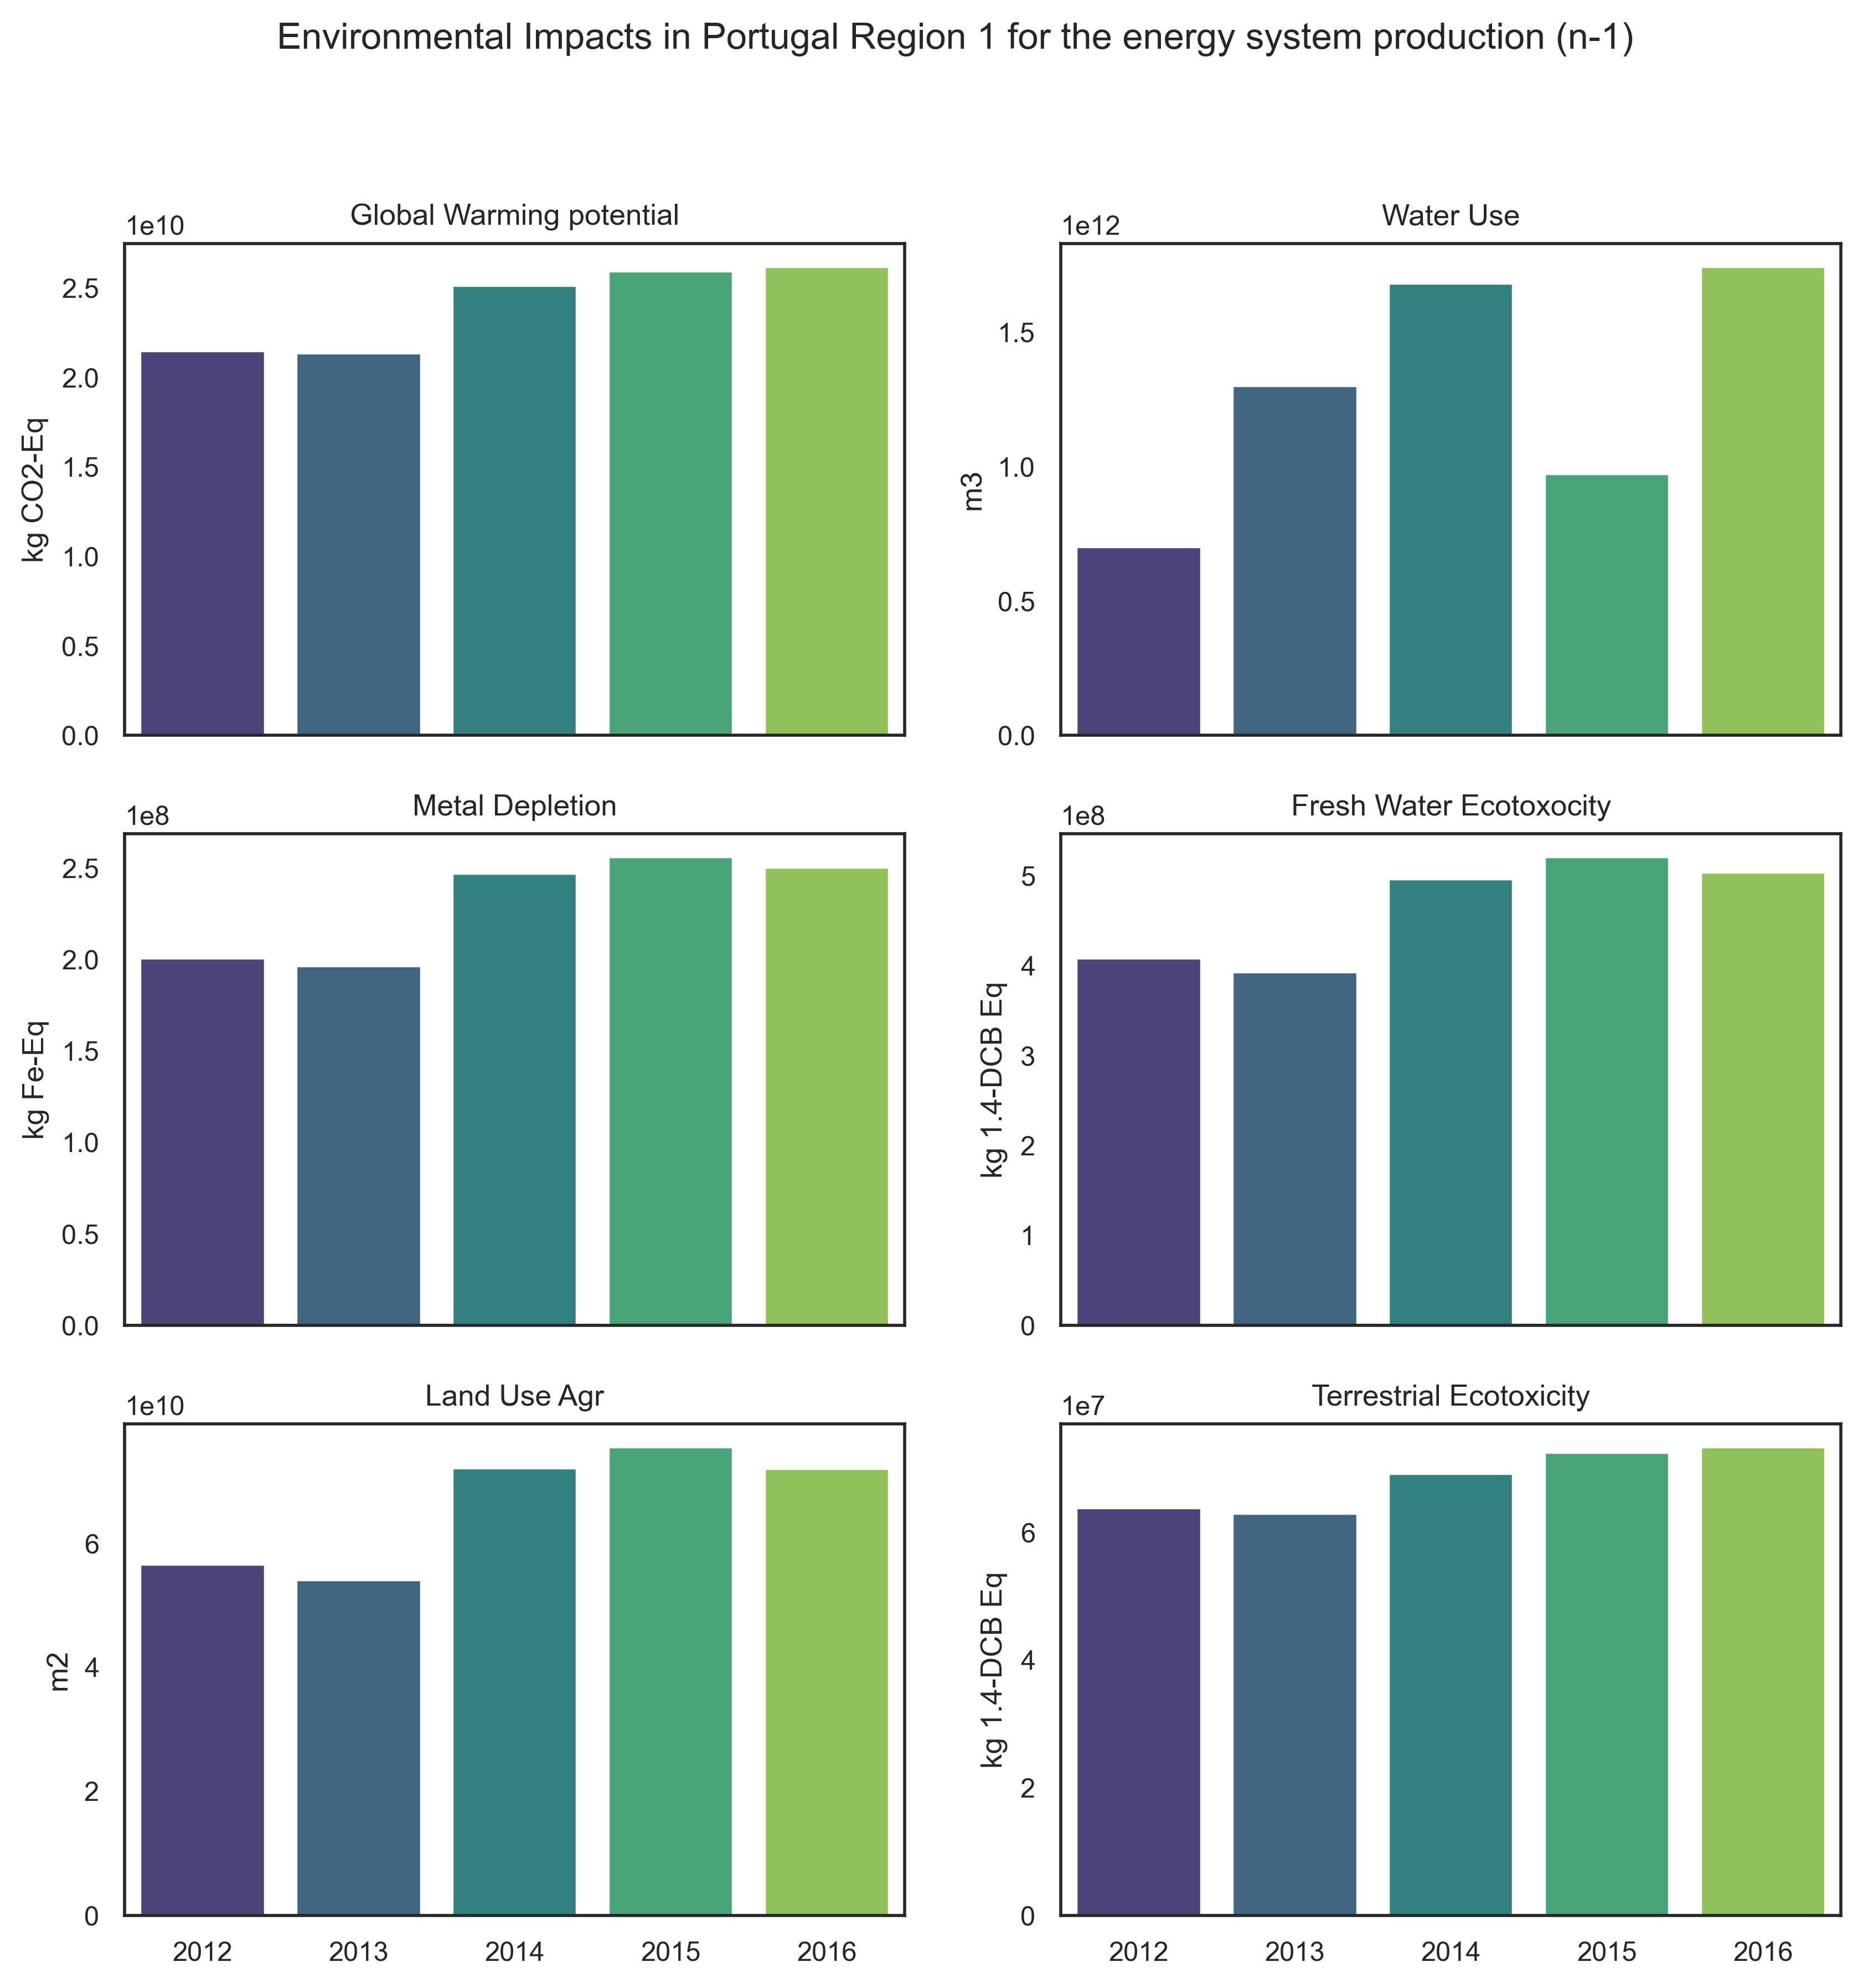

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
fig, axes = plt.subplots(3,2,figsize=(10,10),dpi=400, sharex=True)
fig.suptitle('Environmental Impacts in Portugal Region 1 for the energy system production (n-1)')
sns.set_style("ticks")
sns.set_context("paper")
#plt.tight_layout()
#GWP100

sns.barplot(ax=axes[0,0],x='Period',y='Value',data=df_GWP100,palette='viridis',saturation=0.7).set(
    xlabel='',ylabel='kg CO2-Eq')
axes[0,0].set_title('Global Warming potential')

#axes[0,0].plot(x=df_GWP100.Period,y=df_GWP100.Value)

# Water use
sns.barplot(ax=axes[0,1],x='Period',y='Value',data=df_WaterUse,palette='viridis',saturation=0.7).set(
    xlabel='',ylabel='m3')
axes[0,1].set_title('Water Use')
sns.set_style("ticks")

#Metal Depletion
sns.barplot(ax=axes[1,0],x='Period',y='Value',data=df_MetalDepletion,palette='viridis',saturation=0.7).set(
    xlabel='',ylabel='kg Fe-Eq')
axes[1,0].set_title('Metal Depletion')
sns.set_style('ticks')

#Fresh Water Ecotoxicity
sns.barplot(ax=axes[1,1],x='Period',y='Value',data=df_FreshWaterEcotox,palette='viridis',saturation=0.7).set(
    xlabel='',ylabel='kg 1.4-DCB Eq')
axes[1,1].set_title('Fresh Water Ecotoxocity')
sns.set_style("ticks")

#Land Use Agr
sns.barplot(ax=axes[2,0],x='Period',y='Value',data=df_LandUseAgr,palette='viridis',saturation=0.7).set(
    xlabel='',ylabel='m2')
axes[2,0].set_title('Land Use Agr')
sns.set_style("ticks")

#Terrestrial Ecotox
sns.barplot(ax=axes[2,1],x='Period',y='Value',data=df_TerrestrialEcotox,palette='viridis',saturation=0.7).set(
    xlabel='',ylabel='kg 1.4-DCB Eq')
axes[2,1].set_title('Terrestrial Ecotoxicity')

sns.set(rc={"figure.dpi":400, 'savefig.dpi':400})
plt.savefig(r'C:\Users\altz7\Downloads\plot_6_generation_region1.png', facecolor='w')  


In [13]:
df_GWP100.sort_values(by='Period',inplace=True)
df_WaterUse.sort_values(by='Period',inplace=True)
df_MetalDepletion.sort_values(by='Period',inplace=True)
df_FreshWaterEcotox.sort_values(by='Period',inplace=True)
df_LandUseAgr.sort_values(by='Period',inplace=True)
df_TerrestrialEcotox.sort_values(by='Period',inplace=True)

C:\Users\altz7\AppData\Local\Temp\ipykernel_5384\1110515372.py:62: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "dpli" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig(r'C:\Users\altz7\Downloads\plot_lines_region1_generation.png', dpli=400)


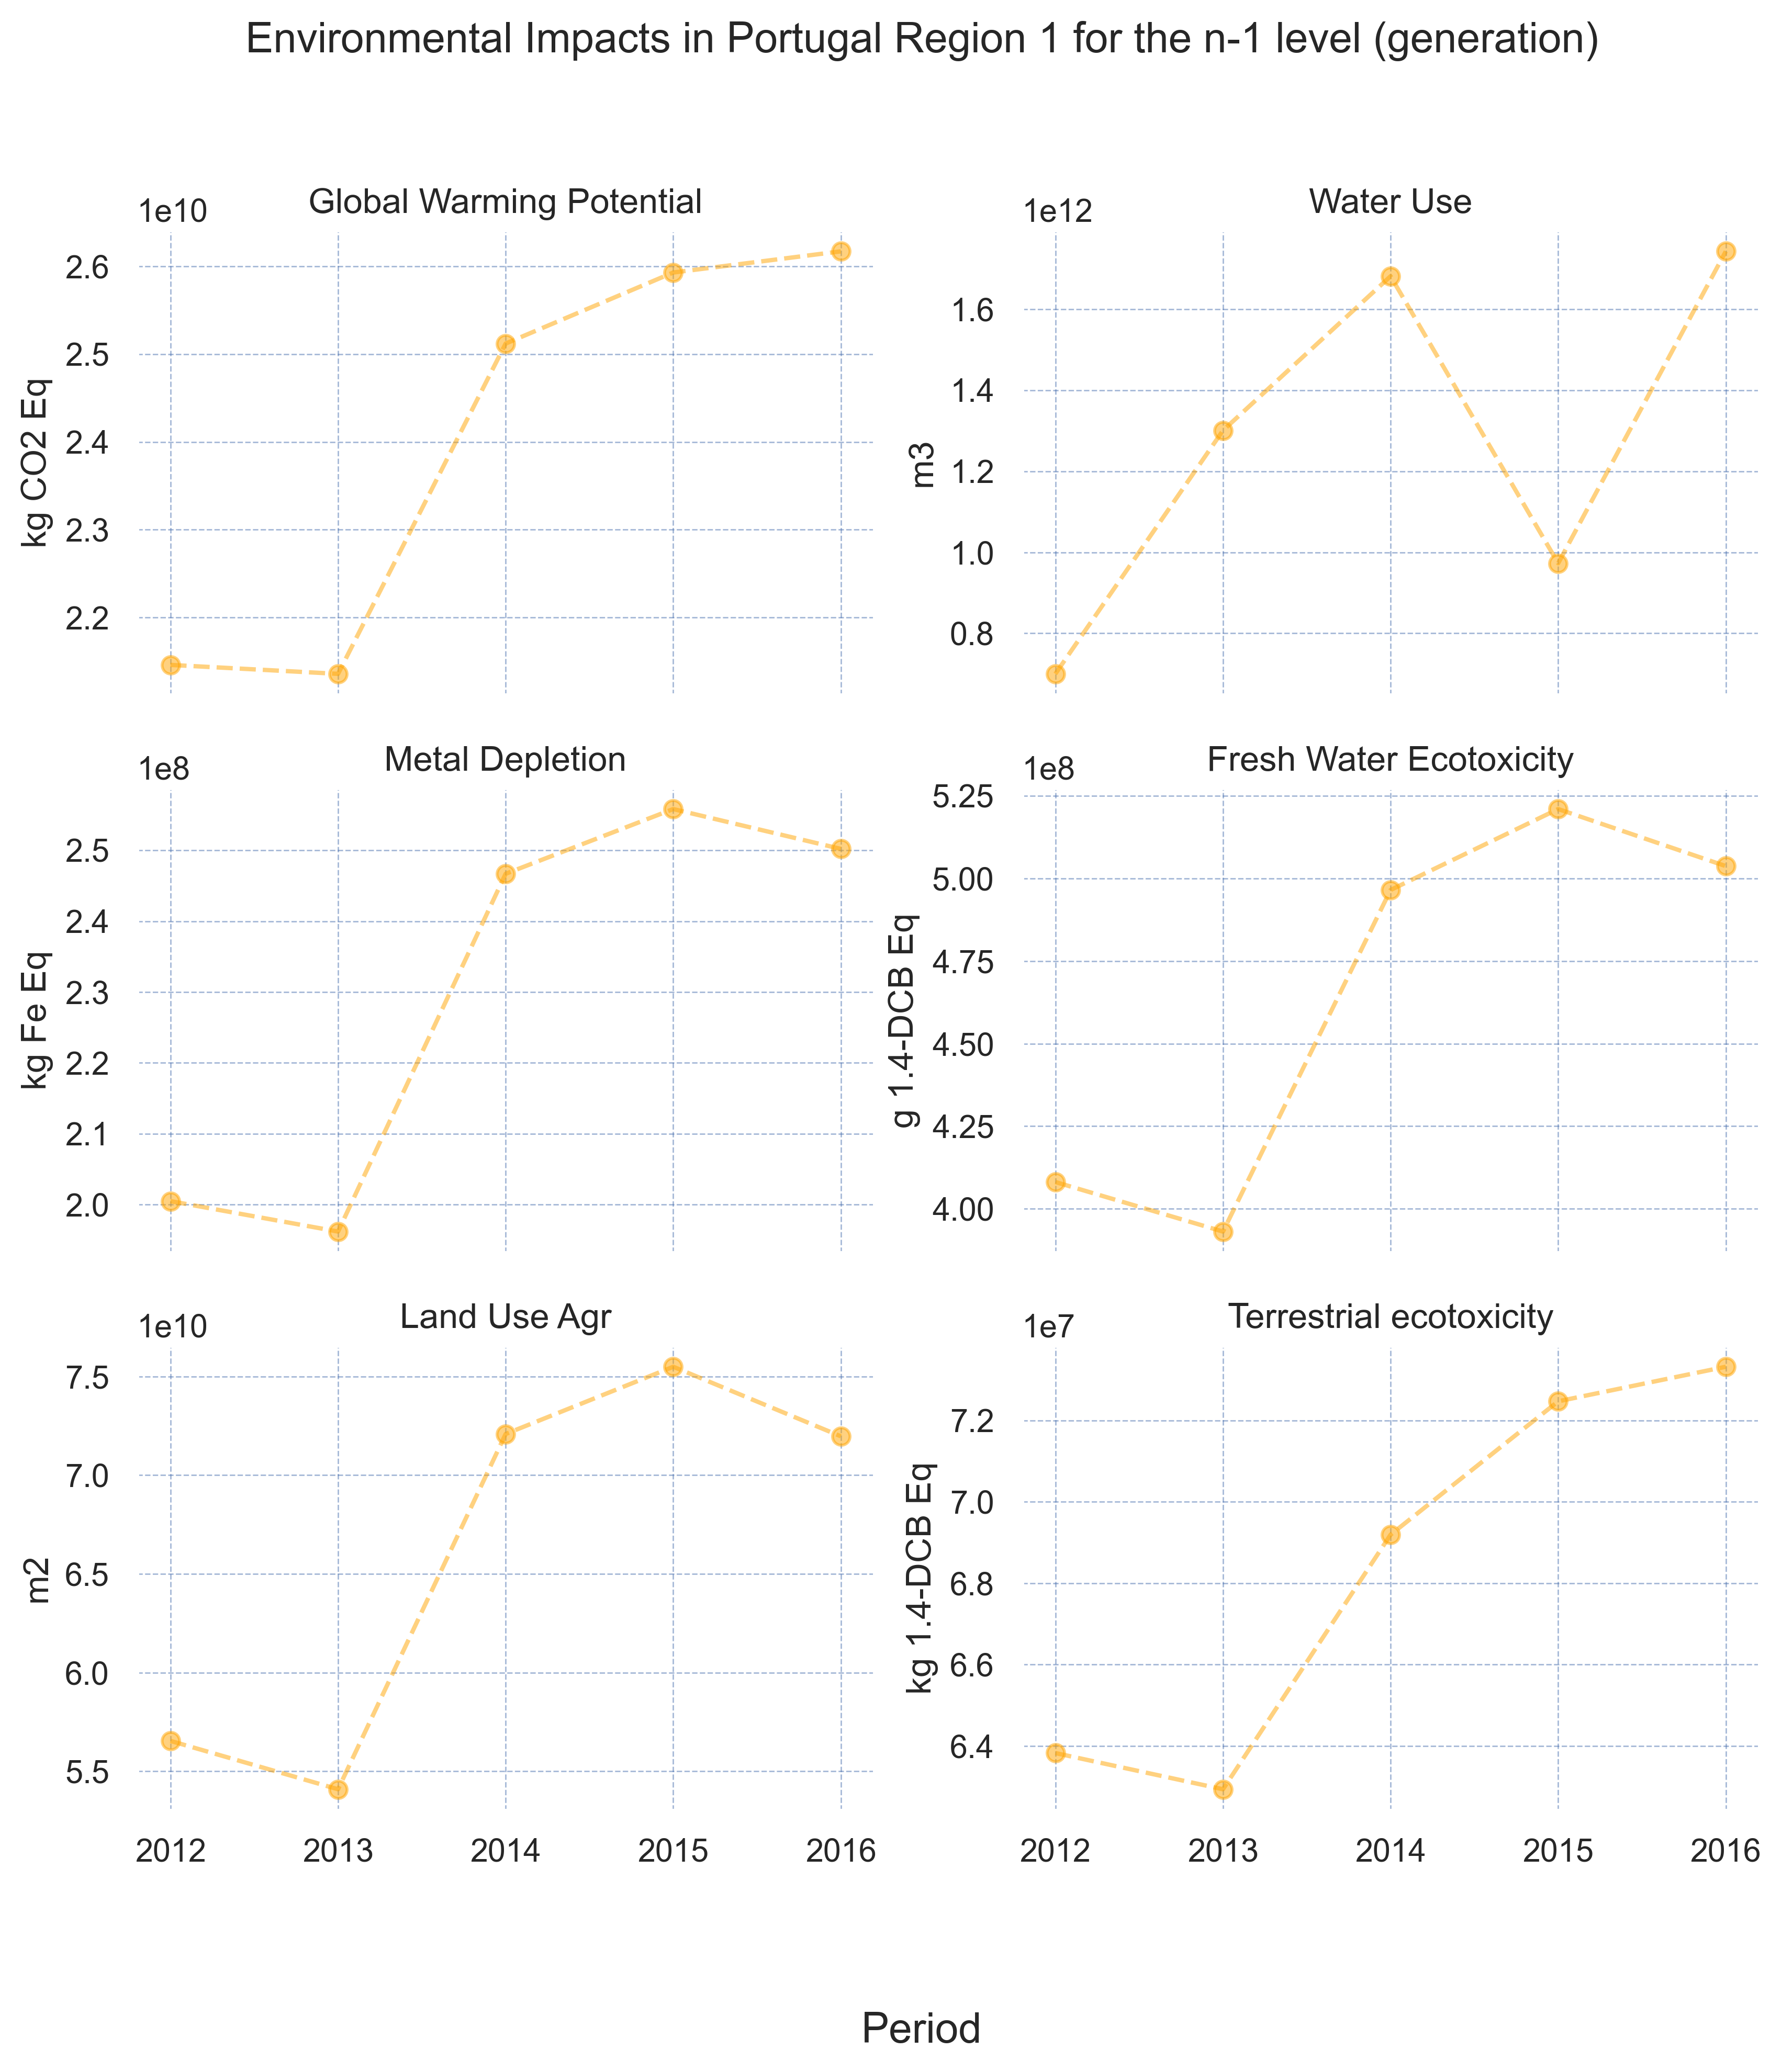

In [14]:
#run the line plots
fig, axes=plt.subplots(3,2,figsize=(10,10),dpi=400, sharex=True)
fig.suptitle('Environmental Impacts in Portugal Region 1 for the n-1 level (generation)')


#x="2012 2013 2014 2015 2016".split()
#GWP
y1=df_GWP100.Value
x1=df_GWP100.Period
axes[0,0].plot(x1,y1,marker='o', color='orange',alpha=0.5,linestyle='--')
axes[0,0].set_title('Global Warming Potential')
axes[0,0].set_facecolor('white')
axes[0,0].grid(color='b', alpha=0.5, linestyle='dashed', linewidth=0.5)
axes[0,0].set_ylabel('kg CO2 Eq')
#Water Use
y2=df_WaterUse.Value
x2=df_WaterUse.Period
axes[0,1].plot(x2,y2,marker='o', color='orange',alpha=0.5,linestyle='--')
axes[0,1].set_title('Water Use')
axes[0,1].set_facecolor('white')
axes[0,1].grid(color='b', alpha=0.5, linestyle='dashed', linewidth=0.5)
axes[0,1].set_ylabel('m3')
#Metal Depletion
y3=df_MetalDepletion.Value
x3=df_MetalDepletion.Period
axes[1,0].plot(x3,y3,marker='o', color='orange',alpha=0.5,linestyle='--')
axes[1,0].set_title('Metal Depletion')
axes[1,0].set_facecolor('white')
axes[1,0].grid(color='b', alpha=0.5, linestyle='dashed', linewidth=0.5)
axes[1,0].set_ylabel('kg Fe Eq')
#Fresh Water Ecotoxicity
y4=df_FreshWaterEcotox.Value
x4=df_FreshWaterEcotox.Period
axes[1,1].plot(x4,y4,marker='o', color='orange',alpha=0.5,linestyle='--')
axes[1,1].set_title('Fresh Water Ecotoxicity')
axes[1,1].set_facecolor('white')
axes[1,1].grid(color='b', alpha=0.5, linestyle='dashed', linewidth=0.5)
axes[1,1].set_ylabel('g 1.4-DCB Eq')

#Land Use Agr
y5=df_LandUseAgr.Value
x5=df_LandUseAgr.Period
axes[2,0].plot(x5,y5,marker='o', color='orange',alpha=0.5,linestyle='--')
axes[2,0].set_title('Land Use Agr')
axes[2,0].set_facecolor('white')
axes[2,0].grid(color='b', alpha=0.5, linestyle='dashed', linewidth=0.5)
axes[2,0].set_ylabel('m2')

#Terrestrial Ecotox
y6=df_TerrestrialEcotox.Value
x6=df_TerrestrialEcotox.Period
axes[2,1].plot(x6,y6,marker='o', color='orange',alpha=0.5,linestyle='--')
axes[2,1].set_title('Terrestrial ecotoxicity')
axes[2,1].set_facecolor('white')
axes[2,1].grid(color='b', alpha=0.5, linestyle='dashed', linewidth=0.5)
axes[2,1].set_ylabel('kg 1.4-DCB Eq')


fig.supxlabel('Period')


plt.savefig(r'C:\Users\altz7\Downloads\plot_lines_region1_generation.png', dpli=400) 

# Finally, repeat the process for the region 2 (n-1)

In [15]:
region2_gen=df[df['System']=='PRT_2'][df['Processor']=='energysystem']
region2_gen
#drop the Internal scope
region2_gen.drop(region2_gen[region2_gen['Scope']=='Internal'].index, inplace=True)
region2_gen
region2_gen['Indicator'].unique()
listindicators=region2_gen['Indicator'].unique()
listindicator=listindicators.tolist()
#listindicator
label=region2_gen['Unit'].unique().tolist()
for i in region2.columns:
    print(region2_gen[i].unique())
    nom_dataframes=[]
    listindicators=region2_gen['Indicator'].unique()
    listindicator=listindicators.tolist()
    zipped=zip(listindicators,label)
for i,g in region2_gen.groupby('Indicator'):
    globals()['df_'+str(i)]=g
    nom_dataframes.append(i)

C:\Users\altz7\AppData\Local\Temp\ipykernel_5384\3869056290.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  region2_gen=df[df['System']=='PRT_2'][df['Processor']=='energysystem']


NameError: name 'region2' is not defined

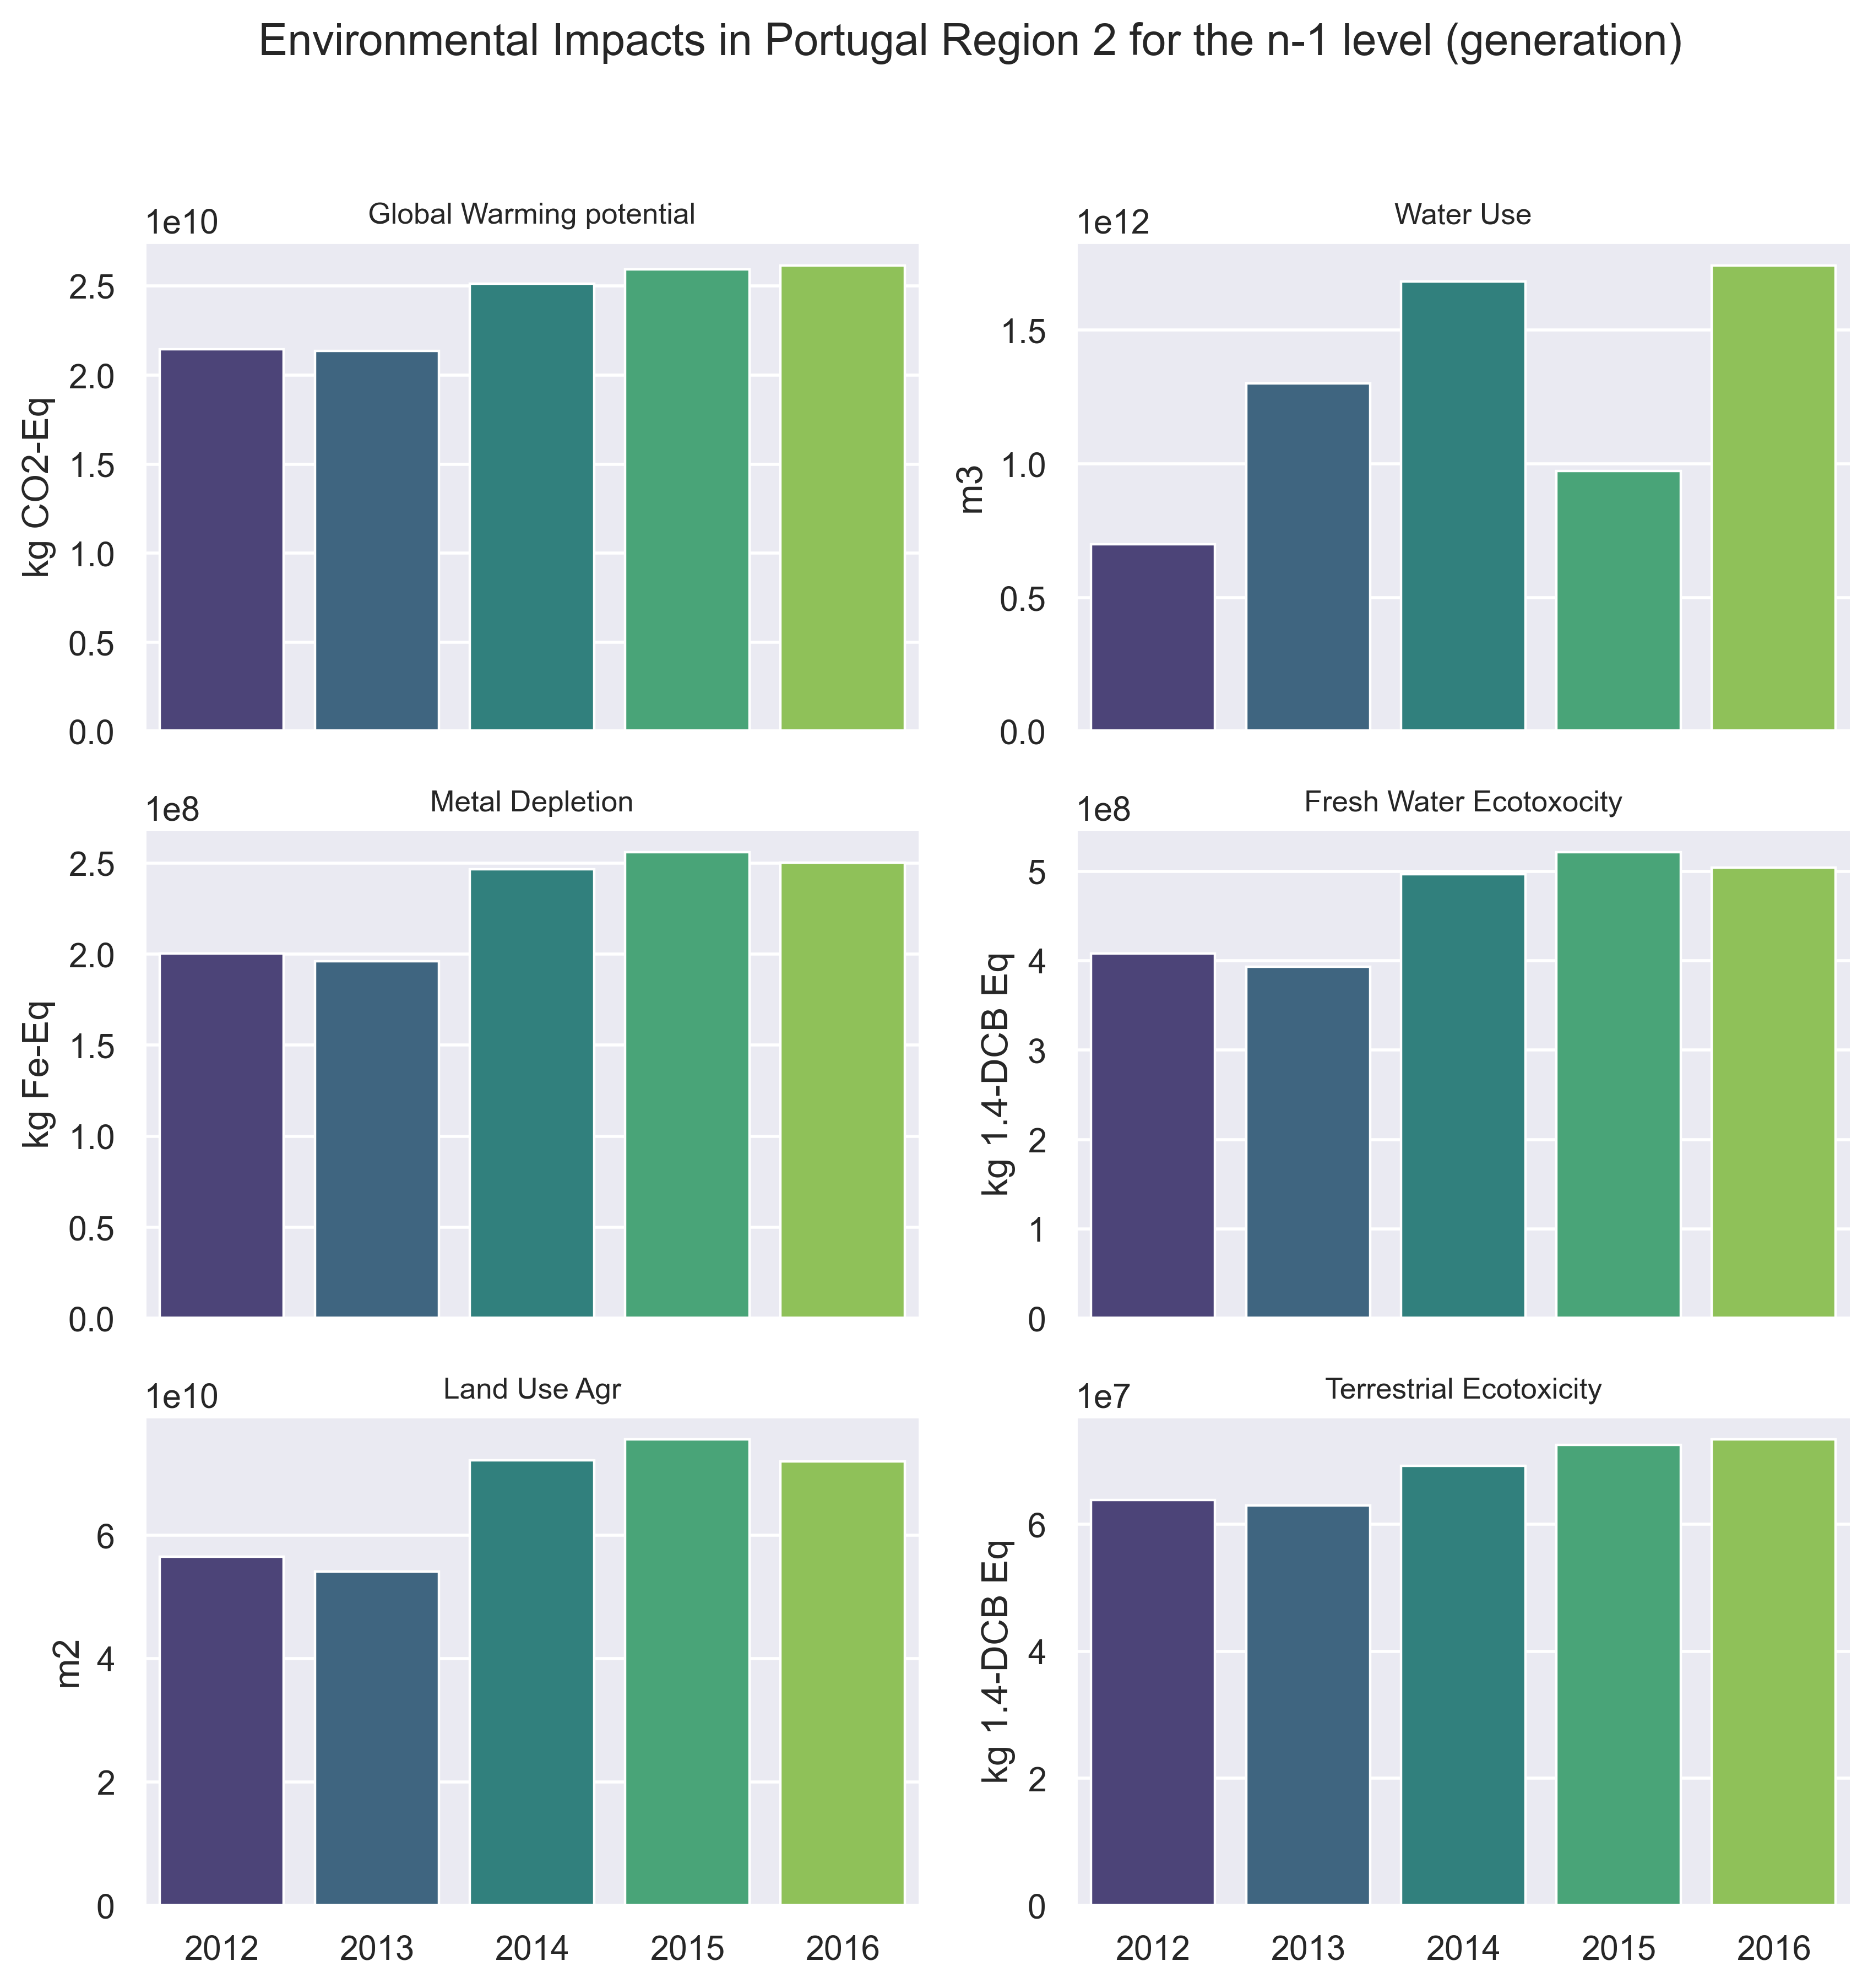

In [16]:
fig, axes = plt.subplots(3,2,figsize=(10,10),dpi=400, sharex=True)
fig.suptitle('Environmental Impacts in Portugal Region 2 for the n-1 level (generation)')
sns.set_style("white")
sns.set_context("paper")
#plt.tight_layout()
#GWP100

sns.barplot(ax=axes[0,0],x='Period',y='Value',data=df_GWP100,palette='viridis',saturation=0.7).set(
    xlabel='',ylabel='kg CO2-Eq')
axes[0,0].set_title('Global Warming potential')

#axes[0,0].plot(x=df_GWP100.Period,y=df_GWP100.Value)

# Water use
sns.barplot(ax=axes[0,1],x='Period',y='Value',data=df_WaterUse,palette='viridis',saturation=0.7).set(
    xlabel='',ylabel='m3')
axes[0,1].set_title('Water Use')


#Metal Depletion
sns.barplot(ax=axes[1,0],x='Period',y='Value',data=df_MetalDepletion,palette='viridis',saturation=0.7).set(
    xlabel='',ylabel='kg Fe-Eq')
axes[1,0].set_title('Metal Depletion')

#Fresh Water Ecotoxicity
sns.barplot(ax=axes[1,1],x='Period',y='Value',data=df_FreshWaterEcotox,palette='viridis',saturation=0.7).set(
    xlabel='',ylabel='kg 1.4-DCB Eq')
axes[1,1].set_title('Fresh Water Ecotoxocity')

#Land Use Agr
sns.barplot(ax=axes[2,0],x='Period',y='Value',data=df_LandUseAgr,palette='viridis',saturation=0.7).set(
    xlabel='',ylabel='m2')
axes[2,0].set_title('Land Use Agr')

#Terrestrial Ecotox
sns.barplot(ax=axes[2,1],x='Period',y='Value',data=df_TerrestrialEcotox,palette='viridis',saturation=0.7).set(
    xlabel='',ylabel='kg 1.4-DCB Eq')
axes[2,1].set_title('Terrestrial Ecotoxicity')

sns.set(rc={"figure.dpi":400, 'savefig.dpi':400})
plt.savefig(r'C:\Users\altz7\Downloads\BAR_region2_gen.png', facecolor='w') 

In [24]:
df_GWP100.sort_values(by='Period',inplace=True)
df_WaterUse.sort_values(by='Period',inplace=True)
df_MetalDepletion.sort_values(by='Period',inplace=True)
df_FreshWaterEcotox.sort_values(by='Period',inplace=True)
df_LandUseAgr.sort_values(by='Period',inplace=True)
df_TerrestrialEcotox.sort_values(by='Period',inplace=True)

C:\Users\altz7\AppData\Local\Temp\ipykernel_5384\3417142241.py:62: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "dpli" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig(r'C:\Users\altz7\Downloads\plot_lines_region2_generation.png', dpli=400)


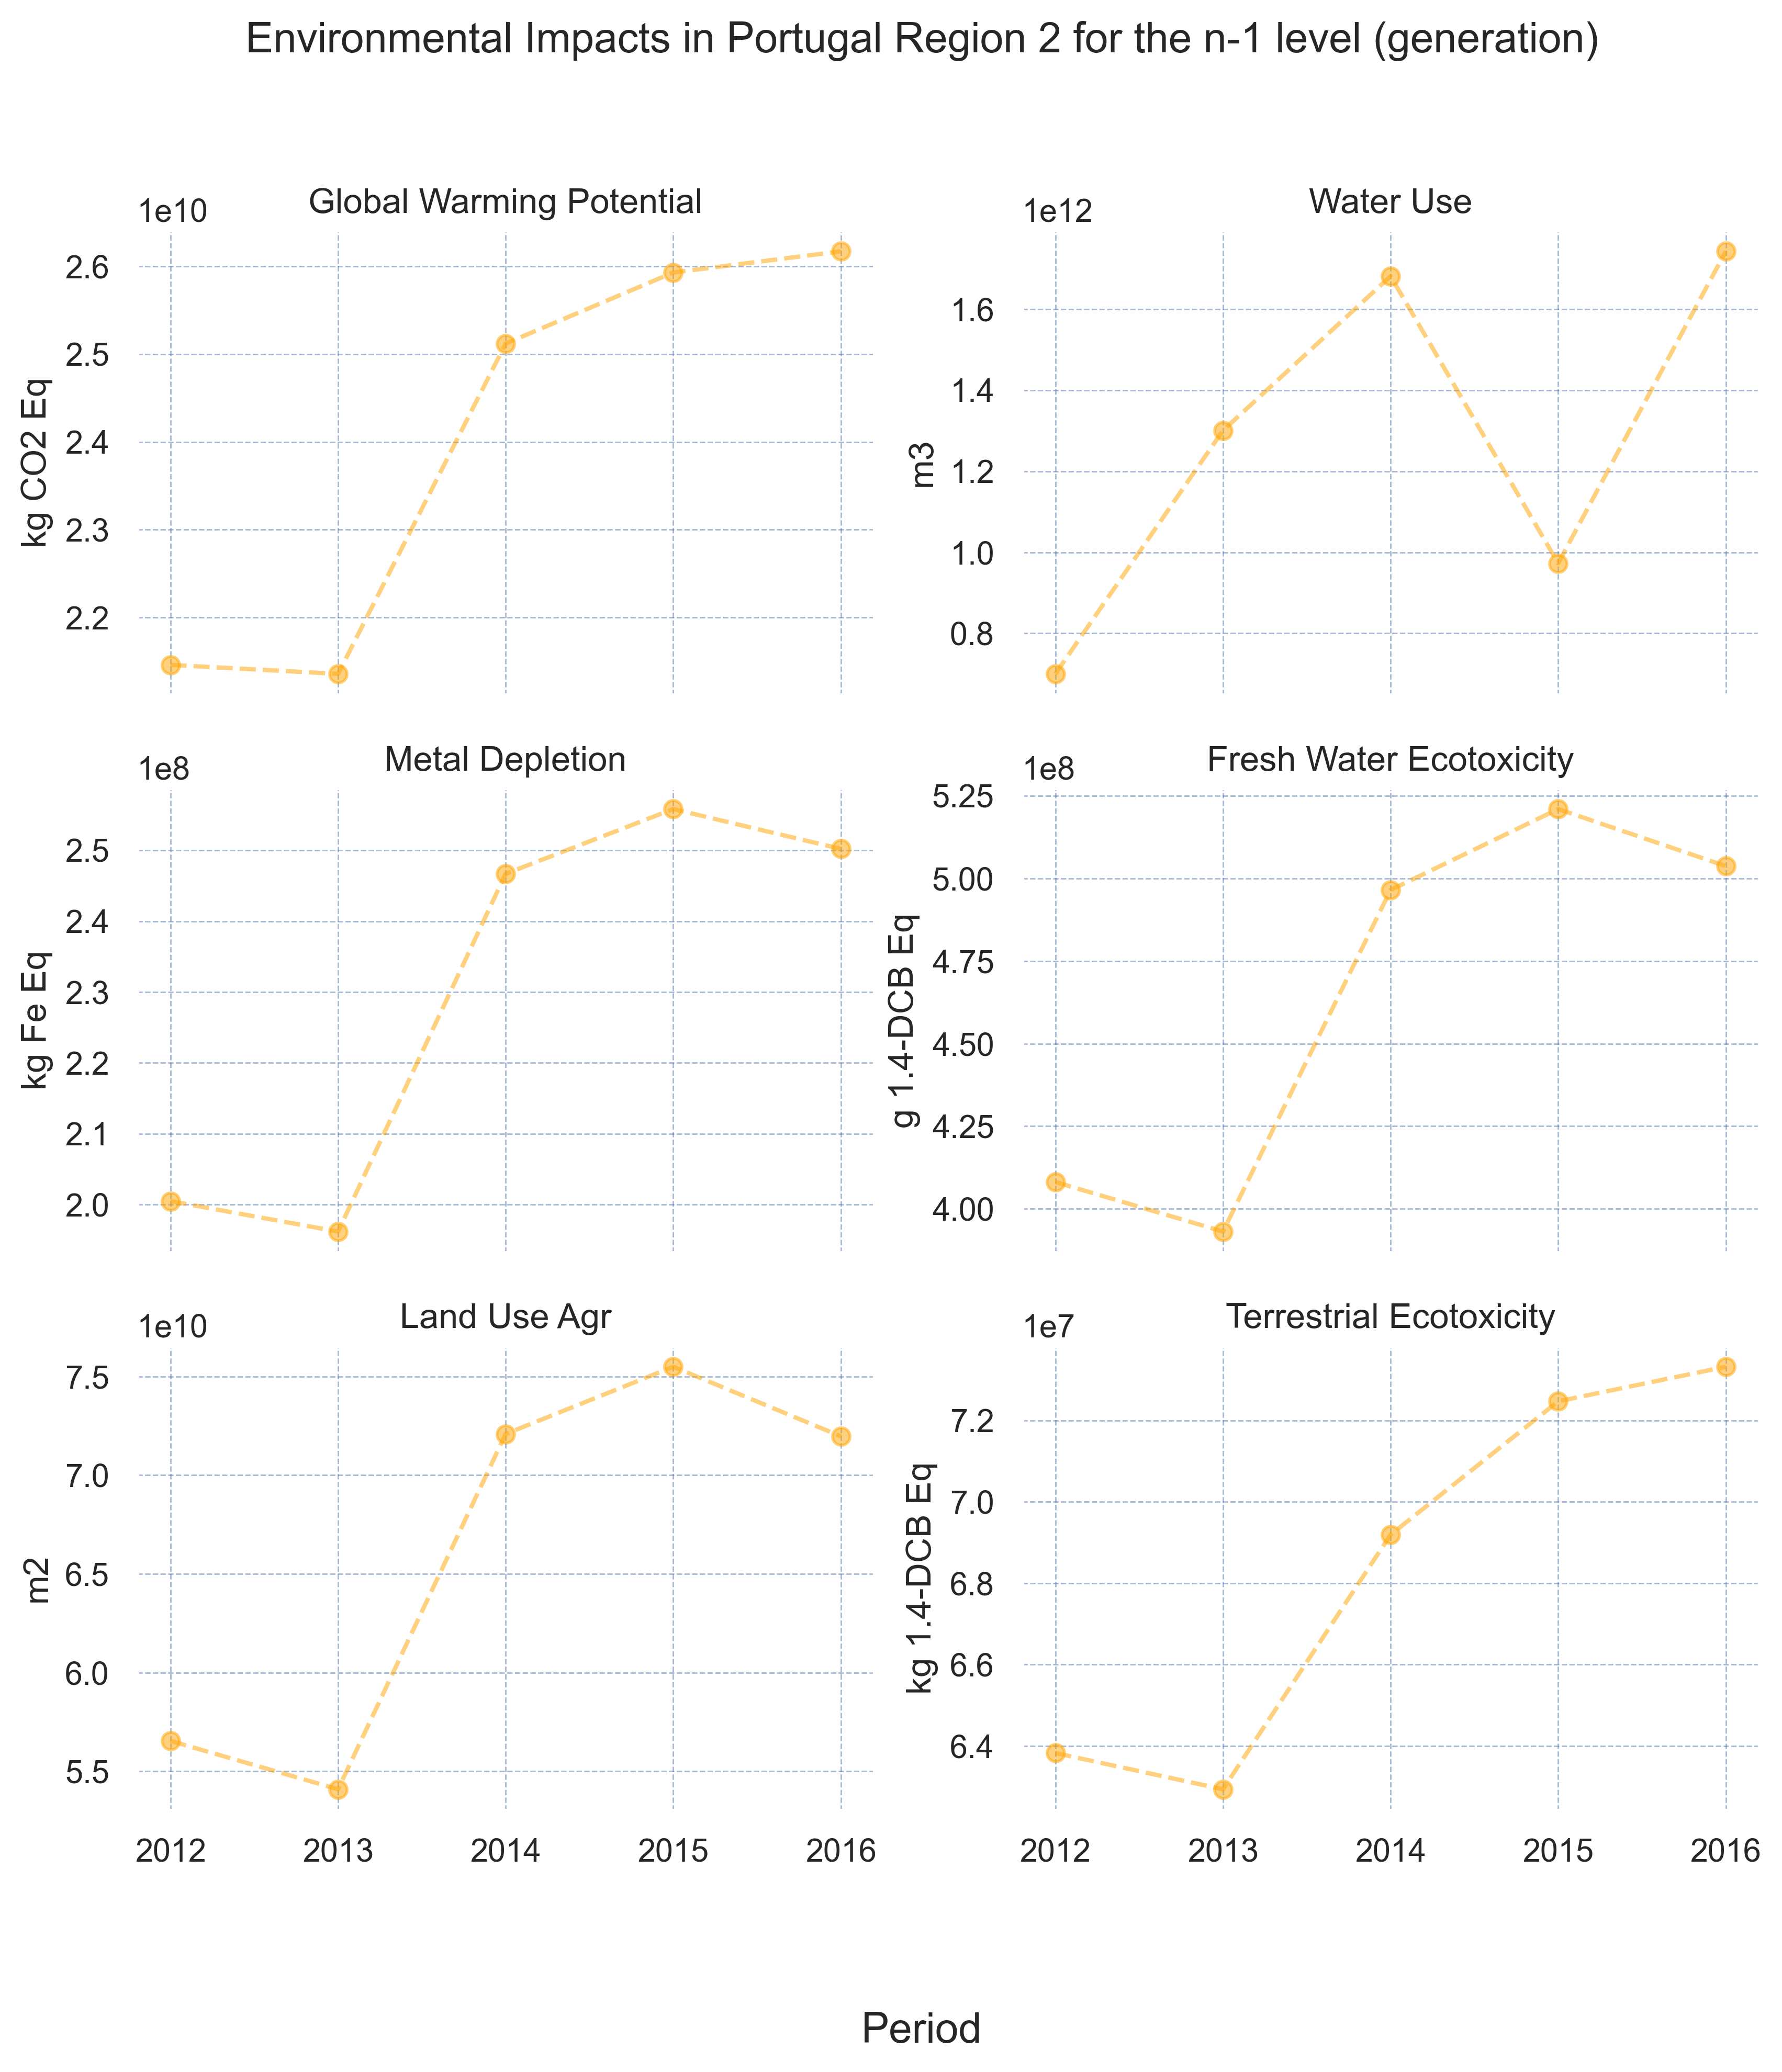

In [17]:
#run the line plots
fig, axes=plt.subplots(3,2,figsize=(10,10),dpi=400, sharex=True)
fig.suptitle('Environmental Impacts in Portugal Region 2 for the n-1 level (generation)')


#x="2012 2013 2014 2015 2016".split()
#GWP
y1=df_GWP100.Value
x1=df_GWP100.Period
axes[0,0].plot(x1,y1,marker='o', color='orange',alpha=0.5,linestyle='--')
axes[0,0].set_title('Global Warming Potential')
axes[0,0].set_facecolor('white')
axes[0,0].grid(color='b', alpha=0.5, linestyle='dashed', linewidth=0.5)
axes[0,0].set_ylabel('kg CO2 Eq')
#Water Use
y2=df_WaterUse.Value
x2=df_WaterUse.Period
axes[0,1].plot(x2,y2,marker='o', color='orange',alpha=0.5,linestyle='--')
axes[0,1].set_title('Water Use')
axes[0,1].set_facecolor('white')
axes[0,1].grid(color='b', alpha=0.5, linestyle='dashed', linewidth=0.5)
axes[0,1].set_ylabel('m3')
#Metal Depletion
y3=df_MetalDepletion.Value
x3=df_MetalDepletion.Period
axes[1,0].plot(x3,y3,marker='o', color='orange',alpha=0.5,linestyle='--')
axes[1,0].set_title('Metal Depletion')
axes[1,0].set_facecolor('white')
axes[1,0].grid(color='b', alpha=0.5, linestyle='dashed', linewidth=0.5)
axes[1,0].set_ylabel('kg Fe Eq')
#Fresh Water Ecotoxicity
y4=df_FreshWaterEcotox.Value
x4=df_FreshWaterEcotox.Period
axes[1,1].plot(x4,y4,marker='o', color='orange',alpha=0.5,linestyle='--')
axes[1,1].set_title('Fresh Water Ecotoxicity')
axes[1,1].set_facecolor('white')
axes[1,1].grid(color='b', alpha=0.5, linestyle='dashed', linewidth=0.5)
axes[1,1].set_ylabel('g 1.4-DCB Eq')

#Land Use Agr
y5=df_LandUseAgr.Value
x5=df_LandUseAgr.Period
axes[2,0].plot(x5,y5,marker='o', color='orange',alpha=0.5,linestyle='--')
axes[2,0].set_title('Land Use Agr')
axes[2,0].set_facecolor('white')
axes[2,0].grid(color='b', alpha=0.5, linestyle='dashed', linewidth=0.5)
axes[2,0].set_ylabel('m2')

#Terrestrial Ecotox
y6=df_TerrestrialEcotox.Value
x6=df_TerrestrialEcotox.Period
axes[2,1].plot(x6,y6,marker='o', color='orange',alpha=0.5,linestyle='--')
axes[2,1].set_title('Terrestrial Ecotoxicity')
axes[2,1].set_facecolor('white')
axes[2,1].grid(color='b', alpha=0.5, linestyle='dashed', linewidth=0.5)
axes[2,1].set_ylabel('kg 1.4-DCB Eq')


fig.supxlabel('Period')


plt.savefig(r'C:\Users\altz7\Downloads\plot_lines_region2_generation.png', dpli=400) 

# Let's check the Storage (n-1) level

In [26]:
df['Processor'].unique()
region1_stor=df[df['System']=='PRT_1'][df['Processor']=='energysystem.storage']
region1_stor.drop(region1_stor[region1_stor['Scope']=='Internal'].index, inplace=True)
region1_stor.sort_values(by='Period',inplace=True)
region1_stor
region1_stor['Indicator'].unique()
listindicators=region1_stor['Indicator'].unique()
listindicator=listindicators.tolist()
listindicator
label=region1_stor['Unit'].unique().tolist()
for i in region1_stor.columns:
    print(region1_stor[i].unique())
    nom_dataframes=[]
    listindicators=region1_gen['Indicator'].unique()
    listindicator=listindicators.tolist()
    zipped=zip(listindicators,label)
for i,g in region1_stor.groupby('Indicator'):
    globals()['df_'+str(i)]=g
    nom_dataframes.append(i)


['__2012' '__2013' '__2014' '__2015' '__2016']
['PRT_1']
[2012 2013 2014 2015 2016]
['Total']
['energysystem.storage']
['MetalDepletion' 'LandUse' 'WaterUse' 'FreshWaterEcotox' 'GWP100'
 'LandUseAgr' 'LandUseUrb' 'Test2' 'TerrestrialEcotox']
[4.02240939e+10 1.76992988e+10 3.38339447e+12 1.53720521e+10
 3.55264309e+11 1.65301190e+10 1.16917978e+09 3.04013053e+02
 9.55979381e+08 1.86091441e+10 1.31878503e+09 4.54131457e+10
 1.07873770e+09 3.43214420e+02 3.76512220e+12 1.73469177e+10
 1.99279292e+10 3.99512154e+11 1.93811399e+10 4.41541218e+11
 2.07505628e+10 1.47119516e+09 5.08708307e+10 4.01192887e+12
 1.20440585e+09 3.84512503e+02 2.22217579e+10 2.09282556e+10
 4.45116279e+12 4.79649211e+11 2.23979478e+10 1.59001167e+09
 5.48361115e+10 1.30122824e+09 4.14421659e+02 2.39879595e+10
 3.50299502e+12 1.63054361e+10 3.74660179e+11 1.74953381e+10
 1.23918952e+09 1.01376230e+09 3.22849357e+02 1.87345277e+10
 4.27158860e+10]
[nan]


C:\Users\altz7\AppData\Local\Temp\ipykernel_13480\307073910.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  region1_stor=df[df['System']=='PRT_1'][df['Processor']=='energysystem.storage']
C:\Users\altz7\AppData\Local\Temp\ipykernel_13480\307073910.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  region1_stor.drop(region1_stor[region1_stor['Scope']=='Internal'].index, inplace=True)
C:\Users\altz7\AppData\Local\Temp\ipykernel_13480\307073910.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  region1_stor.sort_values(by='Period',inplace=True)


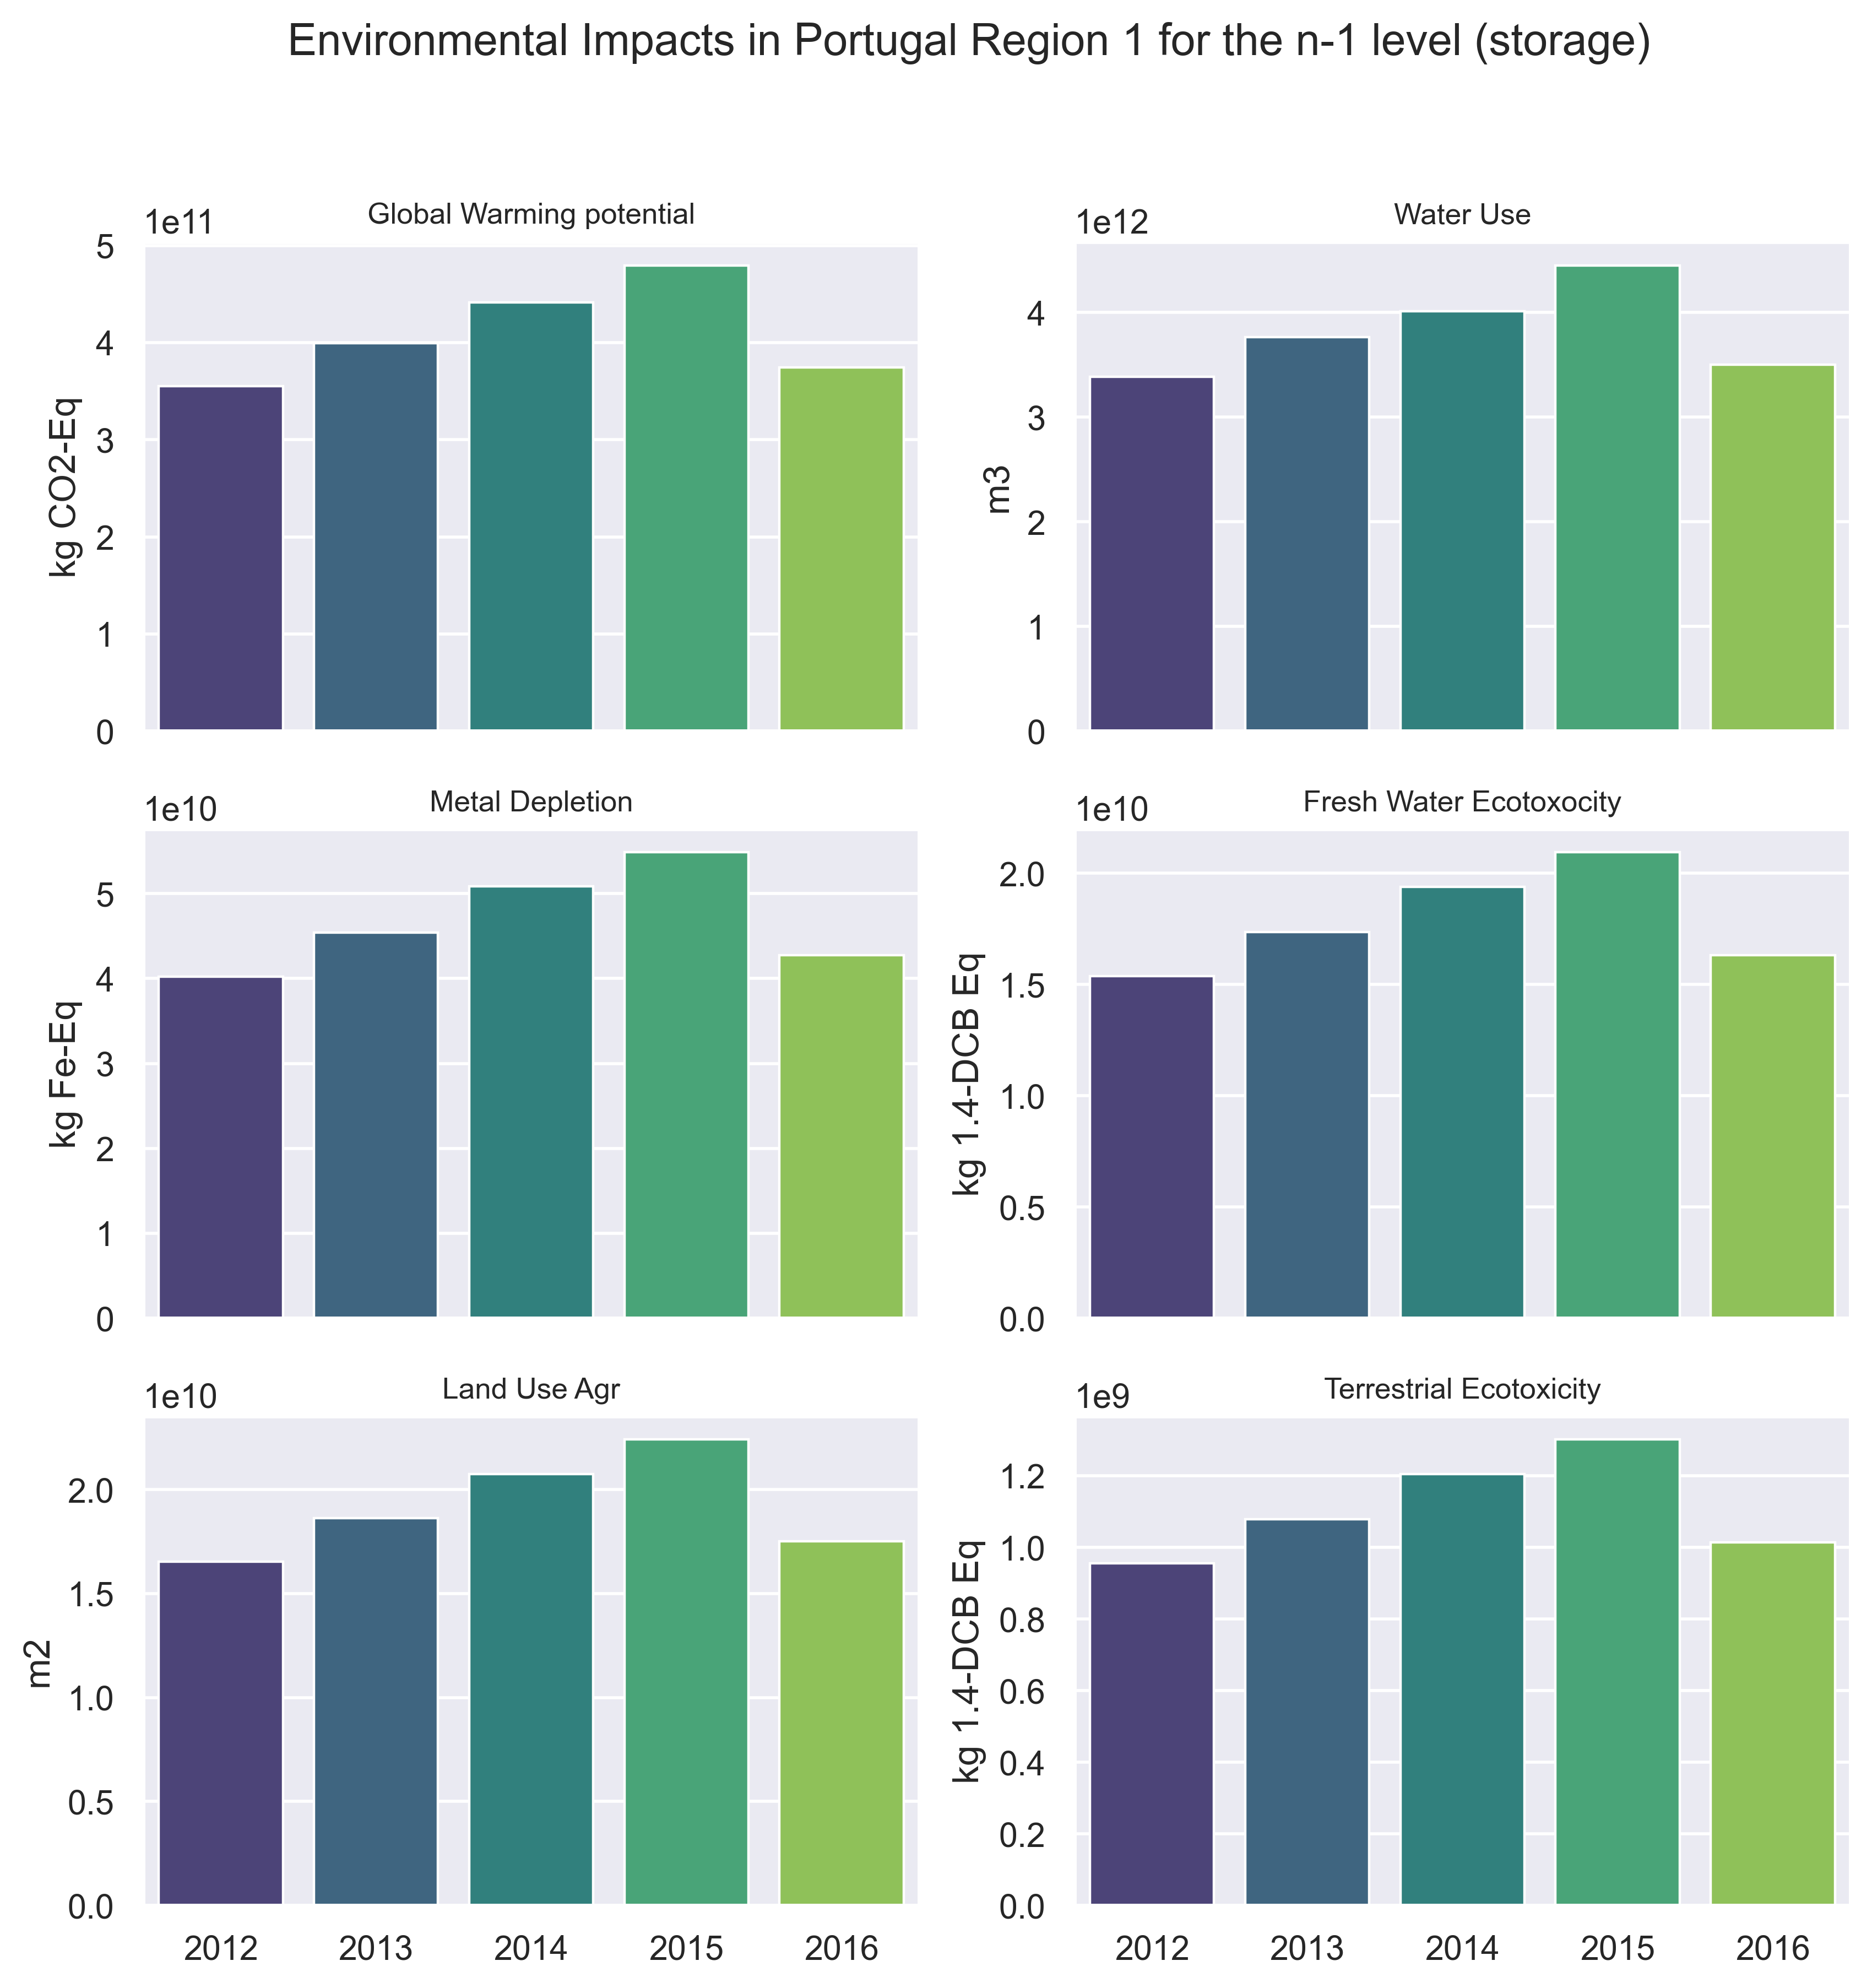

In [27]:
fig, axes = plt.subplots(3,2,figsize=(10,10),dpi=400, sharex=True)
fig.suptitle('Environmental Impacts in Portugal Region 1 for the n-1 level (storage)')
sns.set_style("white")
sns.set_context("paper")
#plt.tight_layout()
#GWP100

sns.barplot(ax=axes[0,0],x='Period',y='Value',data=df_GWP100,palette='viridis',saturation=0.7).set(
    xlabel='',ylabel='kg CO2-Eq')
axes[0,0].set_title('Global Warming potential')

#axes[0,0].plot(x=df_GWP100.Period,y=df_GWP100.Value)

# Water use
sns.barplot(ax=axes[0,1],x='Period',y='Value',data=df_WaterUse,palette='viridis',saturation=0.7).set(
    xlabel='',ylabel='m3')
axes[0,1].set_title('Water Use')


#Metal Depletion
sns.barplot(ax=axes[1,0],x='Period',y='Value',data=df_MetalDepletion,palette='viridis',saturation=0.7).set(
    xlabel='',ylabel='kg Fe-Eq')
axes[1,0].set_title('Metal Depletion')

#Fresh Water Ecotoxicity
sns.barplot(ax=axes[1,1],x='Period',y='Value',data=df_FreshWaterEcotox,palette='viridis',saturation=0.7).set(
    xlabel='',ylabel='kg 1.4-DCB Eq')
axes[1,1].set_title('Fresh Water Ecotoxocity')

#Land Use Agr
sns.barplot(ax=axes[2,0],x='Period',y='Value',data=df_LandUseAgr,palette='viridis',saturation=0.7).set(
    xlabel='',ylabel='m2')
axes[2,0].set_title('Land Use Agr')

#Terrestrial Ecotox
sns.barplot(ax=axes[2,1],x='Period',y='Value',data=df_TerrestrialEcotox,palette='viridis',saturation=0.7).set(
    xlabel='',ylabel='kg 1.4-DCB Eq')
axes[2,1].set_title('Terrestrial Ecotoxicity')

sns.set(rc={"figure.dpi":400, 'savefig.dpi':400})
plt.savefig(r'C:\Users\altz7\Downloads\BAR_region1_stor.png', facecolor='w') 

C:\Users\altz7\AppData\Local\Temp\ipykernel_13480\3460279801.py:61: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "dpli" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig(r'C:\Users\altz7\Downloads\plot_lines_region1_stor.png', dpli=400)


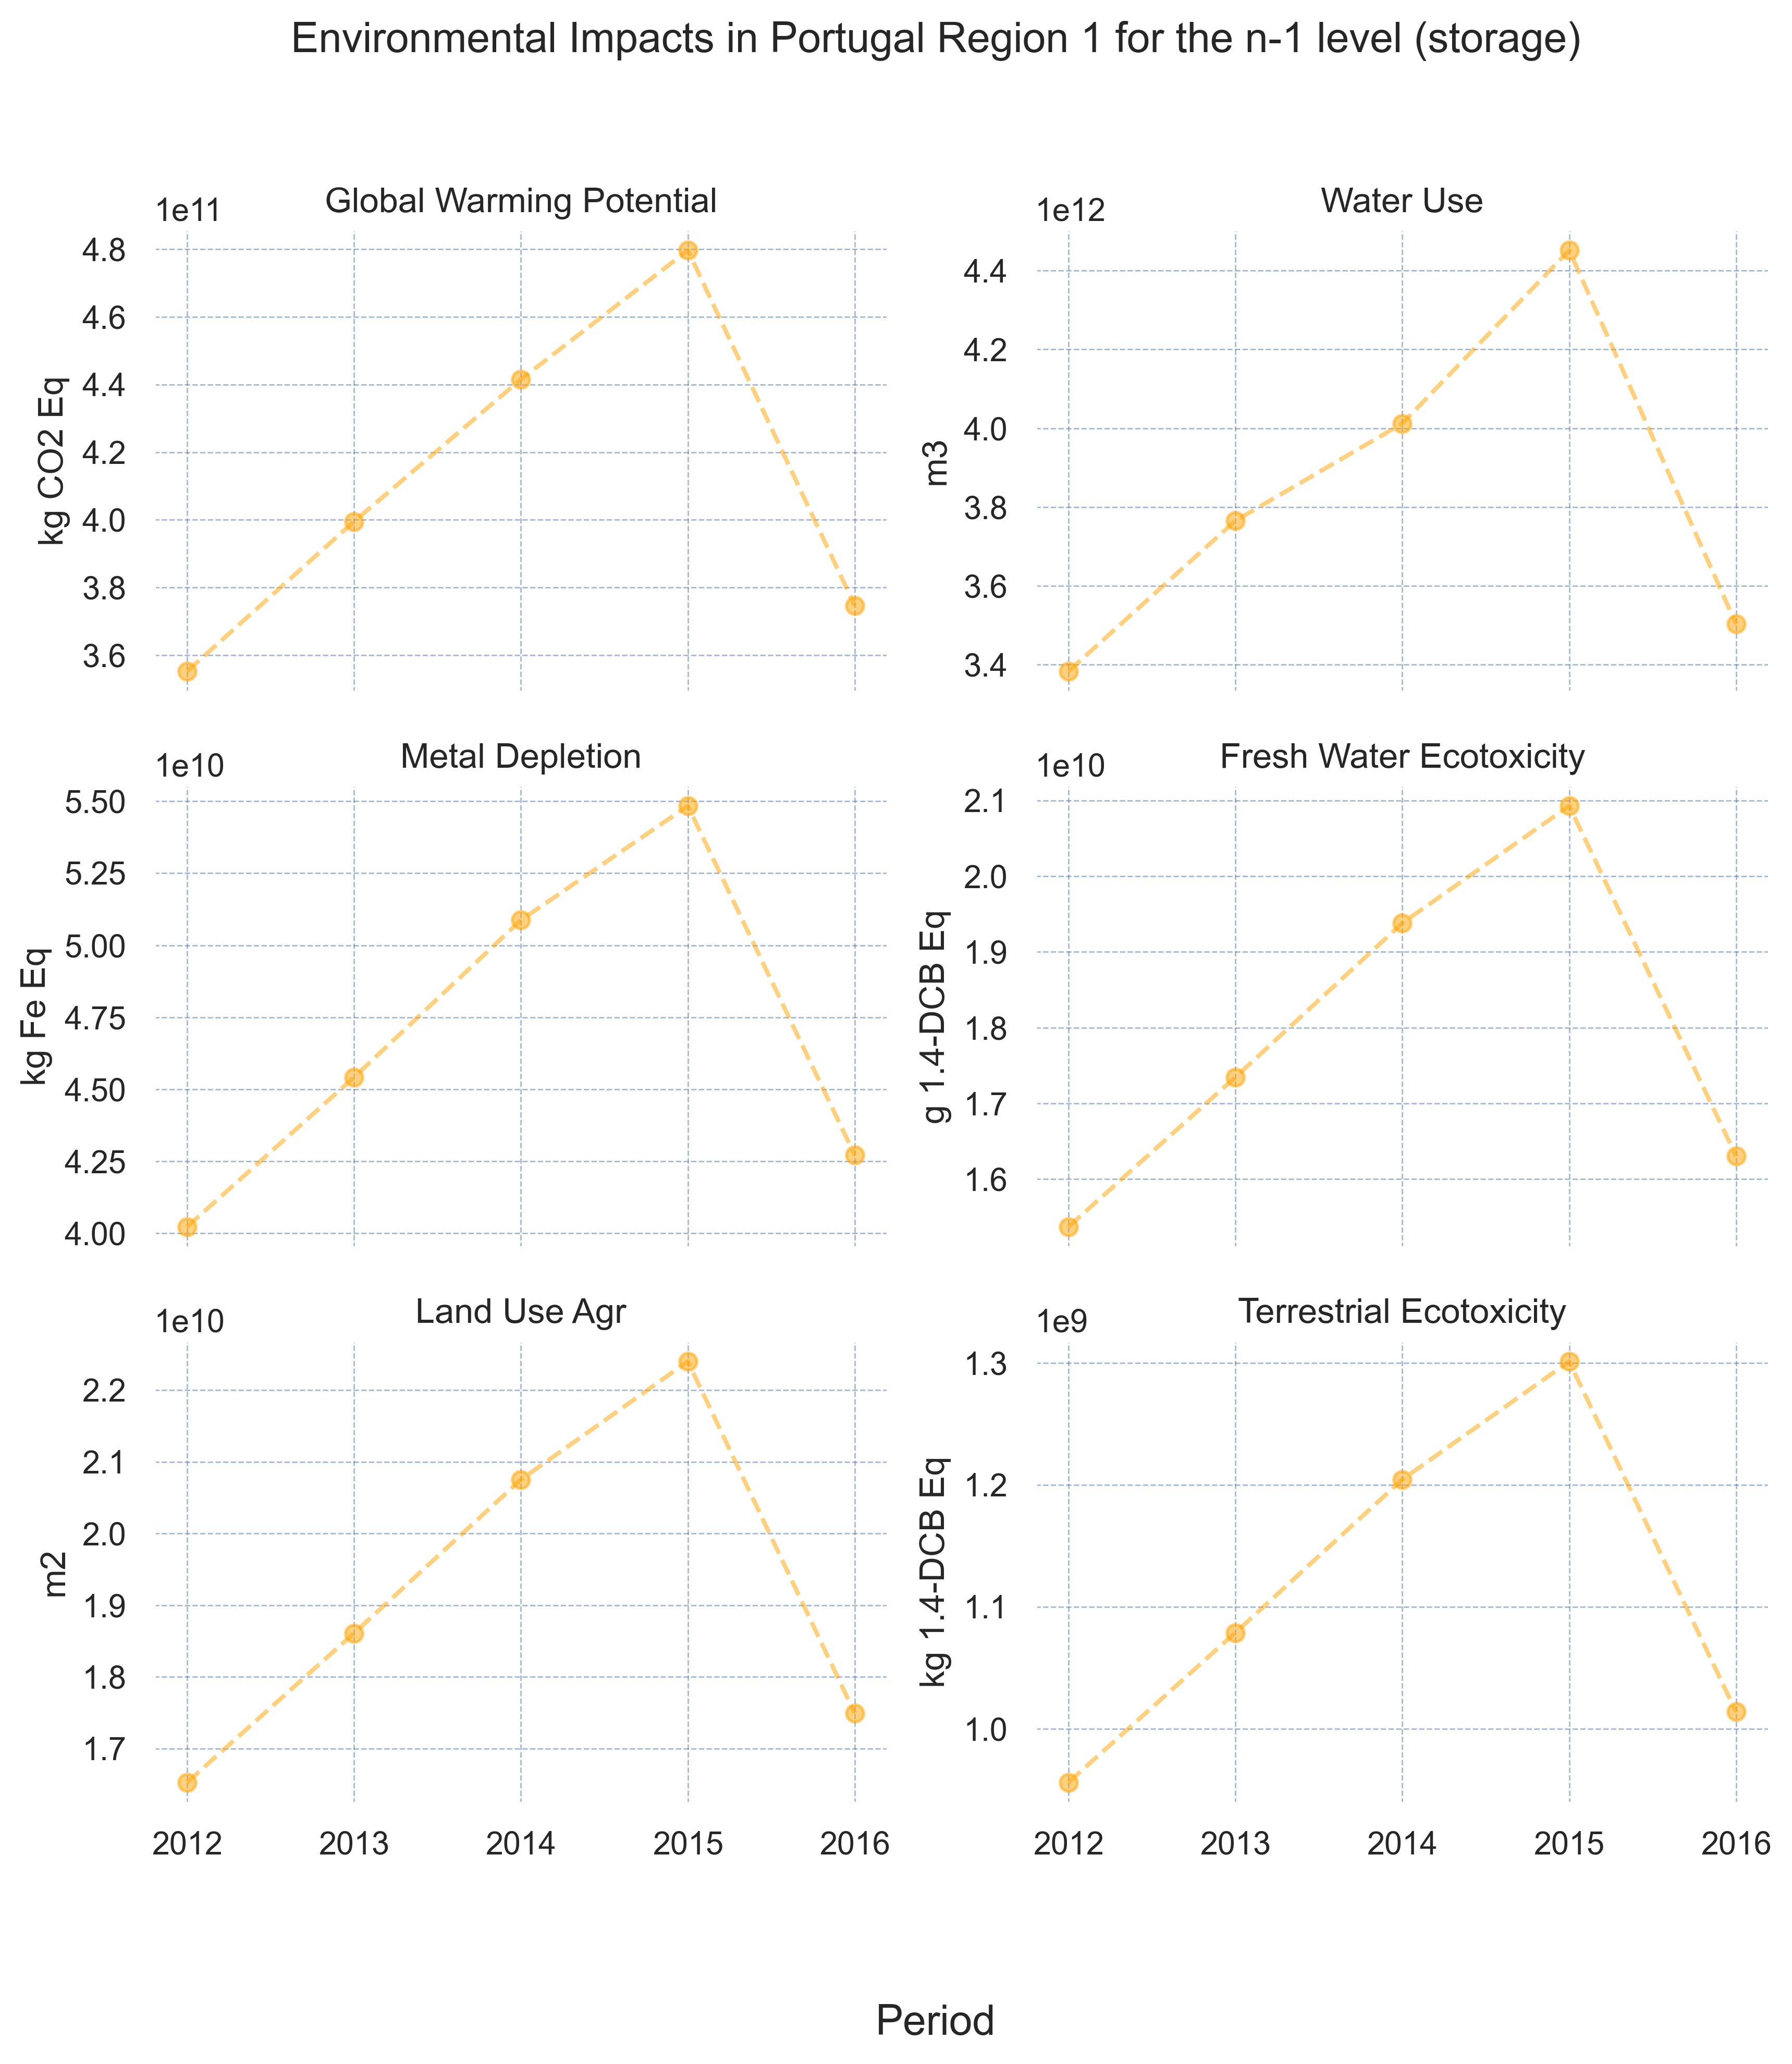

In [28]:
fig, axes=plt.subplots(3,2,figsize=(10,10),dpi=400, sharex=True)
fig.suptitle('Environmental Impacts in Portugal Region 1 for the n-1 level (storage)')


#x="2012 2013 2014 2015 2016".split()
#GWP
y1=df_GWP100.Value
x1=df_GWP100.Period
axes[0,0].plot(x1,y1,marker='o', color='orange',alpha=0.5,linestyle='--')
axes[0,0].set_title('Global Warming Potential')
axes[0,0].set_facecolor('white')
axes[0,0].grid(color='b', alpha=0.5, linestyle='dashed', linewidth=0.5)
axes[0,0].set_ylabel('kg CO2 Eq')
#Water Use
y2=df_WaterUse.Value
x2=df_WaterUse.Period
axes[0,1].plot(x2,y2,marker='o', color='orange',alpha=0.5,linestyle='--')
axes[0,1].set_title('Water Use')
axes[0,1].set_facecolor('white')
axes[0,1].grid(color='b', alpha=0.5, linestyle='dashed', linewidth=0.5)
axes[0,1].set_ylabel('m3')
#Metal Depletion
y3=df_MetalDepletion.Value
x3=df_MetalDepletion.Period
axes[1,0].plot(x3,y3,marker='o', color='orange',alpha=0.5,linestyle='--')
axes[1,0].set_title('Metal Depletion')
axes[1,0].set_facecolor('white')
axes[1,0].grid(color='b', alpha=0.5, linestyle='dashed', linewidth=0.5)
axes[1,0].set_ylabel('kg Fe Eq')
#Fresh Water Ecotoxicity
y4=df_FreshWaterEcotox.Value
x4=df_FreshWaterEcotox.Period
axes[1,1].plot(x4,y4,marker='o', color='orange',alpha=0.5,linestyle='--')
axes[1,1].set_title('Fresh Water Ecotoxicity')
axes[1,1].set_facecolor('white')
axes[1,1].grid(color='b', alpha=0.5, linestyle='dashed', linewidth=0.5)
axes[1,1].set_ylabel('g 1.4-DCB Eq')

#Land Use Agr
y5=df_LandUseAgr.Value
x5=df_LandUseAgr.Period
axes[2,0].plot(x5,y5,marker='o', color='orange',alpha=0.5,linestyle='--')
axes[2,0].set_title('Land Use Agr')
axes[2,0].set_facecolor('white')
axes[2,0].grid(color='b', alpha=0.5, linestyle='dashed', linewidth=0.5)
axes[2,0].set_ylabel('m2')

#Terrestrial Ecotox
y6=df_TerrestrialEcotox.Value
x6=df_TerrestrialEcotox.Period
axes[2,1].plot(x6,y6,marker='o', color='orange',alpha=0.5,linestyle='--')
axes[2,1].set_title('Terrestrial Ecotoxicity')
axes[2,1].set_facecolor('white')
axes[2,1].grid(color='b', alpha=0.5, linestyle='dashed', linewidth=0.5)
axes[2,1].set_ylabel('kg 1.4-DCB Eq')


fig.supxlabel('Period')


plt.savefig(r'C:\Users\altz7\Downloads\plot_lines_region1_stor.png', dpli=400)

# Explore how can we combine plots of multiple dendrograms

In [3]:
df

Scenario    System  Period     Scope  \
0       __2013  PRT_14_1    2013  Internal   
1       __2013  PRT_14_1    2013  Internal   
2       __2013  PRT_14_1    2013  Internal   
3       __2013  PRT_14_1    2013  Internal   
4       __2013  PRT_14_1    2013  Internal   
...        ...       ...     ...       ...   
15365   __2016   PRT_9_1    2016     Total   
15366   __2016   PRT_9_1    2016     Total   
15367   __2016   PRT_9_1    2016     Total   
15368   __2016   PRT_9_1    2016     Total   
15369   __2016   PRT_9_1    2016     Total   

                                               Processor         Indicator  \
0                                           energysystem  FreshWaterEcotox   
1                                energysystem.generation  FreshWaterEcotox   
2         energysystem.generation.electricity_generation  FreshWaterEcotox   
3      energysystem.generation.electricity_generation...  FreshWaterEcotox   
4      energysystem.generation.electricity_generation...  FreshWaterEcotox   
...                                                  ...               ...   
15365  energysystem.generation.electricity_generation...           LandUse   
15366  energysystem.generation.electricity_generation...           LandUse   
15367  energysystem.generation.electricity_generation...           LandUse   
15368  energysystem.generation.electricity_generation...           LandUse   
15369                                        environment           LandUse   

              Value  Unit  
0      1.683051e+05   NaN  
1      1.683051e+05   NaN  
2      1.683051e+05   NaN  
3      2.506382e+04   NaN  
4      1.432413e+05   NaN  
...             ...   ...  
15365  5.046795e+06   NaN  
15366  1.873607e+06   NaN  
15367  1.288277e+09   NaN  
15368  9.453450e+07   NaN  
15369  1.289072e+09   NaN  

[15370 rows x 8 columns]

In [19]:
#Create a dendrogram level column
df = df.loc[~df["Processor"].str.contains("environment")]
df["Dendrogram level"] = df["Processor"].str.count("\.")
#select the region 1 to make it more clear
df=df.loc[df['System']=='PRT_1']
df.drop(df[df['Scope']=='Internal'].index, inplace=True)
df['Indicator'].unique()
listindicators=df['Indicator'].unique()
listindicator=listindicators.tolist()
listindicator
label=df['Unit'].unique().tolist()
for i in df.columns:
    print(df[i].unique())
    nom_dataframes=[]
    listindicators=df['Indicator'].unique()
    listindicator=listindicators.tolist()
    zipped=zip(listindicators,label)
for i,g in df.groupby('Indicator'):
    globals()['df_'+str(i)]=g
    nom_dataframes.append(i)
#Work on the basic levels to make it easier    
#df_GWP100.drop(df_GWP100[df_GWP100['Dendrogram level']==3].index, inplace=True)
#df_GWP100=df_GWP100.loc[~df_GWP100['Processor'].str.contains('generation')] #elimina el que conté aixo


['__2015' '__2012' '__2016' '__2013' '__2014']
['PRT_1']
[2015 2012 2016 2013 2014]
['Total']
['energysystem' 'energysystem.generation'
 'energysystem.generation.electricity_generation'
 'energysystem.generation.electricity_generation.ccgt_electricity'
 'energysystem.generation.electricity_generation.chp_biofuel_extraction_electricity'
 'energysystem.generation.electricity_generation.hydro_reservoir_electricity'
 'energysystem.generation.electricity_generation.hydro_run_of_river_electricity'
 'energysystem.generation.thermal_generation'
 'energysystem.generation.thermal_generation.biofuel_supply_biofuel'
 'energysystem.generation.thermal_generation.biofuel_to_diesel_diesel'
 'energysystem.generation.thermal_generation.biofuel_to_methane_methane'
 'energysystem.generation.thermal_generation.biofuel_to_methanol_methanol'
 'energysystem.generation.thermal_generation.chp_biofuel_extraction_heat'
 'energysystem.generation.thermal_generation.hp_heat'
 'energysystem.storage' 'energysystem.sto

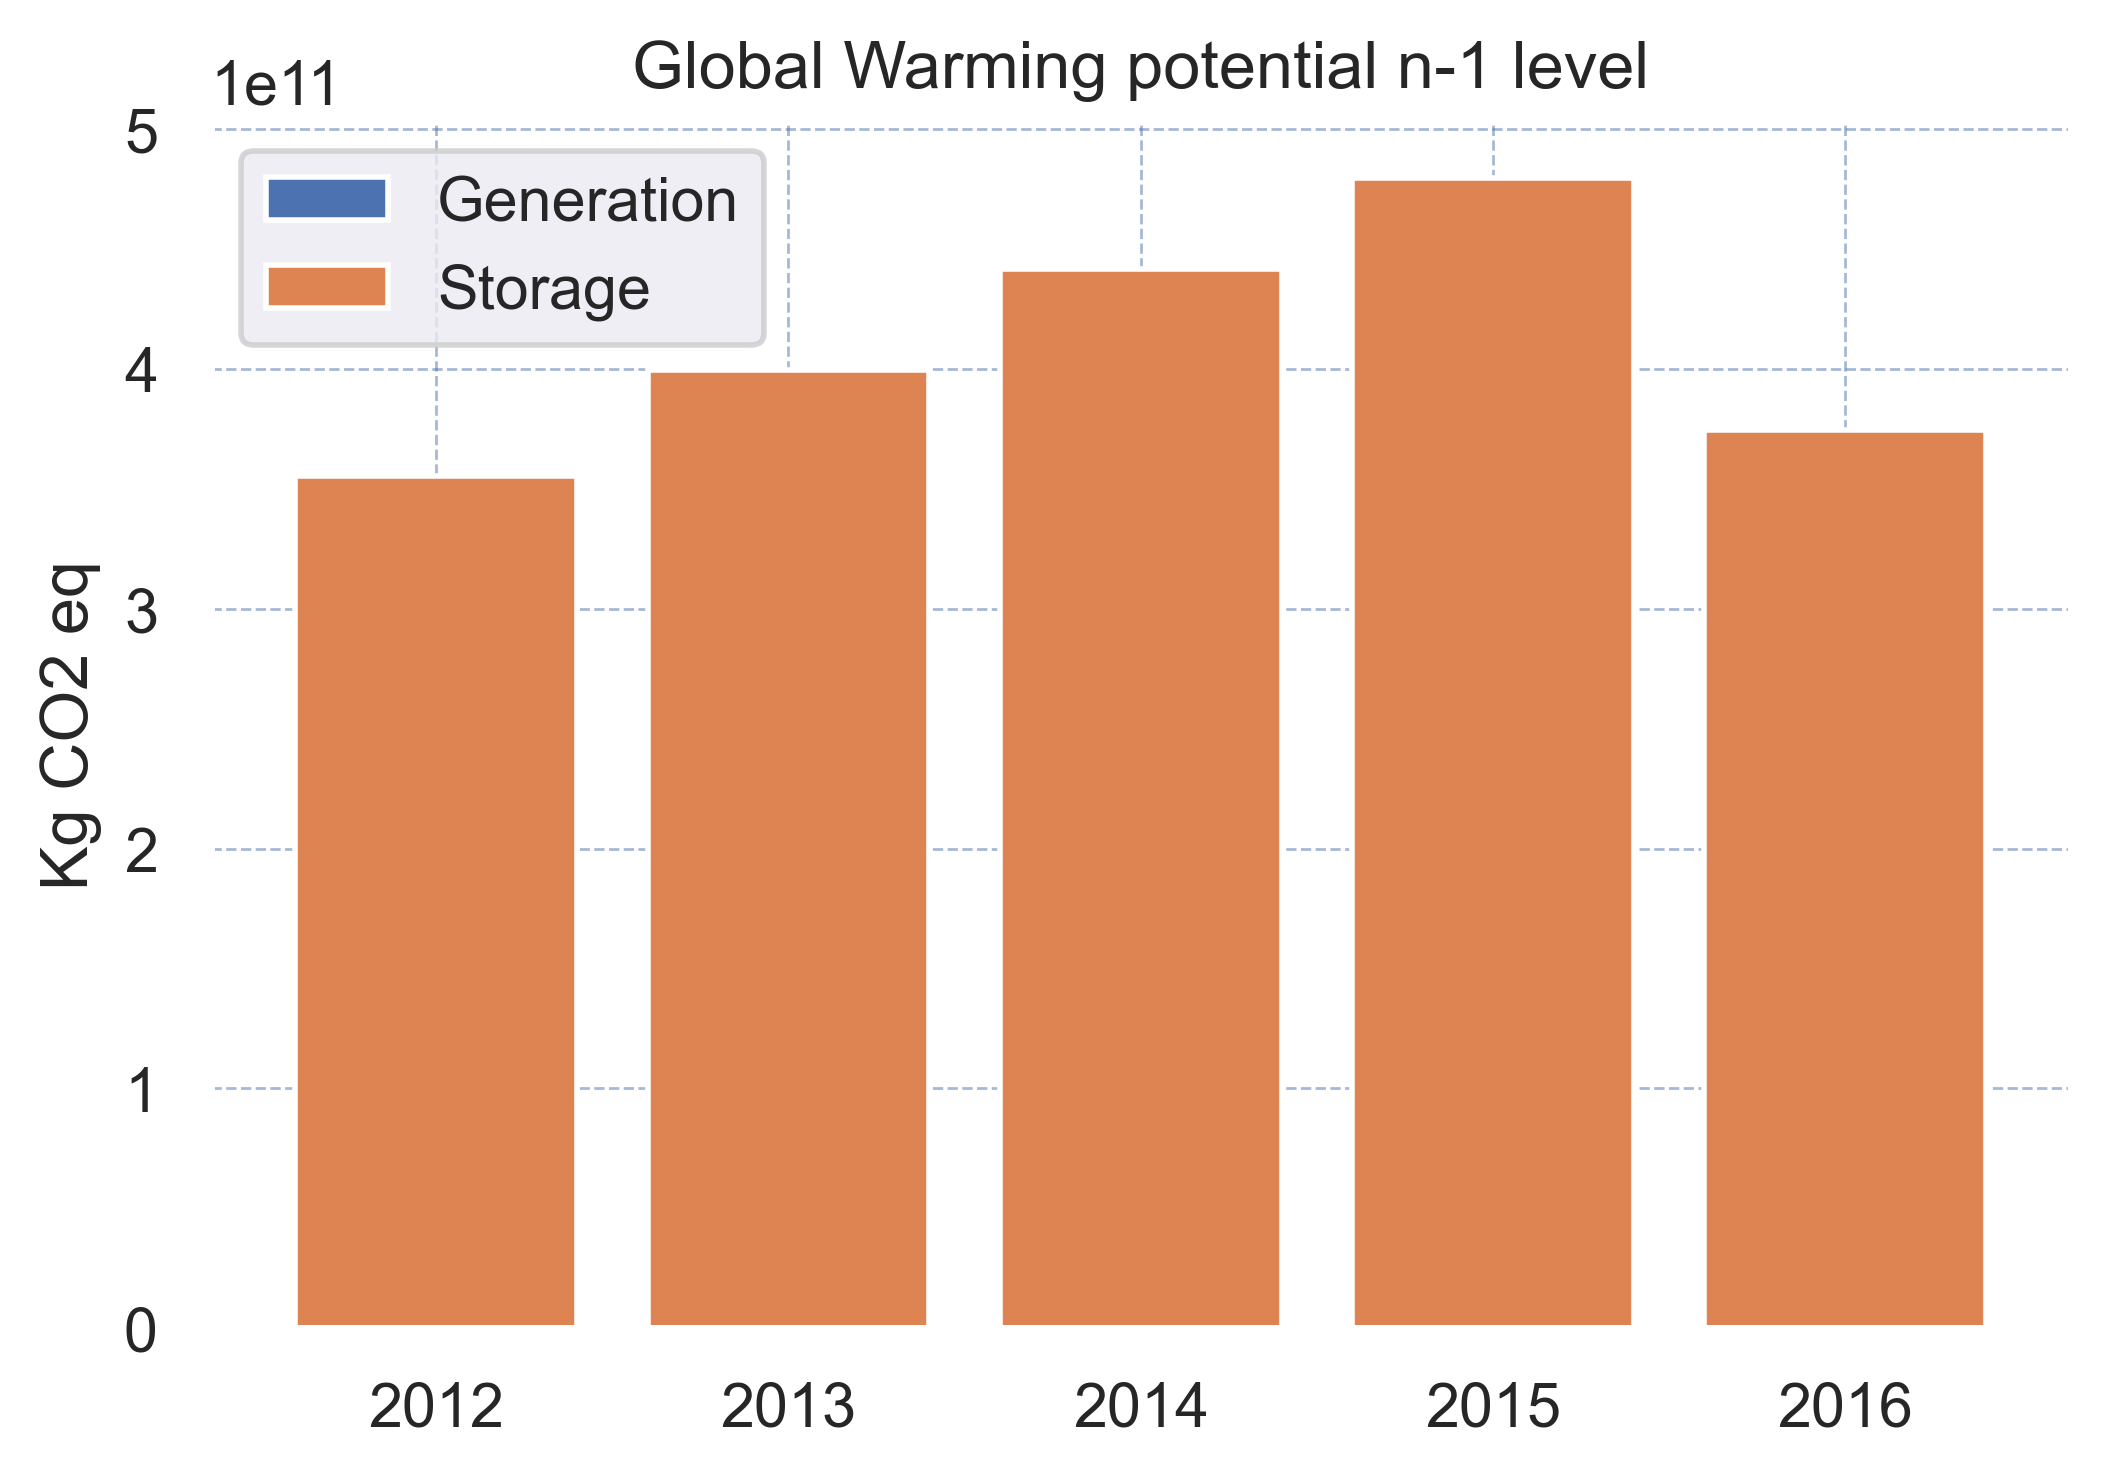

<AxesSubplot:xlabel='Period', ylabel='Value'>

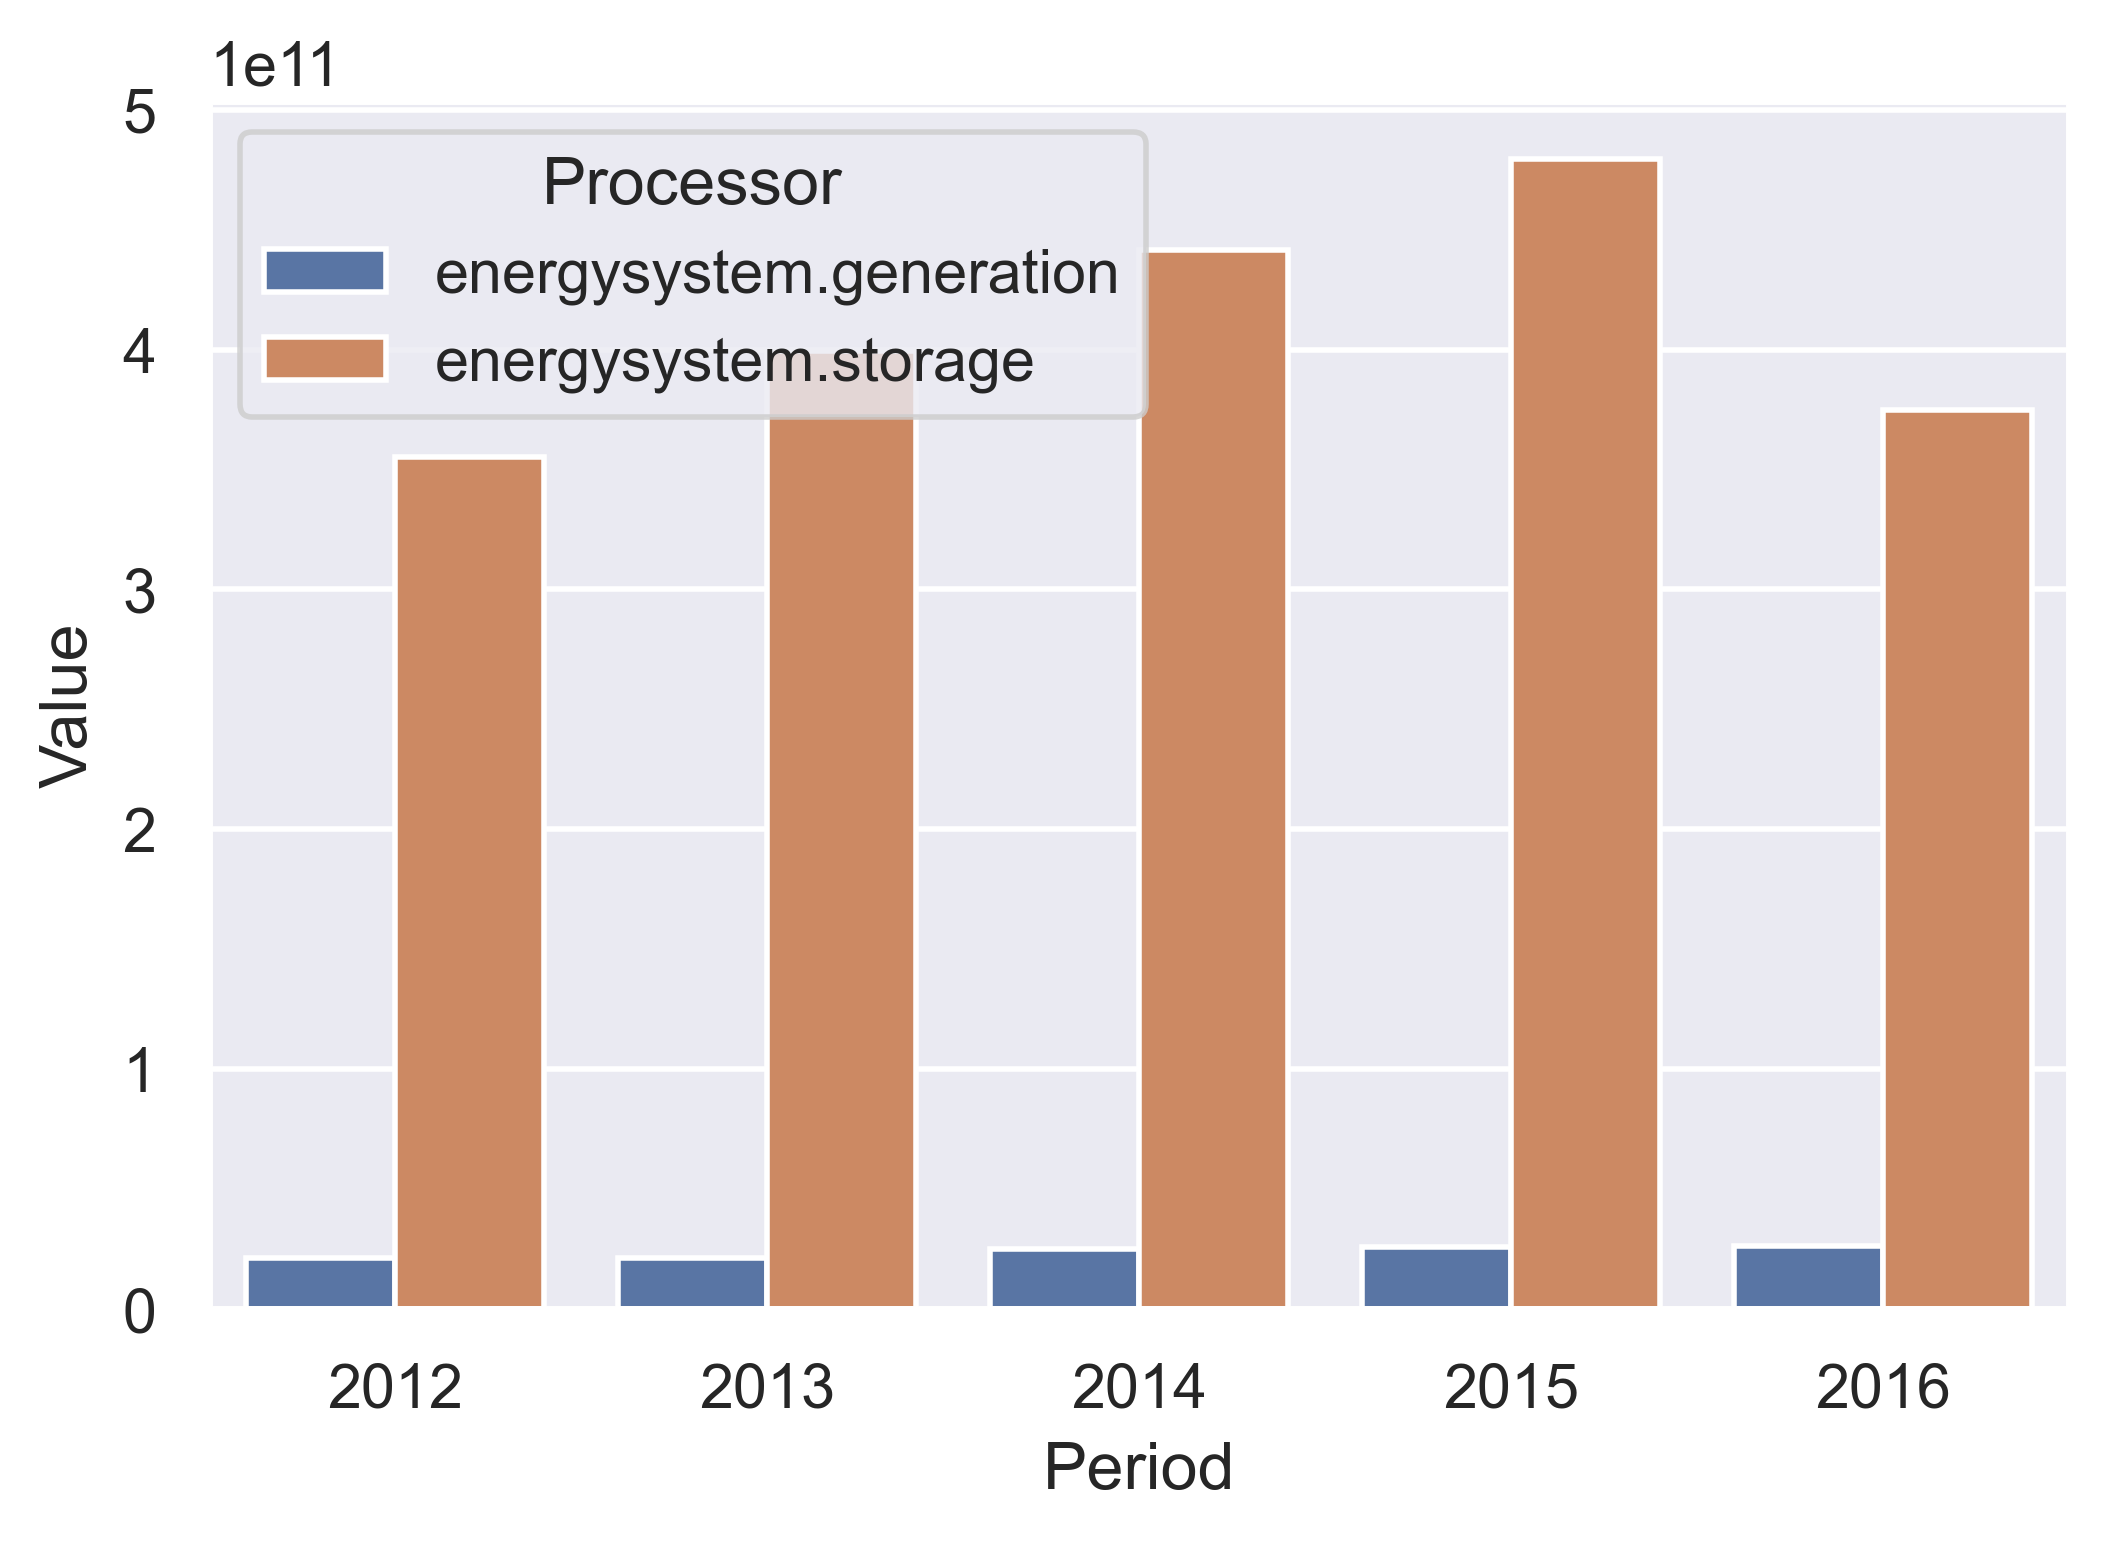

In [572]:
#1 figura  DO NOT RUN THIS CELL!!!!!!
df_GWP100=df_GWP100[df_GWP100['Dendrogram level']<2]
y1=df_GWP100[df_GWP100['Processor']=='energysystem.generation']
y2=df_GWP100[df_GWP100['Processor']=='energysystem.storage']

fig, ax = plt.subplots()
ax.bar(y1.Period,y1.Value,label='Generation')
ax.bar(y2.Period,y2.Value,label='Storage')
ax.set_ylabel('Kg CO2 eq')
ax.set_title('Global Warming potential n-1 level')
ax.set_facecolor('white')
ax.legend()
ax.grid(True)
ax.grid(color='b', alpha=0.5, linestyle='dashed', linewidth=0.5)
plt.show()

#generate the same using seaborn
df_GWP100=df_GWP100[df_GWP100['Dendrogram level']==1]
sns.barplot(x='Period',y='Value',data=df_GWP100,hue='Processor')

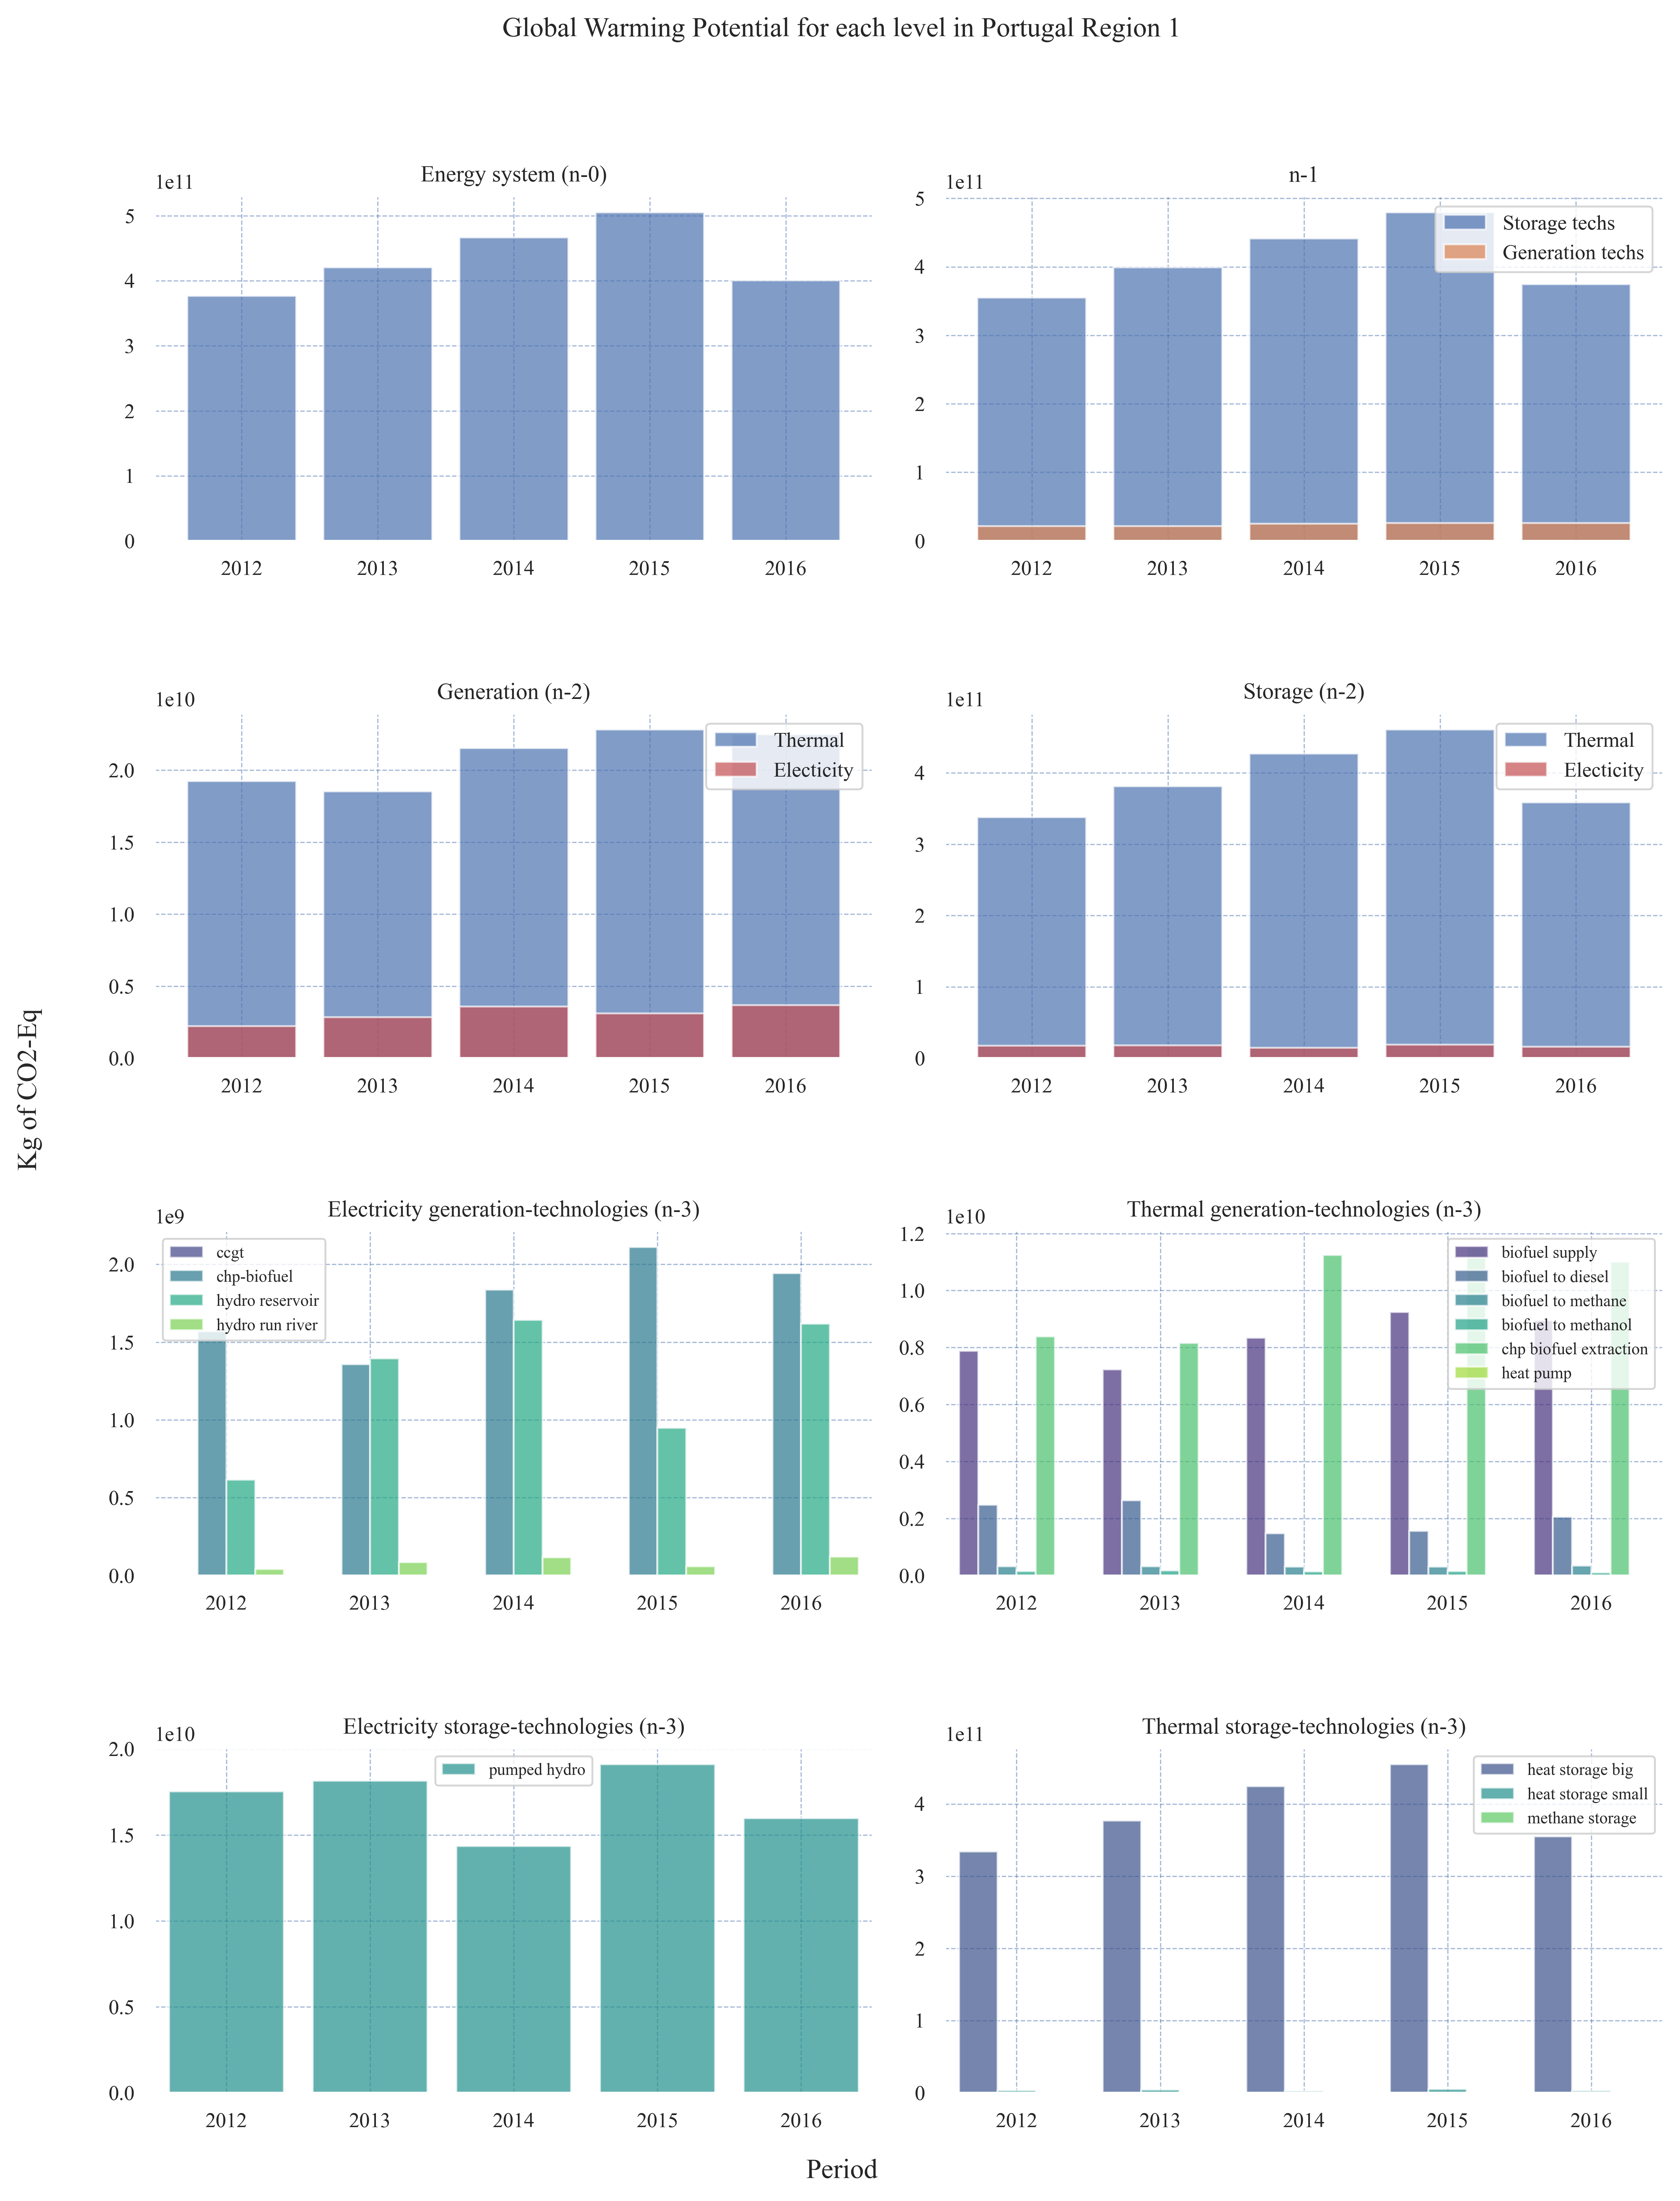

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
#sns.set_style("ticks")
sns.set_context("paper")
sns.set_style({'axes.facecolor':'white', 'grid.color': '.8', 'font.family':'Times New Roman'})
#subplot for Global Warming Potential for each level
fig, axes=plt.subplots(4,2,figsize=(10,13),dpi=500)
fig.suptitle('Global Warming Potential for each level in Portugal Region 1')
fig.supxlabel('Period')
fig.supylabel('Kg of CO2-Eq')
fig.tight_layout()

#Global Warming Potential
#level 0
df_GWP100_0=df_GWP100[df_GWP100['Dendrogram level']==0]
axes[0,0].bar(df_GWP100_0['Period'],df_GWP100_0['Value'], alpha=0.7)
axes[0,0].set_title('Energy system (n-0)')
axes[0,0].grid(True)
axes[0,0].grid(color='b', alpha=0.5, linestyle='dashed', linewidth=0.5)
axes[0,0].set_facecolor('white')
#level 1 (define  y1 - y2 for each categroy of this level to make it stacked)
df_GWP100_1=df_GWP100[df_GWP100['Dendrogram level']==1]
y1=df_GWP100_1[df_GWP100_1['Processor']=='energysystem.generation']
y2=df_GWP100_1[df_GWP100_1['Processor']=='energysystem.storage']
axes[0,1].bar(y2.Period,y2.Value,label='Storage techs',alpha=0.7)
axes[0,1].bar(y1.Period,y1.Value,label='Generation techs',alpha=0.7)
axes[0,1].set_title('n-1')
axes[0,1].legend()
axes[0,1].grid(color='b', alpha=0.5, linestyle='dashed', linewidth=0.5)
axes[0,1].set_facecolor('white')

#generation divided in thermal and electricity
df_GWP100_2=df_GWP100[df_GWP100['Dendrogram level']==2]
y3=df_GWP100_2[df_GWP100_2['Processor']=='energysystem.generation.thermal_generation']
y4=df_GWP100_2[df_GWP100_2['Processor']=='energysystem.generation.electricity_generation']
axes[1,0].bar(y3.Period,y3.Value,label='Thermal', color='b',alpha=0.7)
axes[1,0].bar(y4.Period,y4.Value,label='Electicity', color='r',alpha=0.7)
axes[1,0].set_title('Generation (n-2)' )
axes[1,0].legend()
axes[1,0].grid(color='b', alpha=0.5, linestyle='dashed', linewidth=0.5)
axes[1,0].set_facecolor('white')
#storage, divided in thermal and electricity
df_GWP100_2=df_GWP100[df_GWP100['Dendrogram level']==2]
y6=df_GWP100_2[df_GWP100_2['Processor']=='energysystem.storage.electricity_storage']
y5=df_GWP100_2[df_GWP100_2['Processor']=='energysystem.storage.thermal_storage']
axes[1,1].bar(y5.Period,y5.Value,label='Thermal',alpha=0.7)
axes[1,1].bar(y6.Period,y6.Value,label='Electicity',color='r',alpha=0.7)


axes[1,1].set_title('Storage (n-2)')
axes[1,1].legend()
axes[1,1].grid(color='b', alpha=0.5, linestyle='dashed', linewidth=0.5)
axes[1,1].set_facecolor('white')
#classify for technologies, lvl3

# PLOT FOR ELECTRICITY GENERATION TECHNOLOGIES
df_GWP100_3=df_GWP100[df_GWP100['Dendrogram level']==3]
df_GWP100_3=df_GWP100_3.loc[~df_GWP100['Processor'].str.contains('storage')]
#first work with the electricity generation
df_GWP100_3=df_GWP100_3.loc[~df_GWP100_3['Processor'].str.contains('thermal')]
# Per evitar problemes amb la llegenda, retoquem una mica els valors dels processos. La manera es una mica cutre (...)
df_GWP100_3['Processor'].mask(df_GWP100_3['Processor']=='energysystem.generation.electricity_generation.ccgt_electricity','ccgt',inplace=True)
df_GWP100_3['Processor'].mask(df_GWP100_3['Processor']=='energysystem.generation.electricity_generation.hydro_reservoir_electricity','hydro reservoir',inplace=True)
df_GWP100_3['Processor'].mask(df_GWP100_3['Processor']=='energysystem.generation.electricity_generation.chp_biofuel_extraction_electricity','chp-biofuel',inplace=True)
df_GWP100_3['Processor'].mask(df_GWP100_3['Processor']=='energysystem.generation.electricity_generation.hydro_run_of_river_electricity','hydro run river',inplace=True)
#use seaborn 
sns.barplot(ax=axes[2,0],x='Period',y='Value',data=df_GWP100_3,palette='viridis',saturation=1, hue='Processor',alpha=0.7).set(xlabel='',ylabel='')
axes[2,0].legend(fontsize=7)
axes[2,0].set_title('Electricity generation-technologies (n-3)')
axes[2,0].grid(color='b', alpha=0.5, linestyle='dashed', linewidth=0.5)
axes[2,0].set_facecolor('white')
#PLOT FOR Thermal generation technologies
df_GWP100_4=df_GWP100[df_GWP100['Dendrogram level']==3]
df_GWP100_4=df_GWP100_4.loc[~df_GWP100['Processor'].str.contains('storage')]
#
df_GWP100_4=df_GWP100_4.loc[~df_GWP100_4['Processor'].str.contains('electricity')]
# Per evitar problemes amb la llegenda, retoquem una mica els valors dels processos. La manera es una mica cutre (...)
df_GWP100_4['Processor'].mask(df_GWP100_4['Processor']=='energysystem.generation.thermal_generation.biofuel_supply_biofuel','biofuel supply',inplace=True)
df_GWP100_4['Processor'].mask(df_GWP100_4['Processor']=='energysystem.generation.thermal_generation.biofuel_to_diesel_diesel','biofuel to diesel',inplace=True)
df_GWP100_4['Processor'].mask(df_GWP100_4['Processor']=='energysystem.generation.thermal_generation.biofuel_to_methane_methane','biofuel to methane',inplace=True)
df_GWP100_4['Processor'].mask(df_GWP100_4['Processor']=='energysystem.generation.thermal_generation.biofuel_to_methanol_methanol','biofuel to methanol', inplace=True)
df_GWP100_4['Processor'].mask(df_GWP100_4['Processor']=='energysystem.generation.thermal_generation.chp_biofuel_extraction_heat','chp biofuel extraction',inplace=True)
df_GWP100_4['Processor'].mask(df_GWP100_4['Processor']=='energysystem.generation.thermal_generation.hp_heat','heat pump',inplace=True)
sns.barplot(ax=axes[2,1],x='Period',y='Value',data=df_GWP100_4,palette='viridis',saturation=1, hue='Processor',alpha=0.7).set(xlabel='',ylabel='')
axes[2,1].legend(fontsize=7)
axes[2,1].set_title('Thermal generation-technologies (n-3)')
axes[2,1].grid(color='b', alpha=0.5, linestyle='dashed', linewidth=0.5)
axes[2,1].set_facecolor('white')

#electricity storage technologies
df_GWP100_5=df_GWP100[df_GWP100['Dendrogram level']==3]
df_GWP100_5=df_GWP100_5.loc[~df_GWP100['Processor'].str.contains('generation')]
df_GWP100_5=df_GWP100_5.loc[~df_GWP100_5['Processor'].str.contains('thermal')]
df_GWP100_5['Processor'].mask(df_GWP100_5['Processor']=='energysystem.storage.electricity_storage.pumped_hydro_electricity','pumped hydro',inplace=True)
sns.barplot(ax=axes[3,0],x='Period',y='Value',data=df_GWP100_5,palette='viridis',saturation=1, hue='Processor',alpha=0.7).set(xlabel='',ylabel='')
axes[3,0].legend(fontsize=7)
axes[3,0].set_title('Electricity storage-technologies (n-3)')
axes[3,0].grid(color='b', alpha=0.5, linestyle='dashed', linewidth=0.5)
axes[3,0].set_facecolor('white')

#Thermal storage technologies
df_GWP100_6=df_GWP100[df_GWP100['Dendrogram level']==3]
df_GWP100_6=df_GWP100_6.loc[~df_GWP100['Processor'].str.contains('generation')]
df_GWP100_6=df_GWP100_6.loc[~df_GWP100_6['Processor'].str.contains('electricity')]
df_GWP100_6['Processor'].mask(df_GWP100_6['Processor']=='energysystem.storage.thermal_storage.heat_storage_big_heat','heat storage big',inplace=True)
df_GWP100_6['Processor'].mask(df_GWP100_6['Processor']=='energysystem.storage.thermal_storage.heat_storage_small_heat','heat storage small',inplace=True)
df_GWP100_6['Processor'].mask(df_GWP100_6['Processor']=='energysystem.storage.thermal_storage.methane_storage_methane','methane storage',inplace=True)
sns.barplot(ax=axes[3,1],x='Period',y='Value',data=df_GWP100_6,palette='viridis',saturation=1, hue='Processor',alpha=0.7).set(xlabel='',ylabel='')
axes[3,1].legend(fontsize=7)
axes[3,1].set_title('Thermal storage-technologies (n-3)')
axes[3,1].grid(color='b', alpha=0.5, linestyle='dashed', linewidth=0.5)
axes[3,1].set_facecolor('white')
plt.subplots_adjust(left=0.1, 
                    top=0.9, 
                    wspace=0.1, 
                    hspace=0.5)


plt.savefig(r'C:\Users\altz7\Downloads\levels_GWP.png', dpi=500)


Repeat the process for other indicators

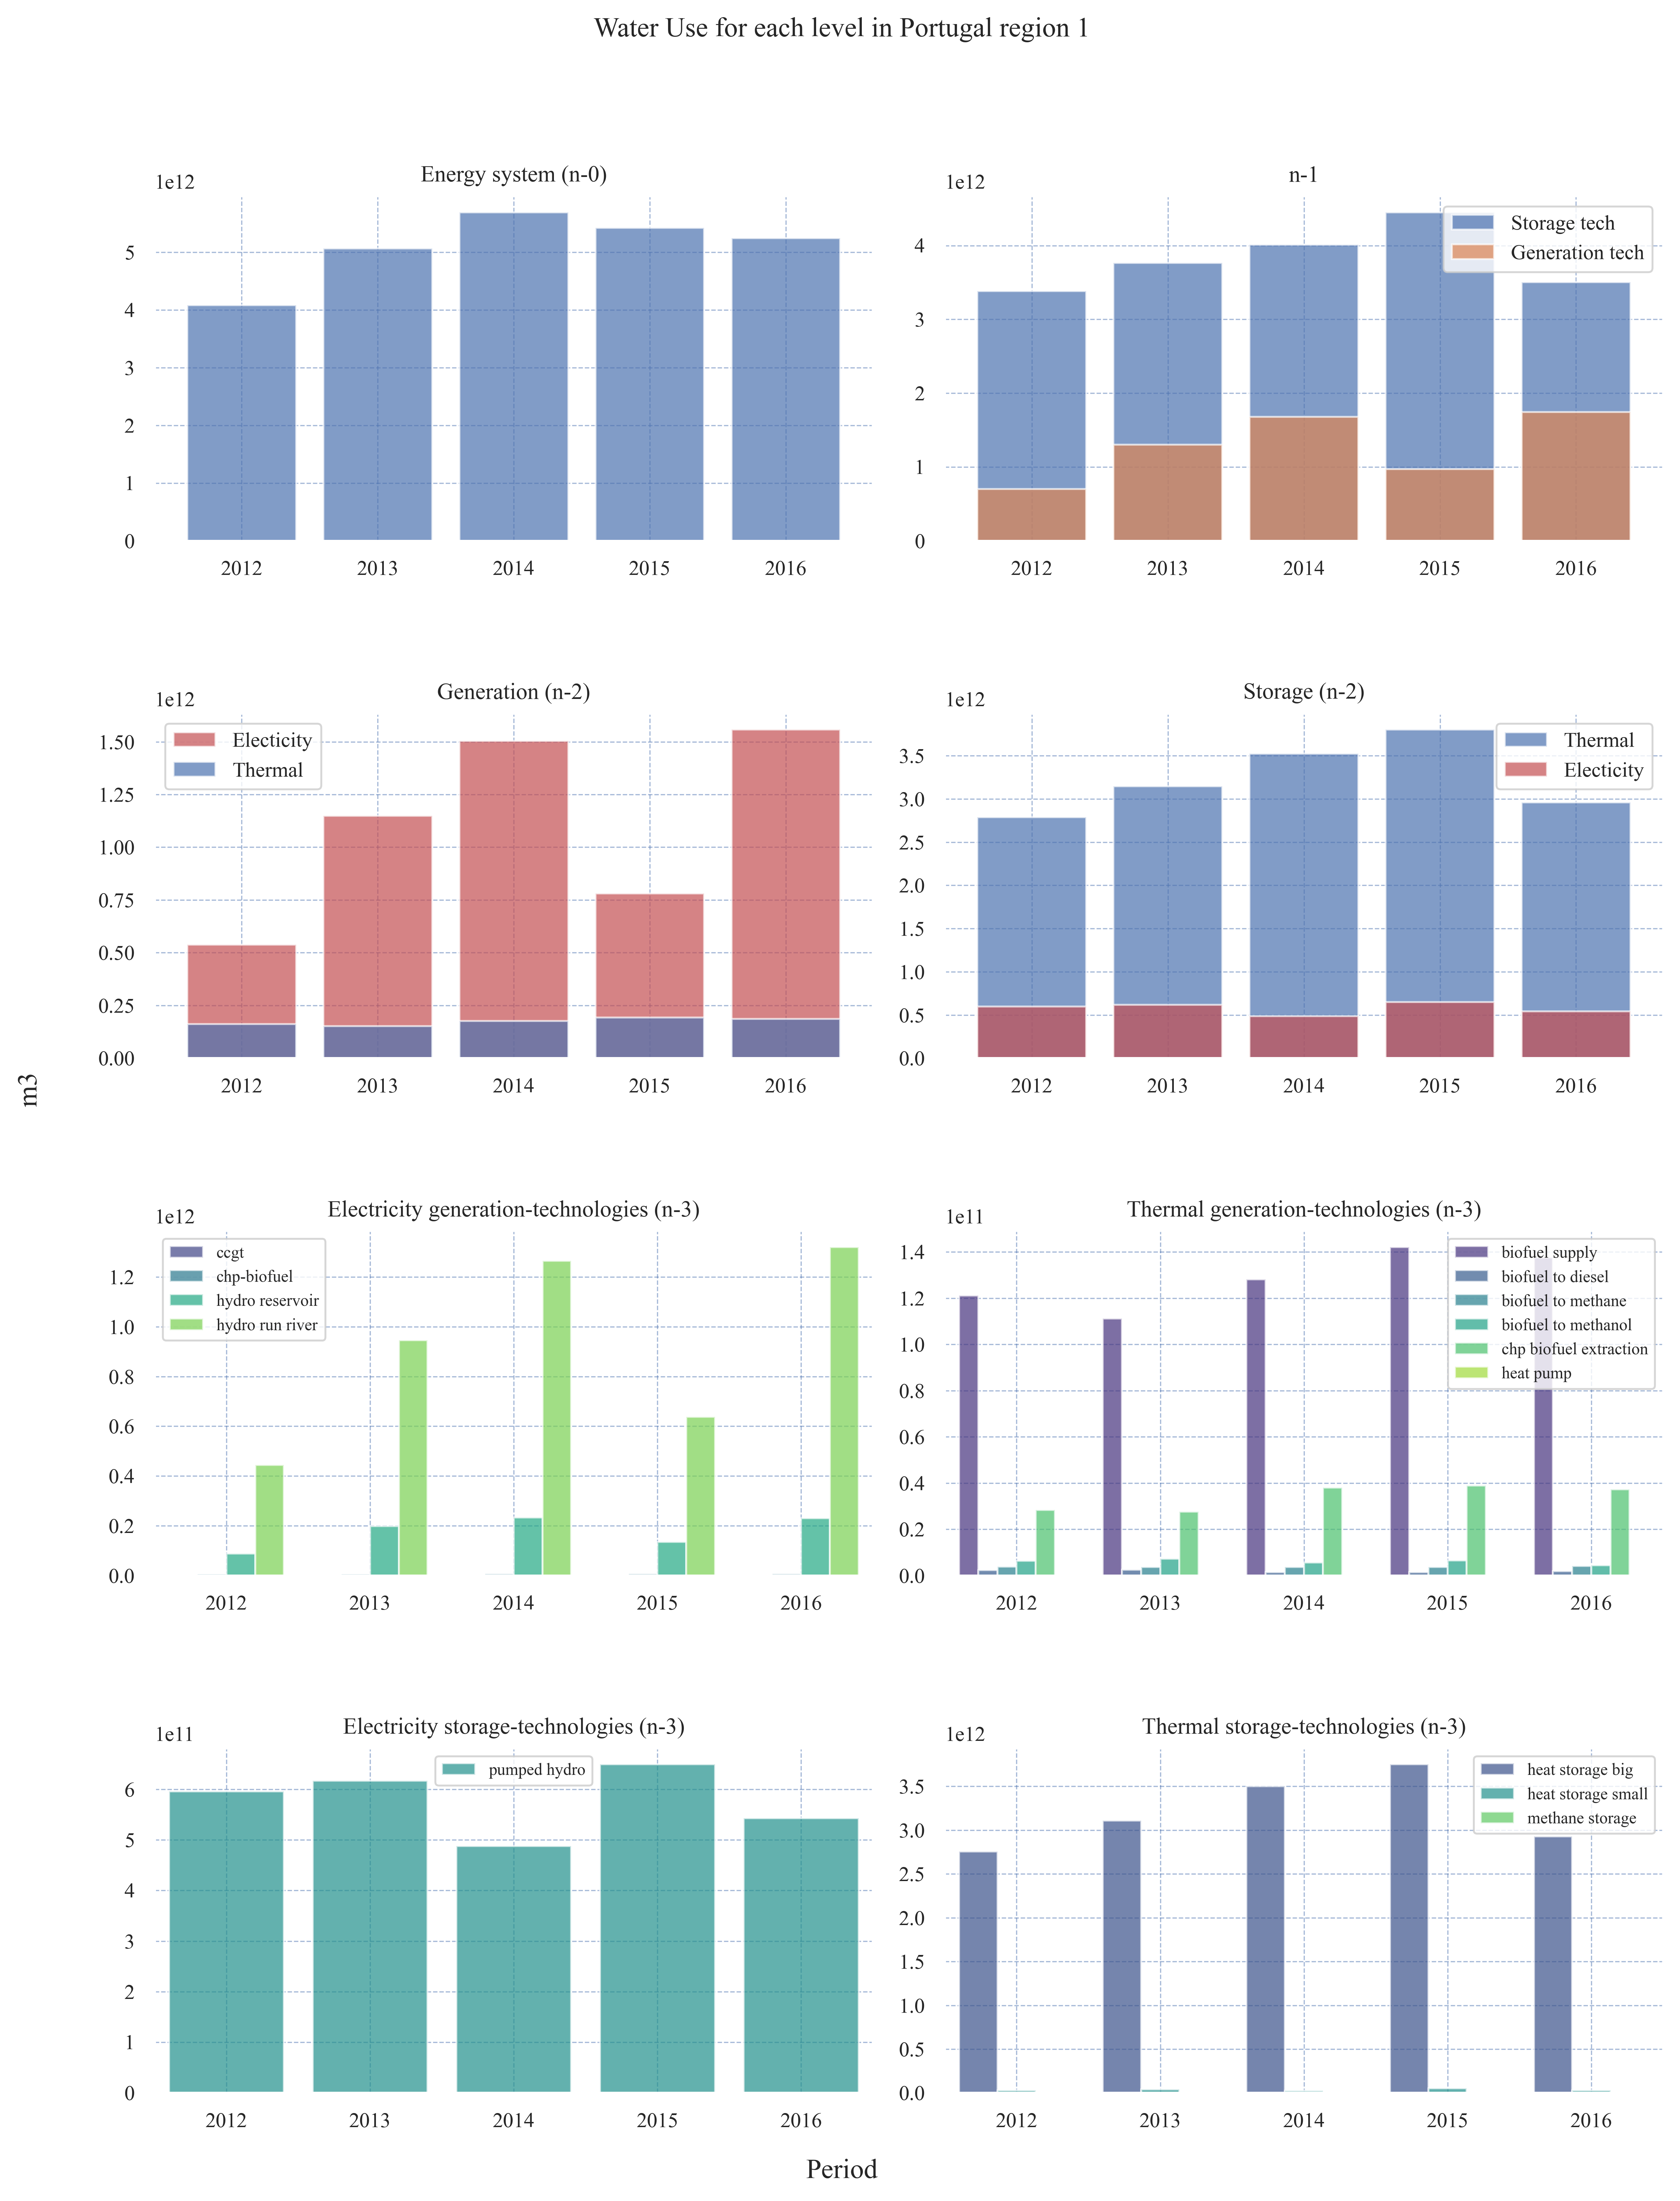

In [29]:
#Water use
#subplot for Global Warming Potential for each level
fig, axes=plt.subplots(4,2,figsize=(10,13),dpi=500)

sns.set()
sns.set_context("paper")
sns.set_style({'axes.facecolor':'white', 'grid.color': '.8', 'font.family':'Times New Roman'})
fig.suptitle('Water Use for each level in Portugal region 1')
fig.supxlabel('Period')
fig.supylabel('m3')
fig.tight_layout()

#level 0
df_WaterUse_0=df_WaterUse[df_WaterUse['Dendrogram level']==0]
axes[0,0].bar(df_WaterUse_0['Period'],df_WaterUse_0['Value'], alpha=0.7)
axes[0,0].set_title('Energy system (n-0)')
axes[0,0].grid(color='b', alpha=0.5, linestyle='dashed', linewidth=0.5)
axes[0,0].set_facecolor('white')
#lvl 1, generation vs storage
df_WaterUse_1=df_WaterUse[df_WaterUse['Dendrogram level']==1]
y1=df_WaterUse_1[df_WaterUse_1['Processor']=='energysystem.generation']
y2=df_WaterUse_1[df_WaterUse_1['Processor']=='energysystem.storage']
axes[0,1].bar(y2.Period,y2.Value,label='Storage tech',alpha=0.7)
axes[0,1].bar(y1.Period,y1.Value,label='Generation tech',alpha=0.7)
axes[0,1].set_title('n-1')
axes[0,1].legend()
axes[0,1].grid(color='b', alpha=0.5, linestyle='dashed', linewidth=0.5)
axes[0,1].set_facecolor('white')
#lvl2 thermal vs electrical
df_WaterUse_2=df_WaterUse[df_WaterUse['Dendrogram level']==2]
y3=df_WaterUse_2[df_WaterUse_2['Processor']=='energysystem.generation.thermal_generation']
y4=df_WaterUse_2[df_WaterUse_2['Processor']=='energysystem.generation.electricity_generation']
axes[1,0].bar(y4.Period,y4.Value,label='Electicity', color='r',alpha=0.7)
axes[1,0].bar(y3.Period,y3.Value,label='Thermal', color='b',alpha=0.7)
axes[1,0].set_title('Generation (n-2)' )
axes[1,0].legend()
axes[1,0].grid(color='b', alpha=0.5, linestyle='dashed', linewidth=0.5)
axes[1,0].set_facecolor('white')
#storage, divided in thermal and electricity
df_WaterUse_2=df_WaterUse[df_WaterUse['Dendrogram level']==2]
#################################################################
y5=df_WaterUse_2[df_WaterUse_2['Processor']=='energysystem.storage.thermal_storage']
y6=df_WaterUse_2[df_WaterUse_2['Processor']=='energysystem.storage.electricity_storage']
axes[1,1].bar(y5.Period,y5.Value,label='Thermal', color='b',alpha=0.7)
axes[1,1].bar(y6.Period,y6.Value,label='Electicity',color='r',alpha=0.7)
axes[1,1].set_title('Storage (n-2)')
axes[1,1].legend()
axes[1,1].grid(color='b', alpha=0.5, linestyle='dashed', linewidth=0.5)
axes[1,1].set_facecolor('white')


# PLOT FOR ELECTRICITY GENERATION TECHNOLOGIES
df_WaterUse_3=df_WaterUse[df_WaterUse['Dendrogram level']==3]
df_WaterUse_3=df_WaterUse_3.loc[~df_WaterUse_3['Processor'].str.contains('storage')]
#first work with the electricity generation
df_WaterUse_3=df_WaterUse_3.loc[~df_WaterUse_3['Processor'].str.contains('thermal')]
# Per evitar problemes amb la llegenda, retoquem una mica els valors dels processos. La manera es una mica cutre (...)
df_WaterUse_3['Processor'].mask(df_WaterUse_3['Processor']=='energysystem.generation.electricity_generation.ccgt_electricity','ccgt',inplace=True)
df_WaterUse_3['Processor'].mask(df_WaterUse_3['Processor']=='energysystem.generation.electricity_generation.hydro_reservoir_electricity','hydro reservoir',inplace=True)
df_WaterUse_3['Processor'].mask(df_WaterUse_3['Processor']=='energysystem.generation.electricity_generation.chp_biofuel_extraction_electricity','chp-biofuel',inplace=True)
df_WaterUse_3['Processor'].mask(df_WaterUse_3['Processor']=='energysystem.generation.electricity_generation.hydro_run_of_river_electricity','hydro run river',inplace=True)
#use seaborn 
sns.barplot(ax=axes[2,0],x='Period',y='Value',data=df_WaterUse_3,palette='viridis',saturation=1, hue='Processor',alpha=0.7).set(xlabel='',ylabel='')
axes[2,0].legend(fontsize=7)
axes[2,0].set_title('Electricity generation-technologies (n-3)')
axes[2,0].grid(color='b', alpha=0.5, linestyle='dashed', linewidth=0.5)
axes[2,0].set_facecolor('white')
#PLOT FOR Thermal generation technologies
df_WaterUse_4=df_WaterUse[df_WaterUse['Dendrogram level']==3]
df_WaterUse_4=df_WaterUse_4.loc[~df_WaterUse['Processor'].str.contains('storage')]
#first work with the electricity generation
df_WaterUse_4=df_WaterUse_4.loc[~df_WaterUse_4['Processor'].str.contains('electricity')]
# Per evitar problemes amb la llegenda, retoquem una mica els valors dels processos. La manera es una mica cutre (...)
df_WaterUse_4['Processor'].mask(df_WaterUse_4['Processor']=='energysystem.generation.thermal_generation.biofuel_supply_biofuel','biofuel supply',inplace=True)
df_WaterUse_4['Processor'].mask(df_WaterUse_4['Processor']=='energysystem.generation.thermal_generation.biofuel_to_diesel_diesel','biofuel to diesel',inplace=True)
df_WaterUse_4['Processor'].mask(df_WaterUse_4['Processor']=='energysystem.generation.thermal_generation.biofuel_to_methane_methane','biofuel to methane',inplace=True)
df_WaterUse_4['Processor'].mask(df_WaterUse_4['Processor']=='energysystem.generation.thermal_generation.biofuel_to_methanol_methanol','biofuel to methanol', inplace=True)
df_WaterUse_4['Processor'].mask(df_WaterUse_4['Processor']=='energysystem.generation.thermal_generation.chp_biofuel_extraction_heat','chp biofuel extraction',inplace=True)
df_WaterUse_4['Processor'].mask(df_WaterUse_4['Processor']=='energysystem.generation.thermal_generation.hp_heat','heat pump',inplace=True)
sns.barplot(ax=axes[2,1],x='Period',y='Value',data=df_WaterUse_4,palette='viridis',saturation=1, hue='Processor',alpha=0.7).set(xlabel='',ylabel='')
axes[2,1].legend(fontsize=7)
axes[2,1].set_title('Thermal generation-technologies (n-3)')
axes[2,1].grid(color='b', alpha=0.5, linestyle='dashed', linewidth=0.5)
axes[2,1].set_facecolor('white')

df_WaterUse_5=df_WaterUse[df_WaterUse['Dendrogram level']==3]
df_WaterUse_5=df_WaterUse_5.loc[~df_WaterUse['Processor'].str.contains('generation')]
df_WaterUse_5=df_WaterUse_5.loc[~df_WaterUse_5['Processor'].str.contains('thermal')]
df_WaterUse_5['Processor'].mask(df_WaterUse_5['Processor']=='energysystem.storage.electricity_storage.pumped_hydro_electricity','pumped hydro',inplace=True)
sns.barplot(ax=axes[3,0],x='Period',y='Value',data=df_WaterUse_5,palette='viridis',saturation=1, hue='Processor',alpha=0.7).set(xlabel='',ylabel='')
axes[3,0].legend(fontsize=7)
axes[3,0].set_title('Electricity storage-technologies (n-3)')
axes[3,0].grid(color='b', alpha=0.5, linestyle='dashed', linewidth=0.5)
axes[3,0].set_facecolor('white')

#Thermal storage technologies
df_WaterUse_6=df_WaterUse[df_WaterUse['Dendrogram level']==3]
df_WaterUse_6=df_WaterUse_6.loc[~df_WaterUse['Processor'].str.contains('generation')]
df_WaterUse_6=df_WaterUse_6.loc[~df_WaterUse_6['Processor'].str.contains('electricity')]
df_WaterUse_6['Processor'].mask(df_WaterUse_6['Processor']=='energysystem.storage.thermal_storage.heat_storage_big_heat','heat storage big',inplace=True)
df_WaterUse_6['Processor'].mask(df_WaterUse_6['Processor']=='energysystem.storage.thermal_storage.heat_storage_small_heat','heat storage small',inplace=True)
df_WaterUse_6['Processor'].mask(df_WaterUse_6['Processor']=='energysystem.storage.thermal_storage.methane_storage_methane','methane storage',inplace=True)
sns.barplot(ax=axes[3,1],x='Period',y='Value',data=df_WaterUse_6,palette='viridis',saturation=1, hue='Processor',alpha=0.7).set(xlabel='',ylabel='')
axes[3,1].legend(fontsize=7)
axes[3,1].set_title('Thermal storage-technologies (n-3)')
axes[3,1].grid(color='b', alpha=0.5, linestyle='dashed', linewidth=0.5)
axes[3,1].set_facecolor('white')




plt.subplots_adjust(left=0.1, 
                    top=0.9, 
                    wspace=0.1, 
                    hspace=0.5)

plt.savefig(r'C:\Users\altz7\Downloads\levels_WaterUse_.png', dpi=500)


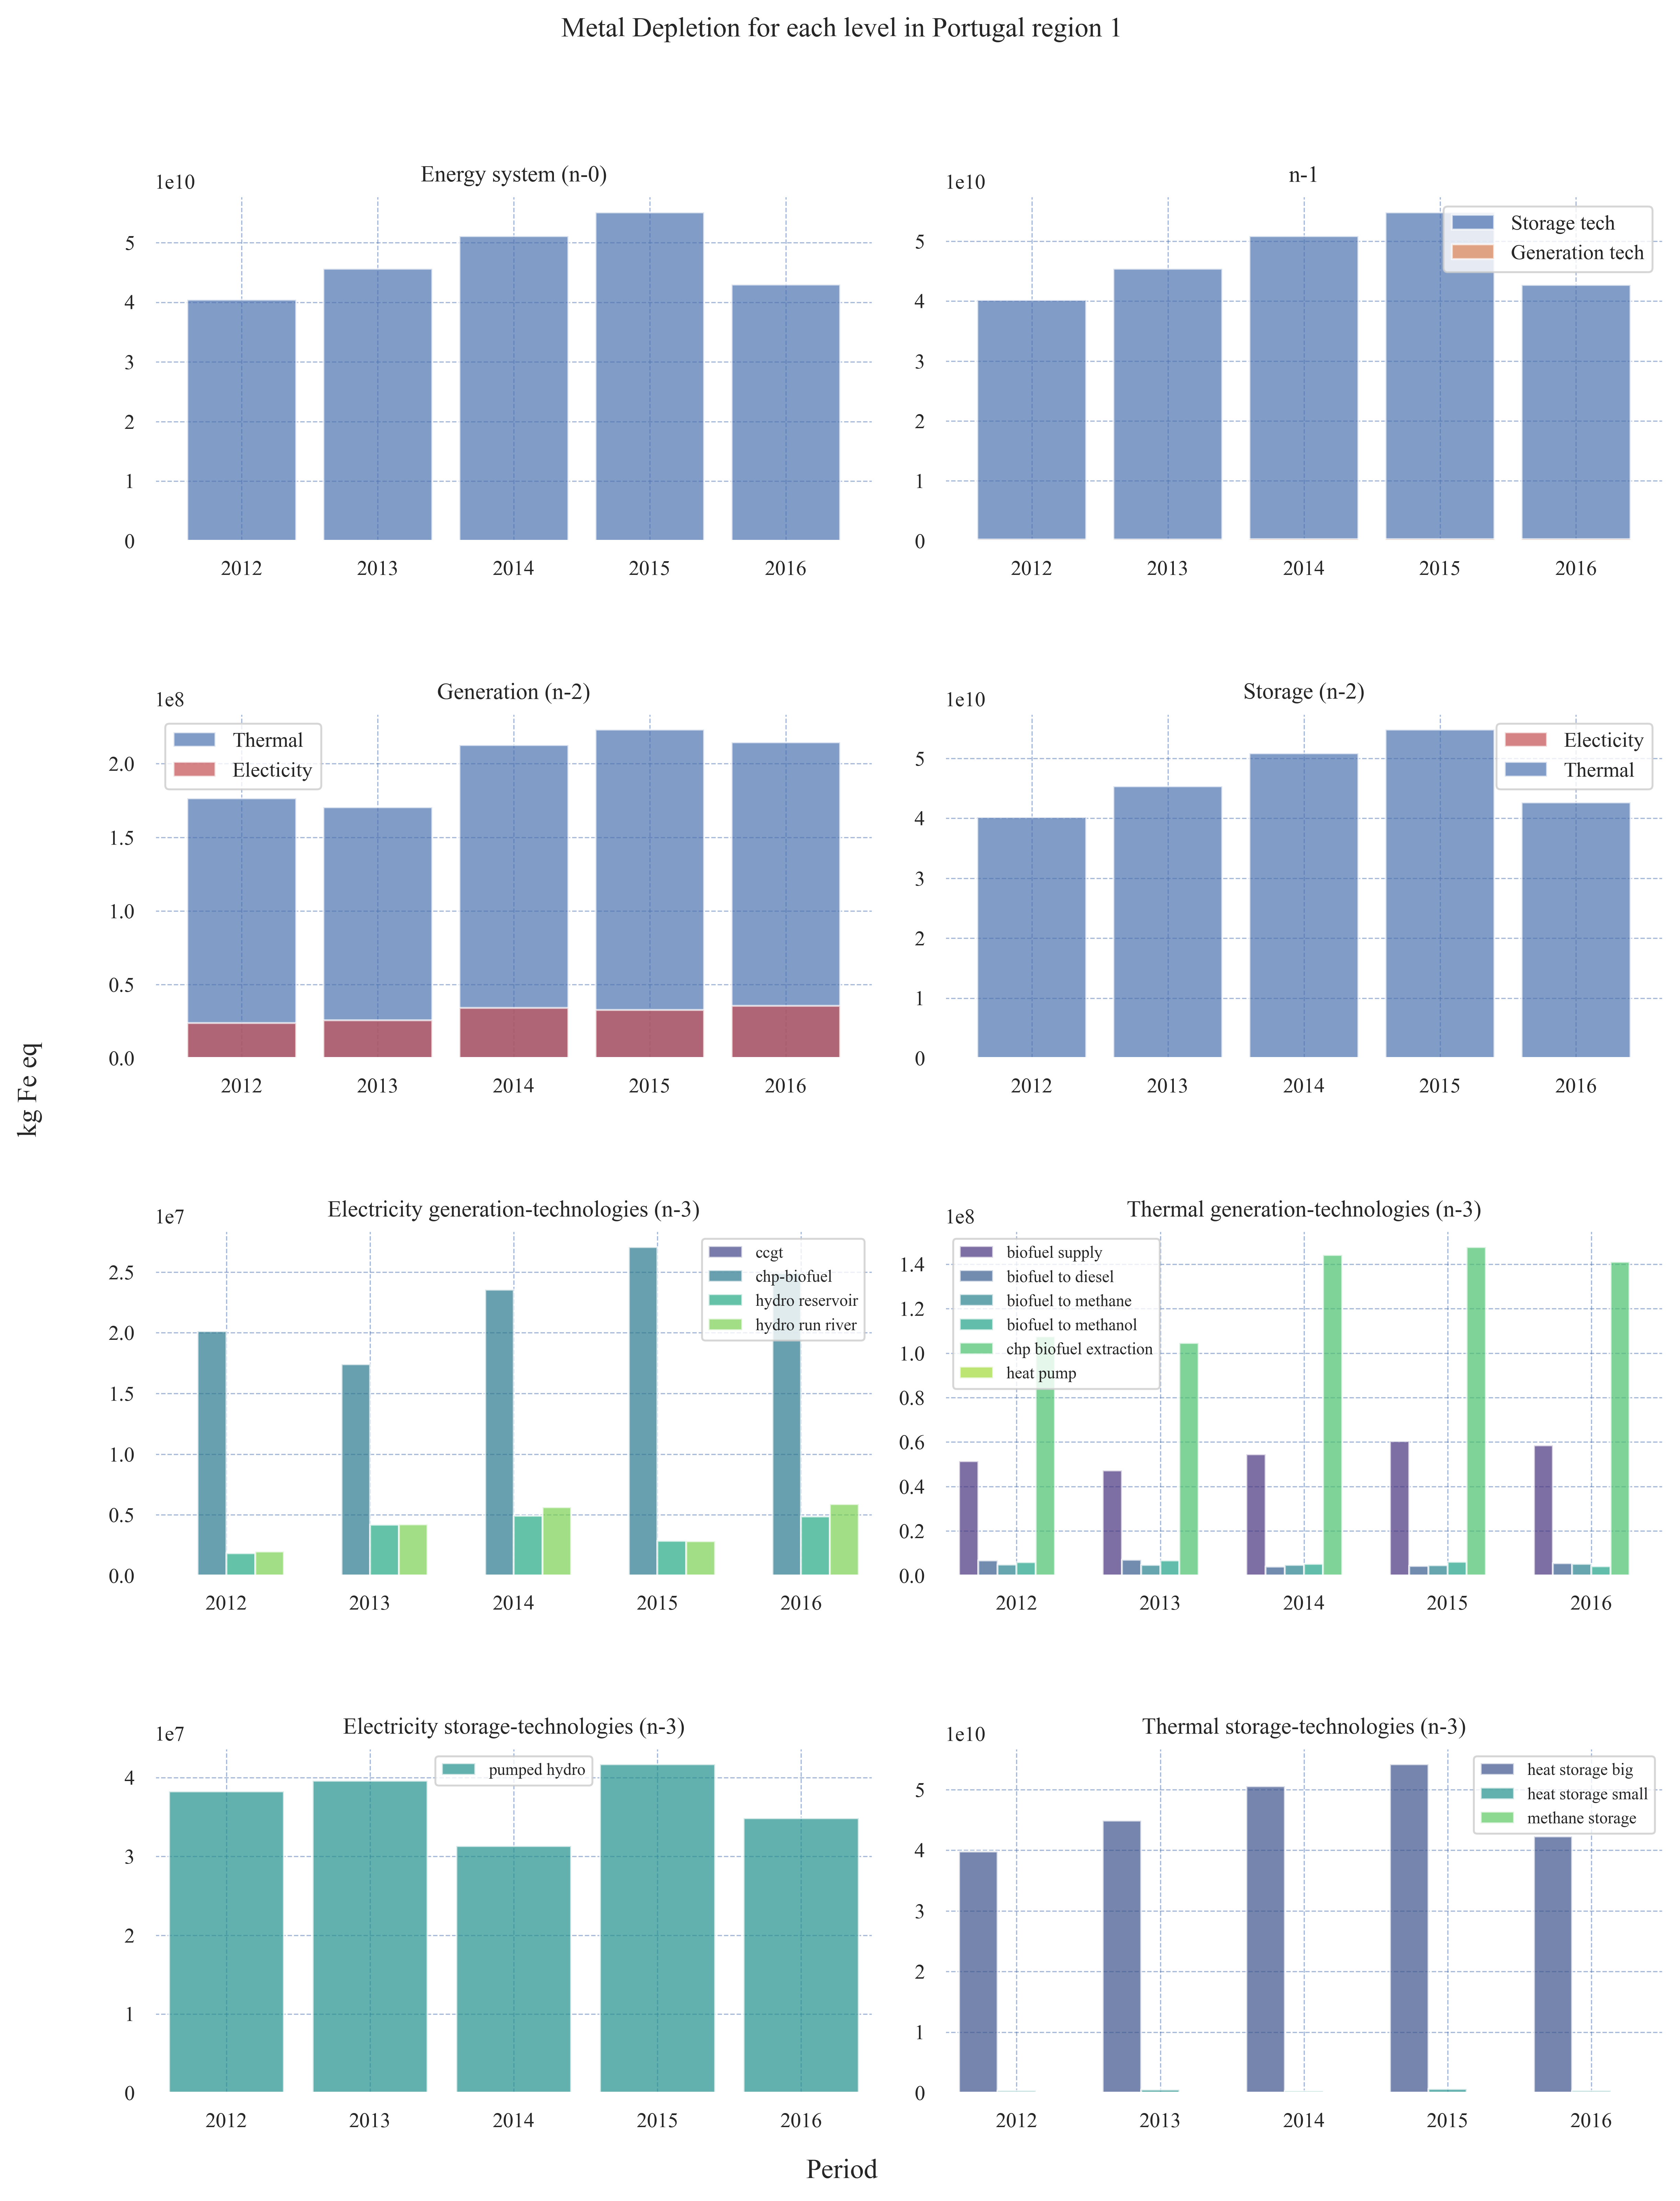

In [34]:
#Water use
#subplot for Global Warming Potential for each level
fig, axes=plt.subplots(4,2,figsize=(10,13),dpi=500)

sns.set()
sns.set_context("paper")
sns.set_style({'axes.facecolor':'white', 'grid.color': '.8', 'font.family':'Times New Roman'})
fig.suptitle('Metal Depletion for each level in Portugal region 1')
fig.supxlabel('Period')
fig.supylabel('kg Fe eq')
fig.tight_layout()

#level 0
df_MetalDepletion_0=df_MetalDepletion[df_MetalDepletion['Dendrogram level']==0]
axes[0,0].bar(df_MetalDepletion_0['Period'],df_MetalDepletion_0['Value'], alpha=0.7)
axes[0,0].set_title('Energy system (n-0)')
axes[0,0].grid(color='b', alpha=0.5, linestyle='dashed', linewidth=0.5)
axes[0,0].set_facecolor('white')
#lvl 1, generation vs storage
df_MetalDepletion_1=df_MetalDepletion[df_MetalDepletion['Dendrogram level']==1]
y1=df_MetalDepletion_1[df_MetalDepletion_1['Processor']=='energysystem.generation']
y2=df_MetalDepletion_1[df_MetalDepletion_1['Processor']=='energysystem.storage']
axes[0,1].bar(y2.Period,y2.Value,label='Storage tech',alpha=0.7)
axes[0,1].bar(y1.Period,y1.Value,label='Generation tech',alpha=0.7)
axes[0,1].set_title('n-1')
axes[0,1].legend()
axes[0,1].grid(color='b', alpha=0.5, linestyle='dashed', linewidth=0.5)
axes[0,1].set_facecolor('white')
#lvl2 thermal vs electrical
df_MetalDepletion_2=df_MetalDepletion[df_MetalDepletion['Dendrogram level']==2]
y3=df_MetalDepletion_2[df_MetalDepletion_2['Processor']=='energysystem.generation.thermal_generation']
y4=df_MetalDepletion_2[df_MetalDepletion_2['Processor']=='energysystem.generation.electricity_generation']
axes[1,0].bar(y3.Period,y3.Value,label='Thermal', color='b',alpha=0.7)
axes[1,0].bar(y4.Period,y4.Value,label='Electicity', color='r',alpha=0.7)
axes[1,0].set_title('Generation (n-2)' )
axes[1,0].legend()
axes[1,0].grid(color='b', alpha=0.5, linestyle='dashed', linewidth=0.5)
axes[1,0].set_facecolor('white')
#storage, divided in thermal and electricity
df_MetalDepletion_2=df_MetalDepletion[df_MetalDepletion['Dendrogram level']==2]
#################################################################
y5=df_MetalDepletion_2[df_MetalDepletion_2['Processor']=='energysystem.storage.thermal_storage']
y6=df_MetalDepletion_2[df_MetalDepletion_2['Processor']=='energysystem.storage.electricity_storage']
axes[1,1].bar(y6.Period,y6.Value,label='Electicity',color='r',alpha=0.7)
axes[1,1].bar(y5.Period,y5.Value,label='Thermal', color='b',alpha=0.7)

axes[1,1].set_title('Storage (n-2)')
axes[1,1].legend()
axes[1,1].grid(color='b', alpha=0.5, linestyle='dashed', linewidth=0.5)
axes[1,1].set_facecolor('white')


# PLOT FOR ELECTRICITY GENERATION TECHNOLOGIES
df_MetalDepletion_3=df_MetalDepletion[df_MetalDepletion['Dendrogram level']==3]
df_MetalDepletion_3=df_MetalDepletion_3.loc[~df_MetalDepletion_3['Processor'].str.contains('storage')]
#first work with the electricity generation
df_MetalDepletion_3=df_MetalDepletion_3.loc[~df_MetalDepletion_3['Processor'].str.contains('thermal')]
# Per evitar problemes amb la llegenda, retoquem una mica els valors dels processos. La manera es una mica cutre (...)
df_MetalDepletion_3['Processor'].mask(df_MetalDepletion_3['Processor']=='energysystem.generation.electricity_generation.ccgt_electricity','ccgt',inplace=True)
df_MetalDepletion_3['Processor'].mask(df_MetalDepletion_3['Processor']=='energysystem.generation.electricity_generation.hydro_reservoir_electricity','hydro reservoir',inplace=True)
df_MetalDepletion_3['Processor'].mask(df_MetalDepletion_3['Processor']=='energysystem.generation.electricity_generation.chp_biofuel_extraction_electricity','chp-biofuel',inplace=True)
df_MetalDepletion_3['Processor'].mask(df_MetalDepletion_3['Processor']=='energysystem.generation.electricity_generation.hydro_run_of_river_electricity','hydro run river',inplace=True)
#use seaborn 
sns.barplot(ax=axes[2,0],x='Period',y='Value',data=df_MetalDepletion_3,palette='viridis',saturation=1, hue='Processor',alpha=0.7).set(xlabel='',ylabel='')
axes[2,0].legend(fontsize=7)
axes[2,0].set_title('Electricity generation-technologies (n-3)')
axes[2,0].grid(color='b', alpha=0.5, linestyle='dashed', linewidth=0.5)
axes[2,0].set_facecolor('white')
#PLOT FOR Thermal generation technologies
df_MetalDepletion_4=df_MetalDepletion[df_MetalDepletion['Dendrogram level']==3]
df_MetalDepletion_4=df_MetalDepletion_4.loc[~df_MetalDepletion['Processor'].str.contains('storage')]
#first work with the electricity generation
df_MetalDepletion_4=df_MetalDepletion_4.loc[~df_MetalDepletion_4['Processor'].str.contains('electricity')]
# Per evitar problemes amb la llegenda, retoquem una mica els valors dels processos. La manera es una mica cutre (...)
df_MetalDepletion_4['Processor'].mask(df_MetalDepletion_4['Processor']=='energysystem.generation.thermal_generation.biofuel_supply_biofuel','biofuel supply',inplace=True)
df_MetalDepletion_4['Processor'].mask(df_MetalDepletion_4['Processor']=='energysystem.generation.thermal_generation.biofuel_to_diesel_diesel','biofuel to diesel',inplace=True)
df_MetalDepletion_4['Processor'].mask(df_MetalDepletion_4['Processor']=='energysystem.generation.thermal_generation.biofuel_to_methane_methane','biofuel to methane',inplace=True)
df_MetalDepletion_4['Processor'].mask(df_MetalDepletion_4['Processor']=='energysystem.generation.thermal_generation.biofuel_to_methanol_methanol','biofuel to methanol', inplace=True)
df_MetalDepletion_4['Processor'].mask(df_MetalDepletion_4['Processor']=='energysystem.generation.thermal_generation.chp_biofuel_extraction_heat','chp biofuel extraction',inplace=True)
df_MetalDepletion_4['Processor'].mask(df_MetalDepletion_4['Processor']=='energysystem.generation.thermal_generation.hp_heat','heat pump',inplace=True)
sns.barplot(ax=axes[2,1],x='Period',y='Value',data=df_MetalDepletion_4,palette='viridis',saturation=1, hue='Processor',alpha=0.7).set(xlabel='',ylabel='')
axes[2,1].legend(fontsize=7)
axes[2,1].set_title('Thermal generation-technologies (n-3)')
axes[2,1].grid(color='b', alpha=0.5, linestyle='dashed', linewidth=0.5)
axes[2,1].set_facecolor('white')

df_MetalDepletion_5=df_MetalDepletion[df_MetalDepletion['Dendrogram level']==3]
df_MetalDepletion_5=df_MetalDepletion_5.loc[~df_MetalDepletion_5['Processor'].str.contains('generation')]
df_MetalDepletion_5=df_MetalDepletion_5.loc[~df_MetalDepletion_5['Processor'].str.contains('thermal')]
df_MetalDepletion_5['Processor'].mask(df_MetalDepletion_5['Processor']=='energysystem.storage.electricity_storage.pumped_hydro_electricity','pumped hydro',inplace=True)
sns.barplot(ax=axes[3,0],x='Period',y='Value',data=df_MetalDepletion_5,palette='viridis',saturation=1, hue='Processor',alpha=0.7).set(xlabel='',ylabel='')
axes[3,0].legend(fontsize=7)
axes[3,0].set_title('Electricity storage-technologies (n-3)')
axes[3,0].grid(color='b', alpha=0.5, linestyle='dashed', linewidth=0.5)
axes[3,0].set_facecolor('white')

#Thermal storage technologies
df_MetalDepletion_6=df_MetalDepletion[df_MetalDepletion['Dendrogram level']==3]
df_MetalDepletion_6=df_MetalDepletion_6.loc[~df_MetalDepletion_6['Processor'].str.contains('generation')]
df_MetalDepletion_6=df_MetalDepletion_6.loc[~df_MetalDepletion_6['Processor'].str.contains('electricity')]
df_MetalDepletion_6['Processor'].mask(df_MetalDepletion_6['Processor']=='energysystem.storage.thermal_storage.heat_storage_big_heat','heat storage big',inplace=True)
df_MetalDepletion_6['Processor'].mask(df_MetalDepletion_6['Processor']=='energysystem.storage.thermal_storage.heat_storage_small_heat','heat storage small',inplace=True)
df_MetalDepletion_6['Processor'].mask(df_MetalDepletion_6['Processor']=='energysystem.storage.thermal_storage.methane_storage_methane','methane storage',inplace=True)
sns.barplot(ax=axes[3,1],x='Period',y='Value',data=df_MetalDepletion_6,palette='viridis',saturation=1, hue='Processor',alpha=0.7).set(xlabel='',ylabel='')
axes[3,1].legend(fontsize=7)
axes[3,1].set_title('Thermal storage-technologies (n-3)')
axes[3,1].grid(color='b', alpha=0.5, linestyle='dashed', linewidth=0.5)
axes[3,1].set_facecolor('white')




plt.subplots_adjust(left=0.1, 
                    top=0.9, 
                    wspace=0.1, 
                    hspace=0.5)

plt.savefig(r'C:\Users\altz7\Downloads\levels_MetalDepletion_.png', dpi=500)

# Work on the ratios


In [88]:

#sort the columns by the indicator
df_GWP100_0=df_GWP100[df_GWP100['Dendrogram level']==0]

def ratios (data_frame):
    """
    Valor de cada any dividid entre el següent
    data_frame must be selected by the level
    Matlab like method :)
    """
    dataframe_0=data_frame[data_frame['Dendrogram level']==0]
    valors_GWP=[]
    for values in dataframe_0.Value:
        valors_GWP.append(values)
    rat=[]
    counter=0
    len_=len(valors_GWP)
    len_max=len_-1
    for result in valors_GWP:
        if counter <len_max:
            temp=counter+1
            a=valors_GWP[counter]
            b=valors_GWP[temp] #starts by first index 
            result=a/b
            rat.append(result)
            counter=counter+1
        else:
            a=valors_GWP[-1]
            b=valors_GWP[0]
            result=a/b
            rat.append(result)
    indicator=data_frame['Indicator'].tolist()
    name=indicator[0]
    print('The ratios for the {} indicator are'.format(name))
    print('---------')
    print('{}'.format(rat))
    #return rat

GWP_rat=ratios(df_GWP100)
#GWP_rat=ratios(df_GWP100_0)
GWP_rat

The ratios for the GWP100 indicator are
---------
[1.3420330853882956, 0.939863518233634, 0.9523810579916444, 0.9018784327063324, 0.9230245120867777]


Compare the ratios with a similar distribution impact. For instance (chek the plots above), metal depletion, and land use.
Example of how to use the ratios function

In [90]:
#Water use 
df_WaterUse_0=df_WaterUse[df_WaterUse['Dendrogram level']==0]
#call the function
WaterUseRat=ratios(df_WaterUse_0)

#FreshWaterEcotox
df_FreshWaterEctox_0=df_FreshWaterEcotox[df_FreshWaterEcotox['Dendrogram level']==0]
FresWatEcotox_rat=ratios(df_FreshWaterEctox_0)
#metal depletion
df_MetalDepletion_0=df_MetalDepletion[df_MetalDepletion['Dendrogram level']==0]
MetalRatio=ratios(df_MetalDepletion_0)


The ratios for the WaterUse indicator are
---------
[1.3283323860198601, 0.7784071861366123, 1.035522375117796, 0.8897833997705931, 1.0496454212315045]
The ratios for the FreshWaterEcotox indicator are
---------
[1.359259184639567, 0.9387798493919356, 0.9475305470888383, 0.8924590028960762, 0.9267283945896819]
The ratios for the MetalDepletion indicator are
---------
[1.362834144700228, 0.9408475222403533, 0.9420468320619964, 0.8922438831524158, 0.9278583401642724]


'GWP100'